# Breast Cancer Wisconsin - Binary Classification

## Libraries to Import

In [1]:
# Numerical operations
import numpy as np

# Data manipulation and CSV file I/O
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Missing data visualization
import missingno as msno

# Data preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Machine learning model and feature selection
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Data splitting for training and testing
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics for evaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Dimensionality reduction
from sklearn.decomposition import PCA

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
data = pd.read_csv('wdbc.data.csv')

In [3]:
data.head()

ID number Diagnosis  Radius mean  Texture mean  Perimeter mean  Area mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness mean  Compactness mean  Concavity mean  Concave points mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Worst radius  Worst texture  Worst perimeter  Worst area  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   Worst smoothness  Worst compactness  Worst concavity  Worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   Worst symmetry  Worst fractal dimension  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## EDA

### Data Type

In [4]:
# Check Data Types on Each Columns
column_types = data.dtypes
print(column_types)

ID number                    int64
Diagnosis                   object
Radius mean                float64
Texture mean               float64
Perimeter mean             float64
Area mean                  float64
Smoothness mean            float64
Compactness mean           float64
Concavity mean             float64
Concave points mean        float64
Symmetry mean              float64
Fractal dimension mean     float64
Radius SE                  float64
Texture SE                 float64
Perimeter SE               float64
Area SE                    float64
Smoothness SE              float64
Compactness SE             float64
Concavity SE               float64
Concave points SE          float64
Symmetry SE                float64
Fractal dimension SE       float64
Worst radius               float64
Worst texture              float64
Worst perimeter            float64
Worst area                 float64
Worst smoothness           float64
Worst compactness          float64
Worst concavity     

### Drop "Id" Column

In [5]:
data = data.drop(['ID number'], axis = 1)

### Missing Values

In [6]:
# Check for blank values in each column
missing_values = data.isna().sum()

# Filter columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Print columns with missing values and the number of blank records
print("Columns with missing values and the number of blank records:")
print(columns_with_missing_values)

Columns with missing values and the number of blank records:
Series([], dtype: int64)


<Axes: >

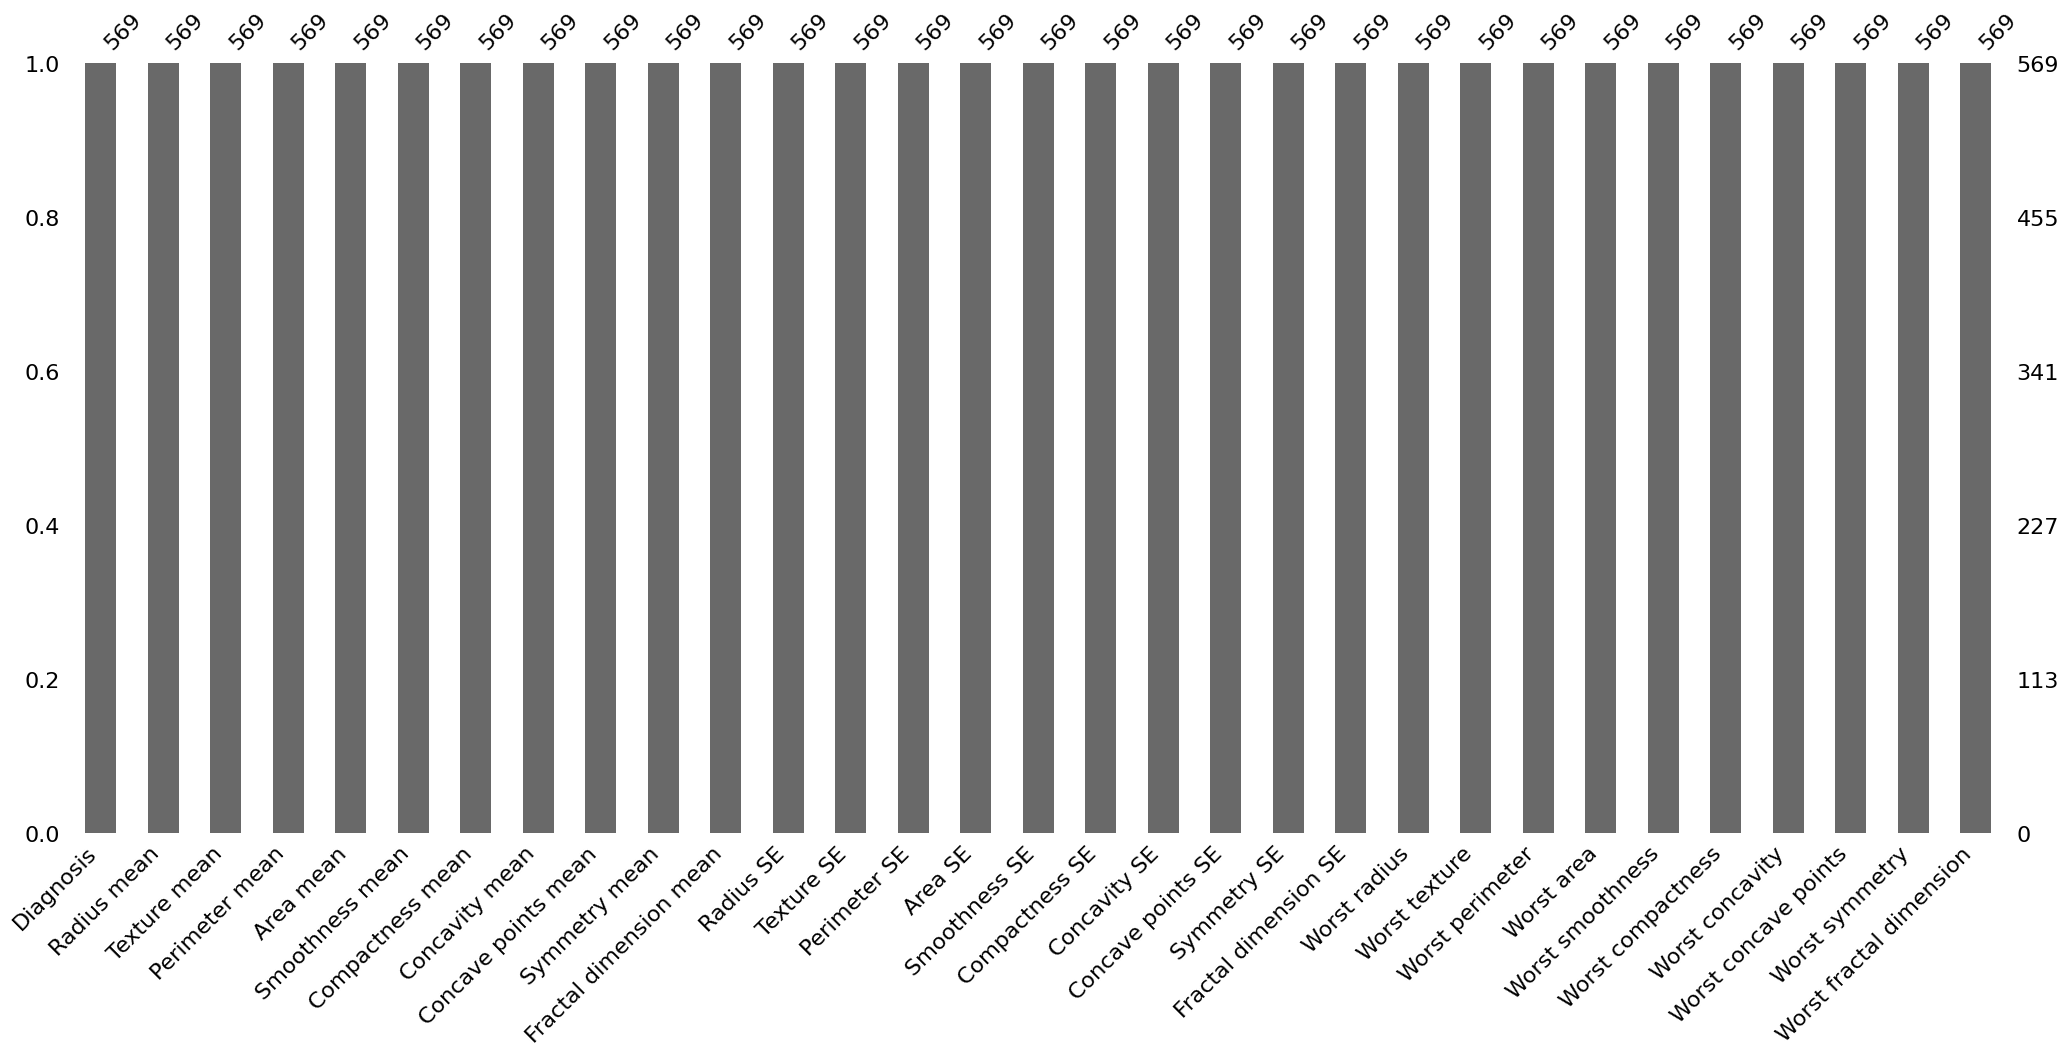

In [7]:
# Visualizing null values
msno.bar(data)

### Unique Values

In [8]:
# Select non-numeric columns
non_numeric_columns = data.select_dtypes(exclude='number').columns

# Display unique values for each non-numeric column
for column in non_numeric_columns:
    unique_values = data[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'Diagnosis': ['M' 'B']


### Convert "Diagnosis" values into numeric values

In [9]:
# Replace 'M' with 1 and 'B' with 0 in the column 'Diagnosis (M = malignant; B = benign)'
data['Diagnosis'] = data['Diagnosis'].replace({'M': 1, 'B': 0})

# Check if the replacement was done correctly
print(data['Diagnosis'].unique())

[1 0]


### Count, Min, Max, Std, Mean

In [10]:
# Get Summary Statistics for Columns
summary_stats = data.describe()

# Print Statistics
print("Summary Statistics for Columns:")
print(summary_stats)

Summary Statistics for Columns:
        Diagnosis  Radius mean  Texture mean  Perimeter mean    Area mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       Smoothness mean  Compactness mean  Concavity mean  Concave points mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064         

### Target Feature Distribution

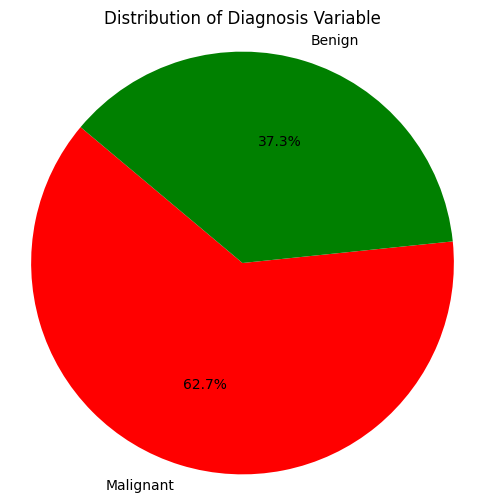

In [11]:
# Distribution of diagnosis variable
labels = ['Malignant', 'Benign']
values = data['Diagnosis'].value_counts()

colors = ['red', 'green']

# Create Pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnosis Variable')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Relation Between Features

#### Mean Values and Diagnosis

##### Correlation Matrix

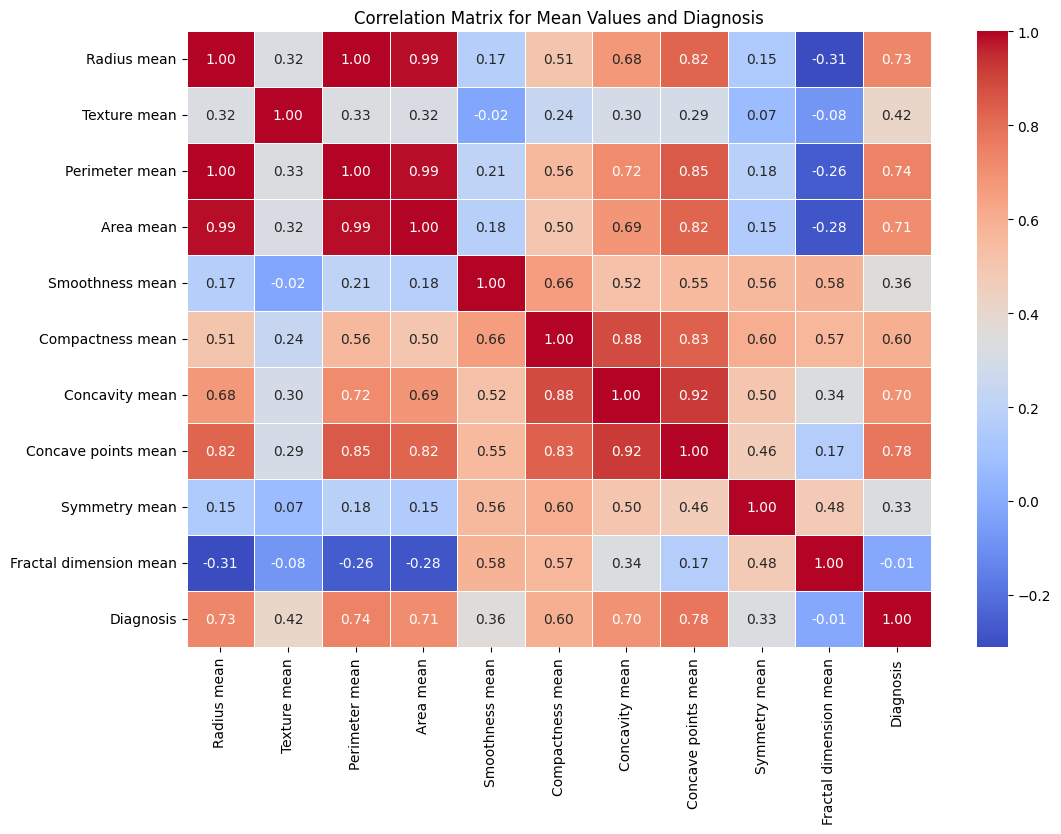

In [12]:
# Filter columns with "mean" in their names
mean_columns = [col for col in data.columns if 'mean' in col]

# Add 'Diagnosis' column to the list of columns
mean_columns.append('Diagnosis')

# Calculate the correlation matrix
correlation_matrix = data[mean_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Mean Values and Diagnosis')
plt.show()

##### High Correlated Features

In [13]:
mincorr = 0.7

# Filter pairs of variables with correlation greater than "mincorr"
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 < col2 and (col1 != 'Diagnosis' and col2 != 'Diagnosis') and abs(correlation_matrix.loc[col1, col2]) > mincorr]

# Create an empty list to store the highly correlated variable pairs and their correlations
corr_pairs_data = []

# Populate the list with the data
for pair in high_corr_pairs:
    correlation = correlation_matrix.loc[pair[0], pair[1]]  # Extract correlation value
    corr_pairs_data.append([pair[0], pair[1], correlation])

# Create a DataFrame from the list
df_corr_pairs = pd.DataFrame(corr_pairs_data, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Sort DataFrame by correlation in descending order
df_corr_pairs_sorted = df_corr_pairs.sort_values(by='Correlation', ascending=False)

# Print the sorted DataFrame
print("Highly Correlated Variable Pairs:")
print(df_corr_pairs_sorted)

Highly Correlated Variable Pairs:
             Feature 1            Feature 2  Correlation
0       Perimeter mean          Radius mean     0.997855
1            Area mean          Radius mean     0.987357
2            Area mean       Perimeter mean     0.986507
9  Concave points mean       Concavity mean     0.921391
4     Compactness mean       Concavity mean     0.883121
8  Concave points mean       Perimeter mean     0.850977
5     Compactness mean  Concave points mean     0.831135
3            Area mean  Concave points mean     0.823269
7  Concave points mean          Radius mean     0.822529
6       Concavity mean       Perimeter mean     0.716136


##### Covariance

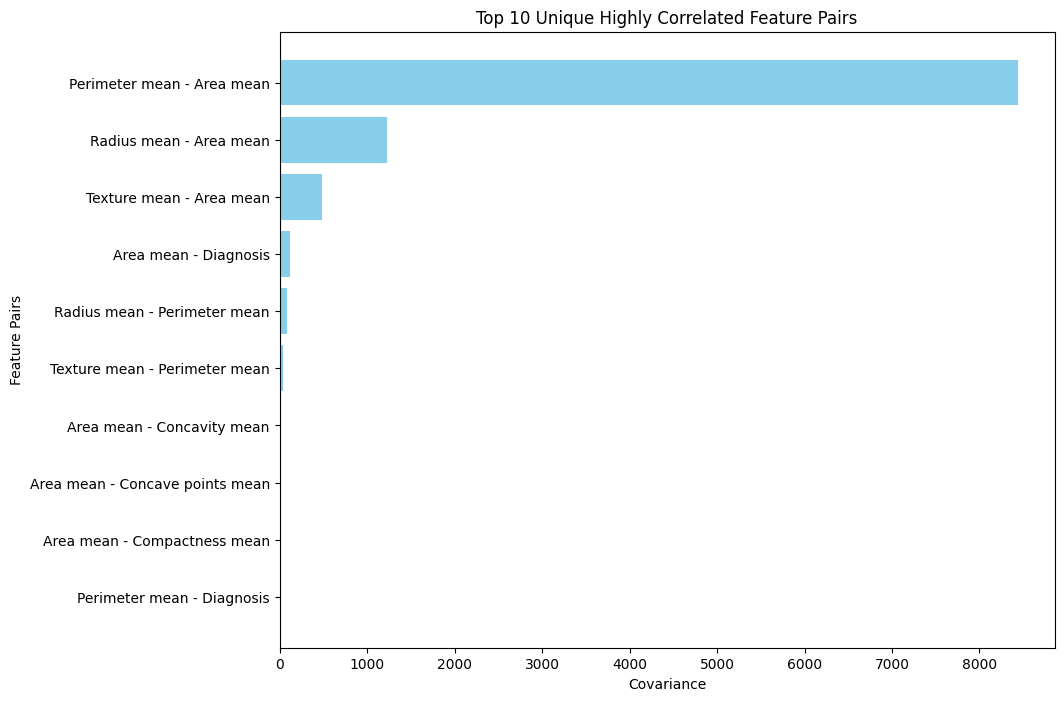

In [14]:
# Calculate the covariance matrix for the mean features
covariance_matrix = np.cov(data[mean_columns], rowvar=False)

# Set the threshold for high covariance
threshold = 0.8  # Adjust the threshold as needed

# Find the highly correlated pairs
high_cov_pairs = set()  # Use a set to avoid repeated pairs
for i in range(covariance_matrix.shape[0]):
    for j in range(i + 1, covariance_matrix.shape[1]):  # Iterate only over the upper half of the covariance matrix
        if abs(covariance_matrix[i, j]) > threshold:
            high_cov_pairs.add((data[mean_columns].columns[i], data[mean_columns].columns[j]))

# Sort the pairs based on their covariance values in descending order
sorted_high_cov_pairs = sorted(high_cov_pairs, key=lambda pair: abs(covariance_matrix[data[mean_columns].columns.get_loc(pair[0]), data[mean_columns].columns.get_loc(pair[1])]), reverse=True)

# Extract the top N highly correlated pairs and their covariance values
top_N = 10  # Number of top pairs to be displayed
top_N_pairs = sorted_high_cov_pairs[:top_N]
top_N_cov_values = [covariance_matrix[data[mean_columns].columns.get_loc(pair[0]), data[mean_columns].columns.get_loc(pair[1])] for pair in top_N_pairs]

# Plot a bar chart of the top N highly correlated pairs
plt.figure(figsize=(10, 8))
plt.barh(range(top_N), top_N_cov_values, color='skyblue')
plt.yticks(range(top_N), [f"{pair[0]} - {pair[1]}" for pair in top_N_pairs])
plt.xlabel('Covariance')
plt.ylabel('Feature Pairs')
plt.title('Top 10 Unique Highly Correlated Feature Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest covariance at the top
plt.show()

##### JointPlots

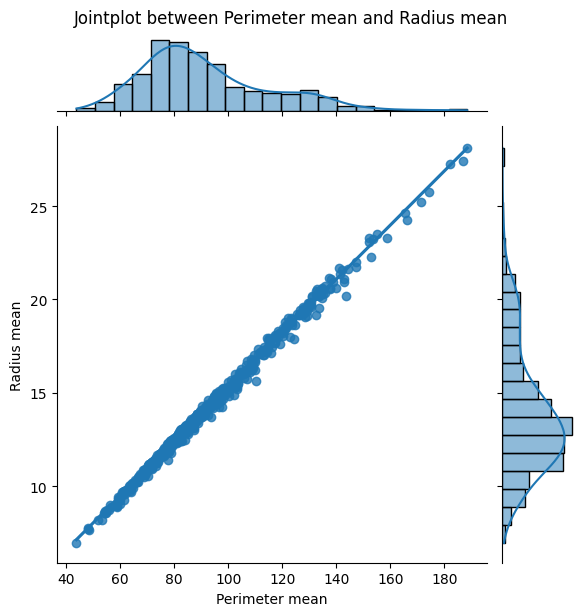

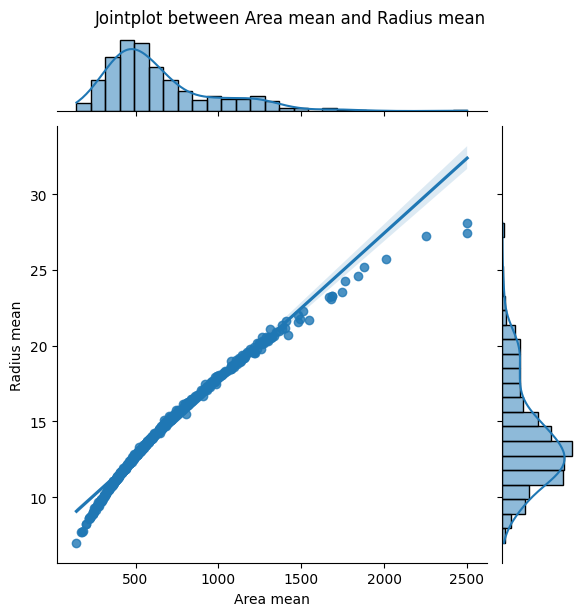

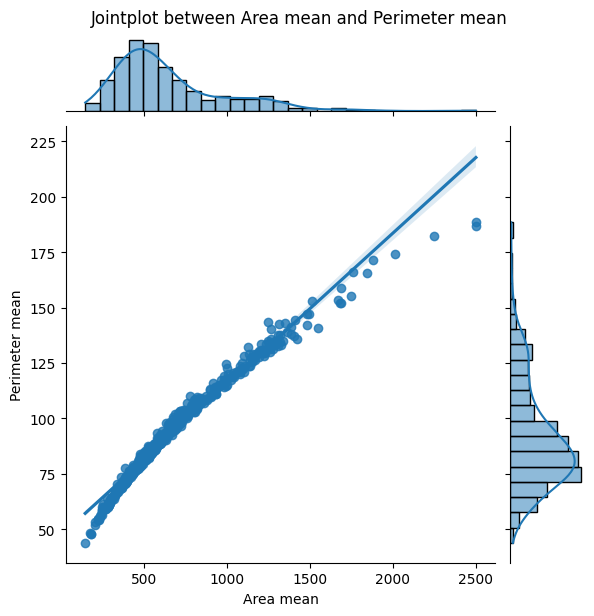

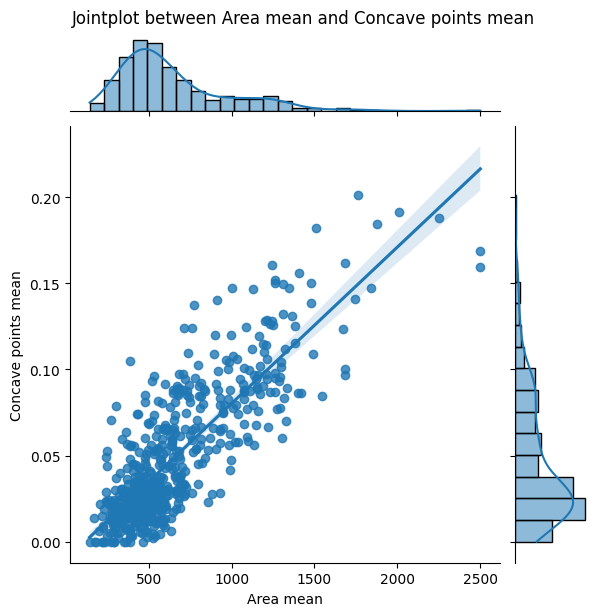

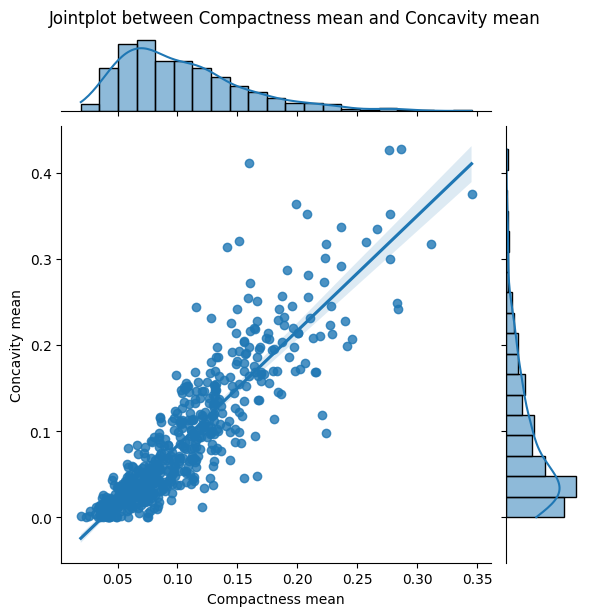

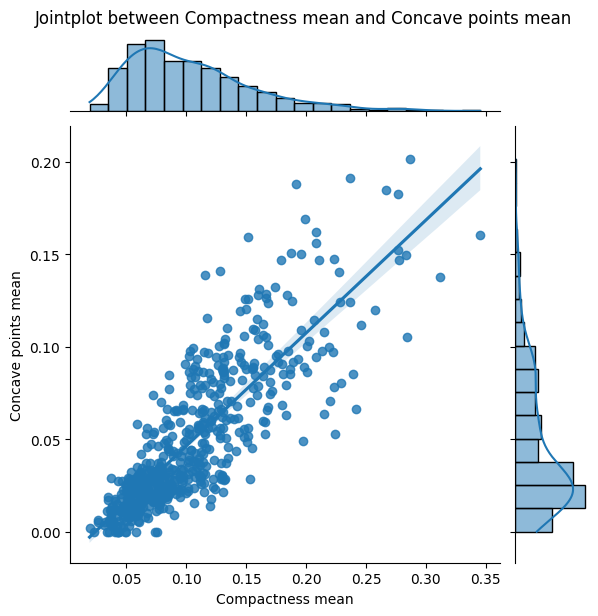

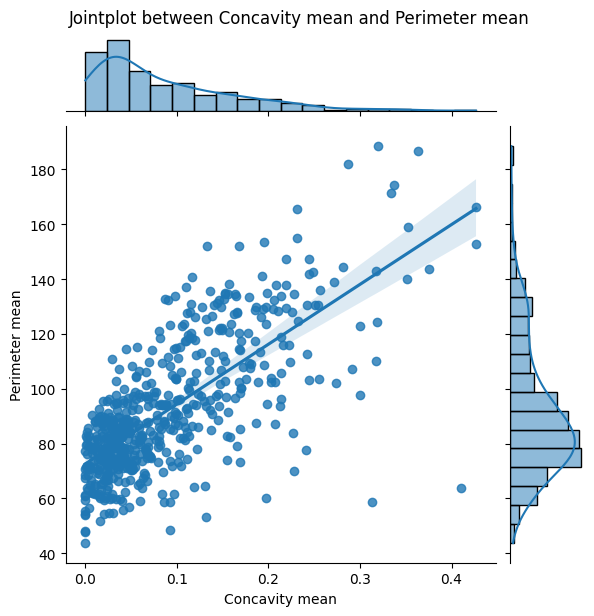

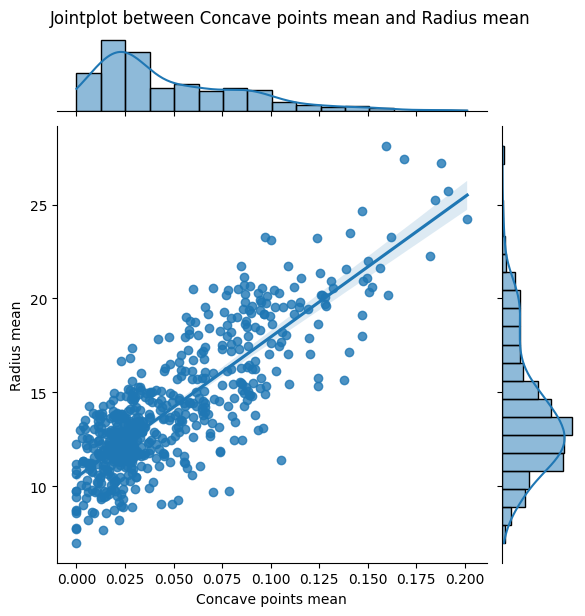

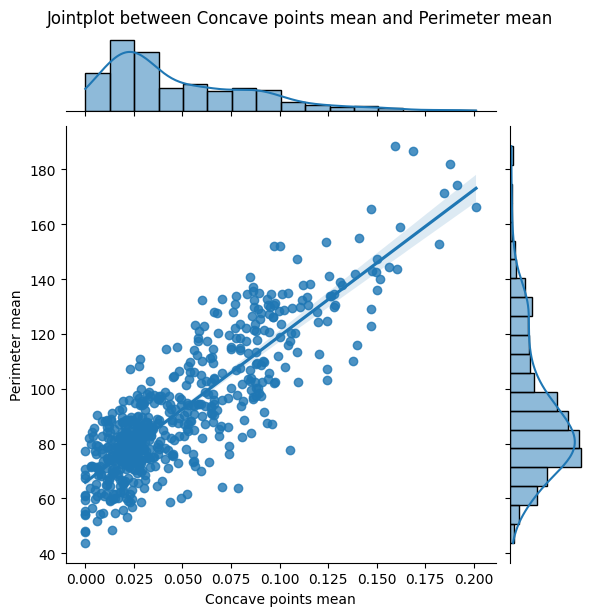

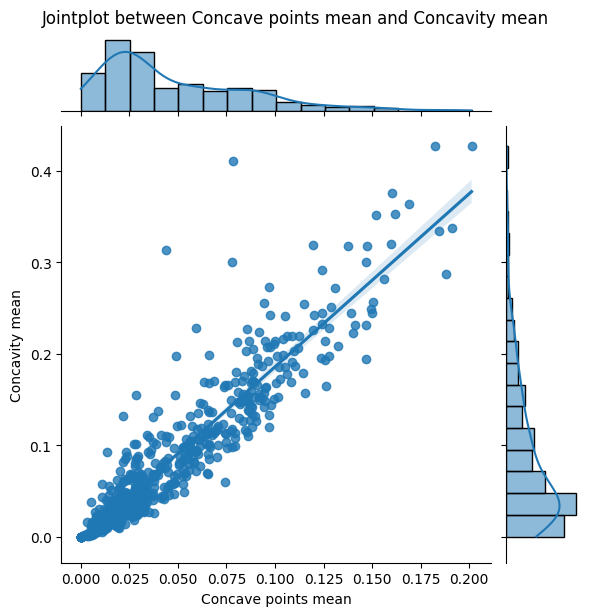

In [15]:
# Plot jointplot for each pair of variables with high correlation
plotted_pairs = set()  # Keep track of plotted pairs to avoid duplication
for col1, col2 in high_corr_pairs:
    # Check if the pair or its reverse has already been plotted
    if (col1, col2) not in plotted_pairs and (col2, col1) not in plotted_pairs:
        joint = sns.jointplot(x=col1, y=col2, data=data, kind='reg')
        joint.fig.suptitle(f'Jointplot between {col1} and {col2}', y=1.02)
        plt.show()
        # Add the current pair and its reverse to the plotted pairs set
        plotted_pairs.add((col1, col2))
        plotted_pairs.add((col2, col1))

#### Standard Error Values and Diagnosis

##### Correlation Matrix

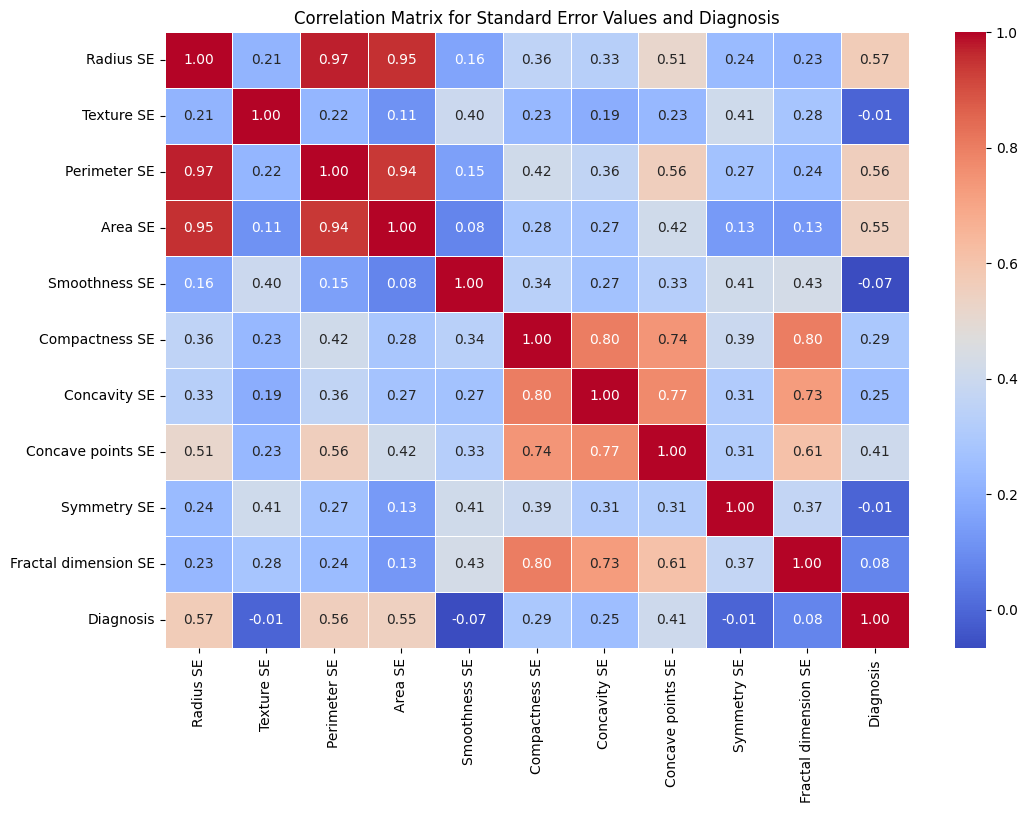

In [16]:
# Filter columns with "SE" in their names
se_columns = [col for col in data.columns if 'SE' in col]

# Add 'Diagnosis' column to the list of columns
se_columns.append('Diagnosis')

# Calculate the correlation matrix
correlation_matrix = data[se_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Standard Error Values and Diagnosis')
plt.show()

##### High Correlated Features

In [17]:
mincorr = 0.7

# Filter pairs of variables with correlation greater than "mincorr"
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 < col2 and (col1 != 'Diagnosis' and col2 != 'Diagnosis') and abs(correlation_matrix.loc[col1, col2]) > mincorr]

# Create an empty list to store the highly correlated variable pairs and their correlations
corr_pairs_data = []

# Populate the list with the data
for pair in high_corr_pairs:
    correlation = correlation_matrix.loc[pair[0], pair[1]]  # Extract correlation value
    corr_pairs_data.append([pair[0], pair[1], correlation])

# Create a DataFrame from the list
df_corr_pairs = pd.DataFrame(corr_pairs_data, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Sort DataFrame by correlation in descending order
df_corr_pairs_sorted = df_corr_pairs.sort_values(by='Correlation', ascending=False)

# Print the sorted DataFrame
print("Highly Correlated Variable Pairs:")
print(df_corr_pairs_sorted)

Highly Correlated Variable Pairs:
           Feature 1             Feature 2  Correlation
0       Perimeter SE             Radius SE     0.972794
1            Area SE             Radius SE     0.951830
2            Area SE          Perimeter SE     0.937655
5     Compactness SE  Fractal dimension SE     0.803269
3     Compactness SE          Concavity SE     0.801268
7  Concave points SE          Concavity SE     0.771804
4     Compactness SE     Concave points SE     0.744083
6       Concavity SE  Fractal dimension SE     0.727372


##### Covariance

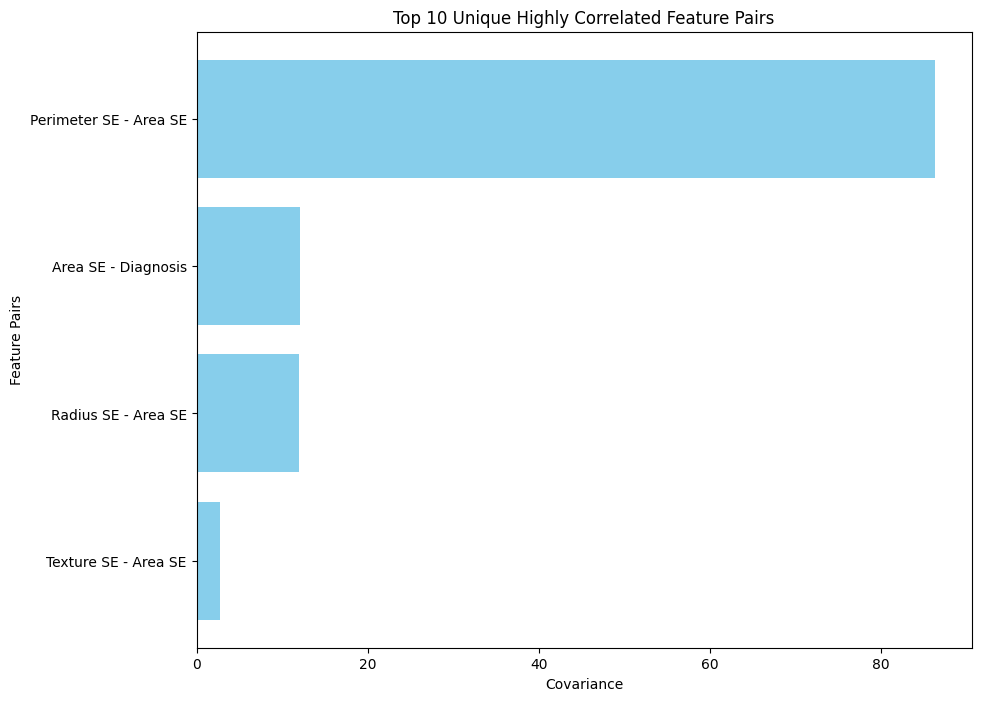

In [18]:
# Calculate the covariance matrix for the SE features
covariance_matrix = np.cov(data[se_columns], rowvar=False)

# Set the threshold for high covariance
threshold = 0.8  # Adjust the threshold as needed

# Find the highly correlated pairs
high_cov_pairs = set()  # Use a set to avoid repeated pairs
for i in range(covariance_matrix.shape[0]):
    for j in range(i + 1, covariance_matrix.shape[1]):  # Iterate only over the upper half of the covariance matrix
        if abs(covariance_matrix[i, j]) > threshold:
            high_cov_pairs.add((data[se_columns].columns[i], data[se_columns].columns[j]))

# Sort the pairs based on their covariance values in descending order
sorted_high_cov_pairs = sorted(high_cov_pairs, key=lambda pair: abs(covariance_matrix[data[se_columns].columns.get_loc(pair[0]), data[se_columns].columns.get_loc(pair[1])]), reverse=True)

# Extract the top N highly correlated pairs and their covariance values
top_N = 10  # Number of top pairs to be displayed
top_N_pairs = sorted_high_cov_pairs[:top_N]
top_N_cov_values = [covariance_matrix[data[se_columns].columns.get_loc(pair[0]), data[se_columns].columns.get_loc(pair[1])] for pair in top_N_pairs]

# Plot a bar chart of the top N highly correlated pairs
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_N_cov_values)), top_N_cov_values, color='skyblue')  # Use len(top_N_cov_values) instead of range(top_N)
plt.yticks(range(len(top_N_cov_values)), [f"{pair[0]} - {pair[1]}" for pair in top_N_pairs])  # Use len(top_N_cov_values) instead of range(top_N)
plt.xlabel('Covariance')
plt.ylabel('Feature Pairs')
plt.title('Top 10 Unique Highly Correlated Feature Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest covariance at the top
plt.show()

##### JointPlots

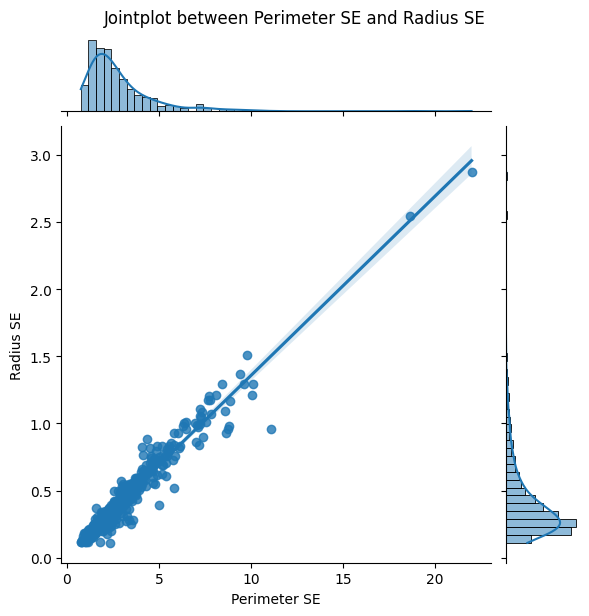

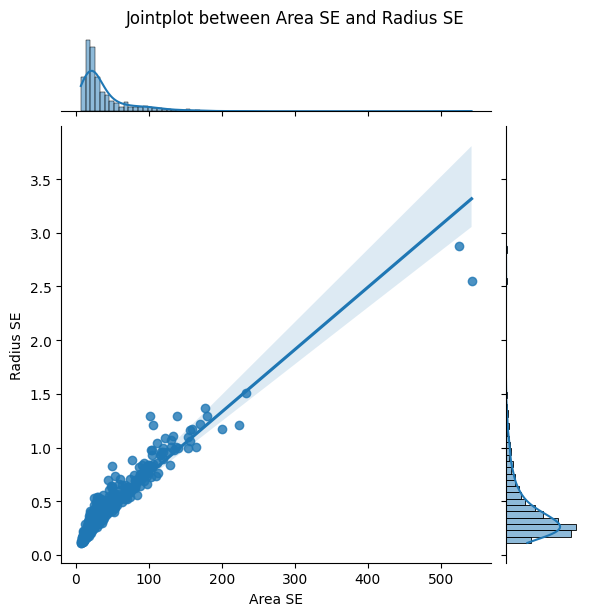

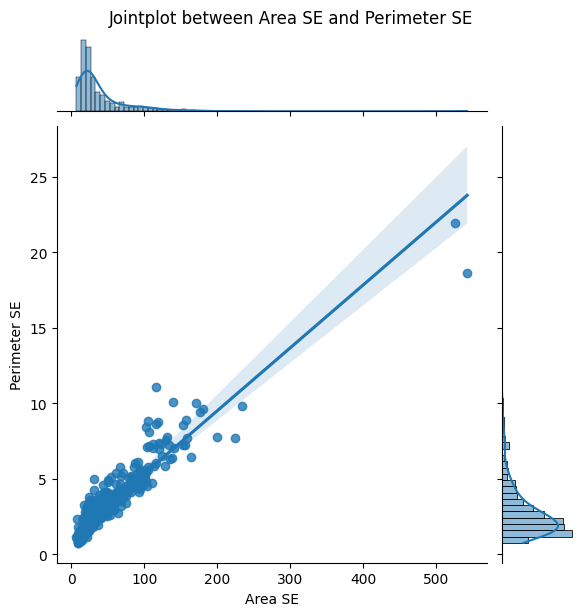

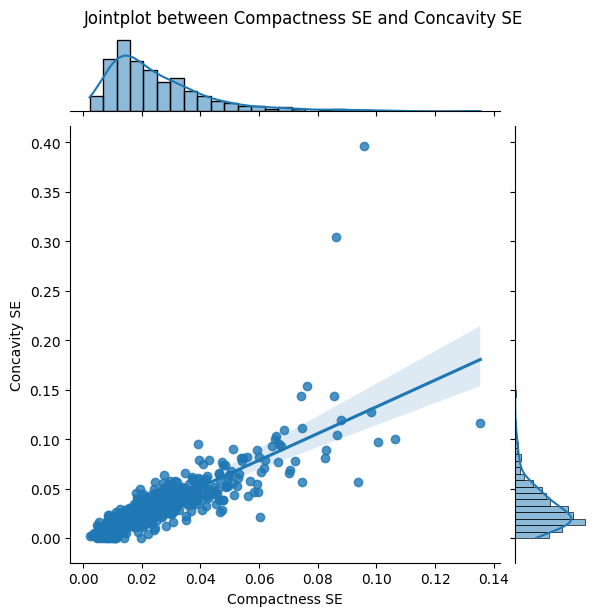

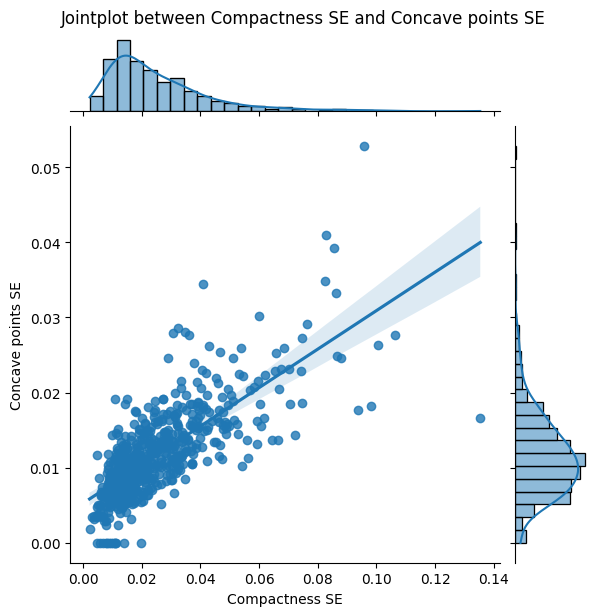

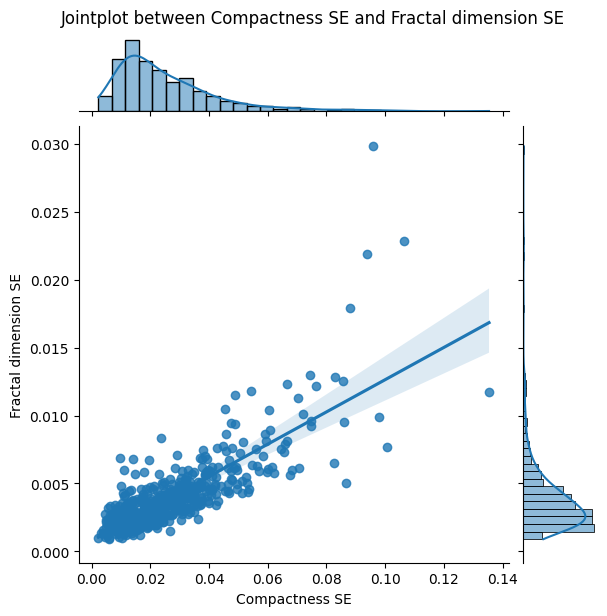

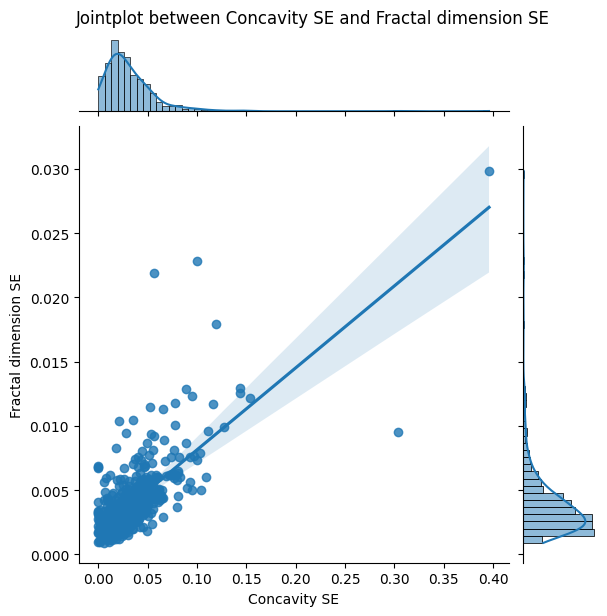

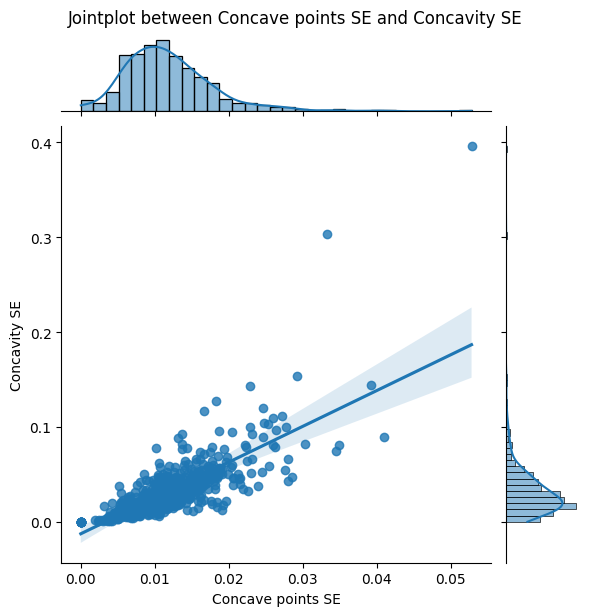

In [19]:
# Plot jointplot for each pair of variables with high correlation
plotted_pairs = set()  # Keep track of plotted pairs to avoid duplication
for col1, col2 in high_corr_pairs:
    # Check if the pair or its reverse has already been plotted
    if (col1, col2) not in plotted_pairs and (col2, col1) not in plotted_pairs:
        joint = sns.jointplot(x=col1, y=col2, data=data, kind='reg')
        joint.fig.suptitle(f'Jointplot between {col1} and {col2}', y=1.02)
        plt.show()
        # Add the current pair and its reverse to the plotted pairs set
        plotted_pairs.add((col1, col2))
        plotted_pairs.add((col2, col1))

#### Worst Values and Diagnosis

##### Correlation Matrix

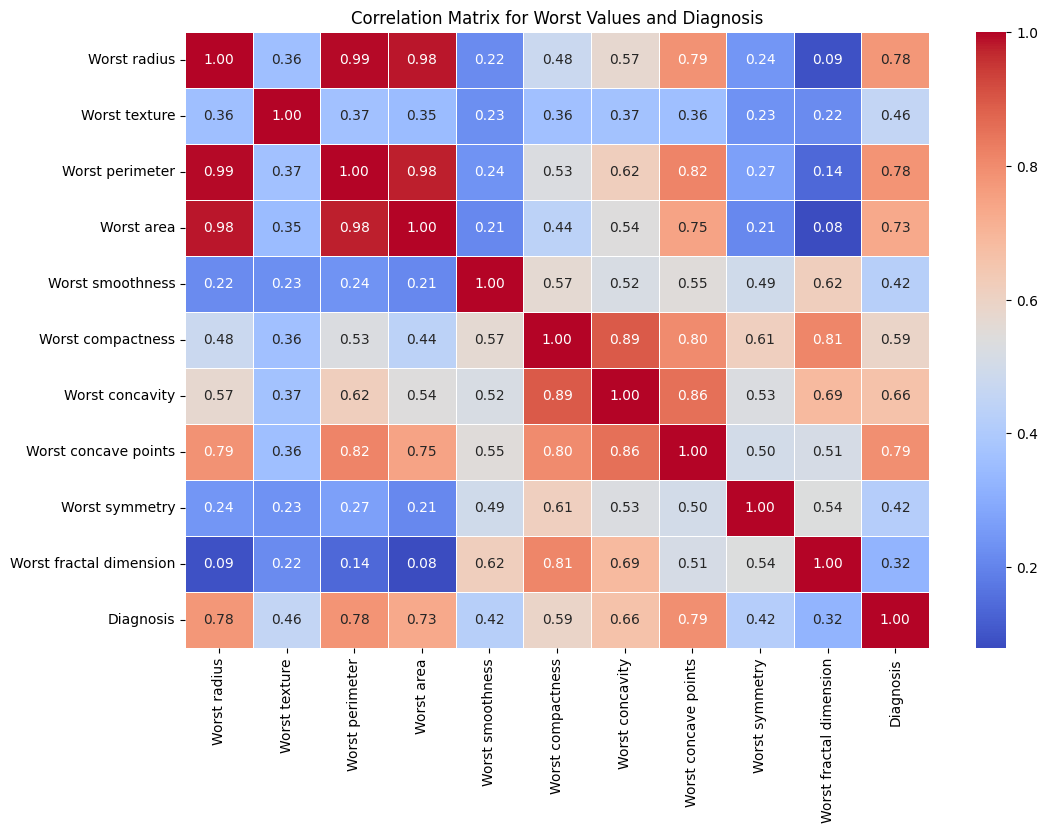

In [20]:
# Filter columns with "worst" in their names
worst_columns = [col for col in data.columns if 'Worst' in col]

# Add 'Diagnosis' column to the list of columns
worst_columns.append('Diagnosis')

# Calculate the correlation matrix
correlation_matrix = data[worst_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Worst Values and Diagnosis')
plt.show()

##### High Correlated Features

In [21]:
mincorr = 0.7

# Filter pairs of variables with correlation greater than "mincorr"
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns if col1 < col2 and (col1 != 'Diagnosis' and col2 != 'Diagnosis') and abs(correlation_matrix.loc[col1, col2]) > mincorr]

# Create an empty list to store the highly correlated variable pairs and their correlations
corr_pairs_data = []

# Populate the list with the data
for pair in high_corr_pairs:
    correlation = correlation_matrix.loc[pair[0], pair[1]]  # Extract correlation value
    corr_pairs_data.append([pair[0], pair[1], correlation])

# Create a DataFrame from the list
df_corr_pairs = pd.DataFrame(corr_pairs_data, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Sort DataFrame by correlation in descending order
df_corr_pairs_sorted = df_corr_pairs.sort_values(by='Correlation', ascending=False)

# Print the sorted DataFrame
print("Highly Correlated Variable Pairs:")
print(df_corr_pairs_sorted)

Highly Correlated Variable Pairs:
              Feature 1                Feature 2  Correlation
0       Worst perimeter             Worst radius     0.993708
1            Worst area             Worst radius     0.984015
2            Worst area          Worst perimeter     0.977578
4     Worst compactness          Worst concavity     0.892261
9  Worst concave points          Worst concavity     0.855434
8  Worst concave points          Worst perimeter     0.816322
6     Worst compactness  Worst fractal dimension     0.810455
5     Worst compactness     Worst concave points     0.801080
7  Worst concave points             Worst radius     0.787424
3            Worst area     Worst concave points     0.747419


##### Covariance

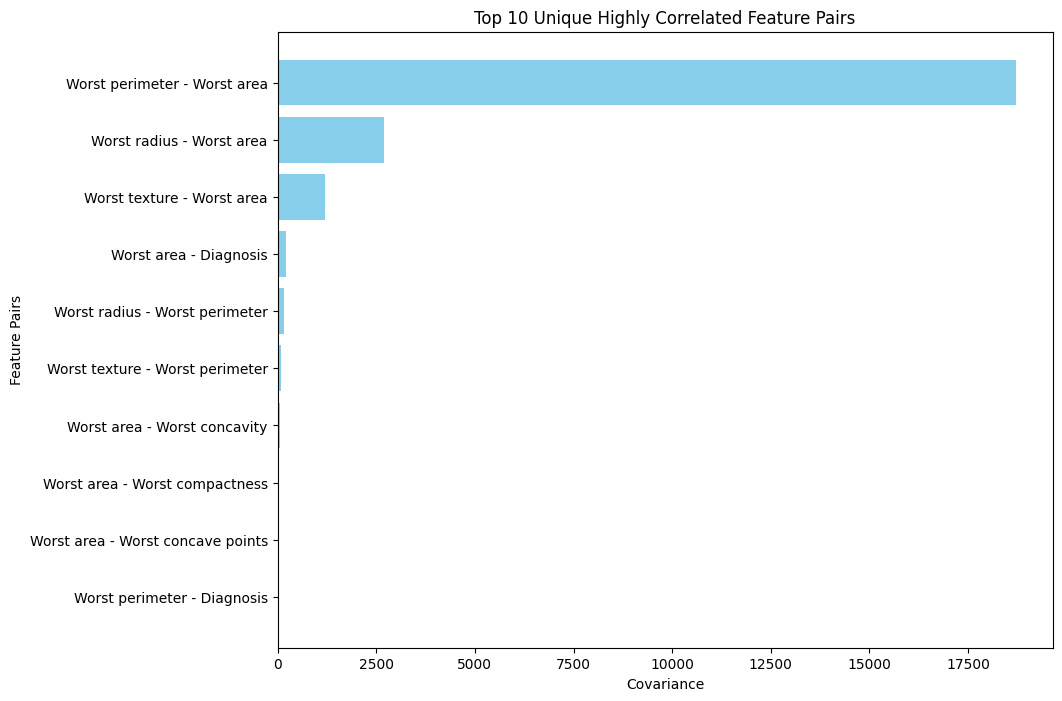

In [22]:
# Calculate the covariance matrix for the worst features
covariance_matrix = np.cov(data[worst_columns], rowvar=False)

# Set the threshold for high covariance
threshold = 0.8  # Adjust the threshold as needed

# Find the highly correlated pairs
high_cov_pairs = set()  # Use a set to avoid repeated pairs
for i in range(covariance_matrix.shape[0]):
    for j in range(i + 1, covariance_matrix.shape[1]):  # Iterate only over the upper half of the covariance matrix
        if abs(covariance_matrix[i, j]) > threshold:
            high_cov_pairs.add((data[worst_columns].columns[i], data[worst_columns].columns[j]))

# Sort the pairs based on their covariance values in descending order
sorted_high_cov_pairs = sorted(high_cov_pairs, key=lambda pair: abs(covariance_matrix[data[worst_columns].columns.get_loc(pair[0]), data[worst_columns].columns.get_loc(pair[1])]), reverse=True)

# Extract the top N highly correlated pairs and their covariance values
top_N = 10  # Number of top pairs to be displayed
top_N_pairs = sorted_high_cov_pairs[:top_N]
top_N_cov_values = [covariance_matrix[data[worst_columns].columns.get_loc(pair[0]), data[worst_columns].columns.get_loc(pair[1])] for pair in top_N_pairs]

# Plot a bar chart of the top N highly correlated pairs
plt.figure(figsize=(10, 8))
plt.barh(range(len(top_N_cov_values)), top_N_cov_values, color='skyblue')  # Use len(top_N_cov_values) instead of range(top_N)
plt.yticks(range(len(top_N_cov_values)), [f"{pair[0]} - {pair[1]}" for pair in top_N_pairs])  # Use len(top_N_cov_values) instead of range(top_N)
plt.xlabel('Covariance')
plt.ylabel('Feature Pairs')
plt.title('Top 10 Unique Highly Correlated Feature Pairs')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest covariance at the top
plt.show()

##### JointPlots

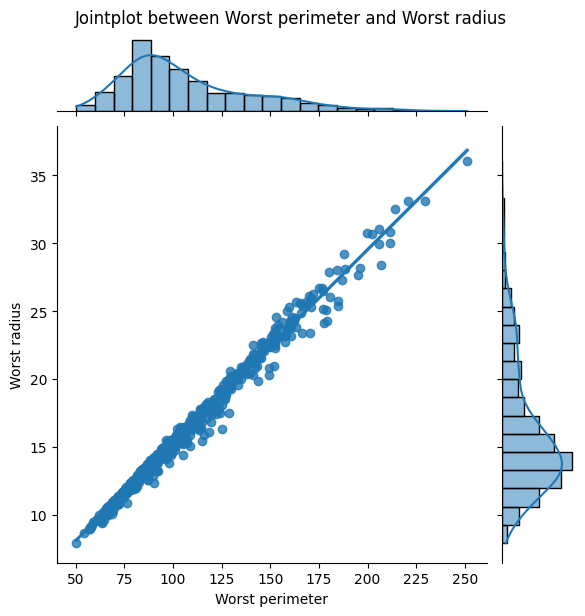

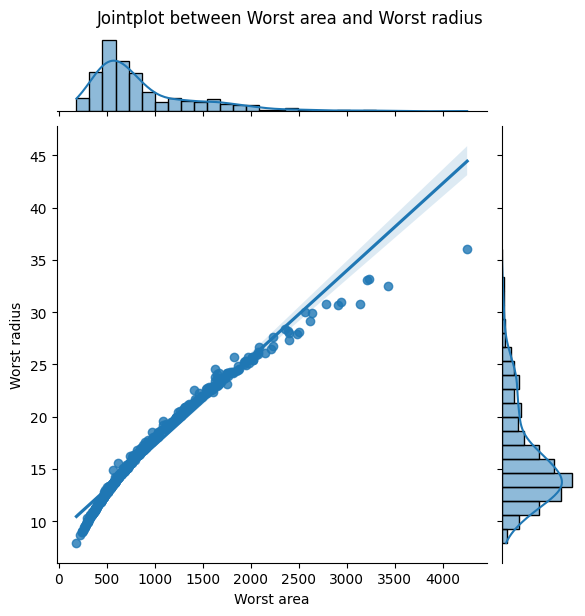

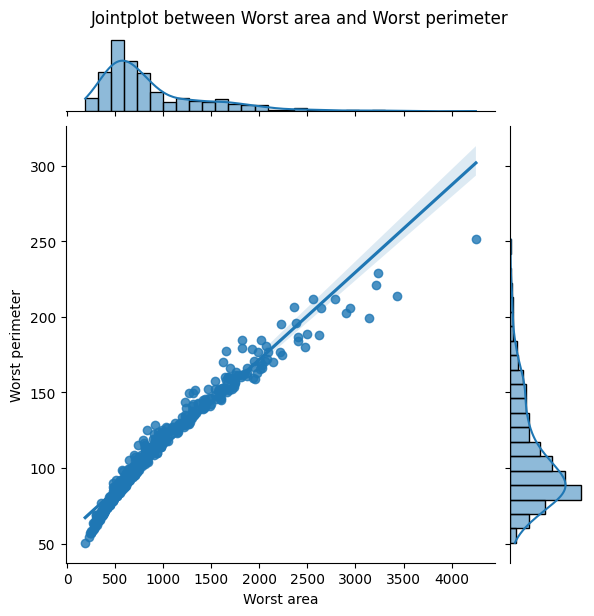

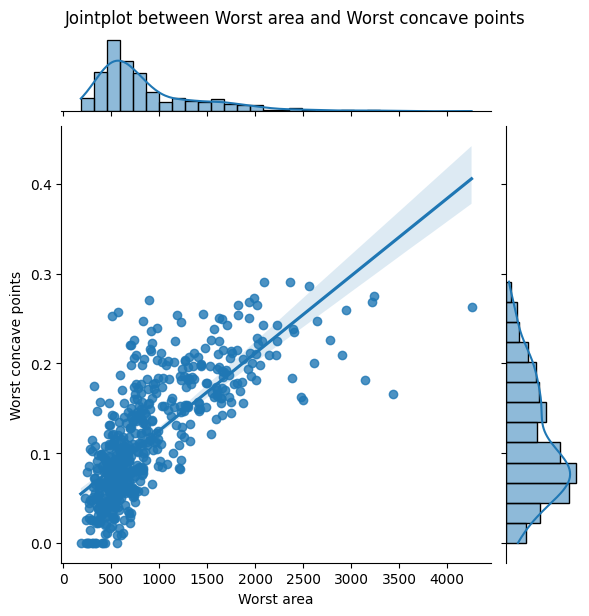

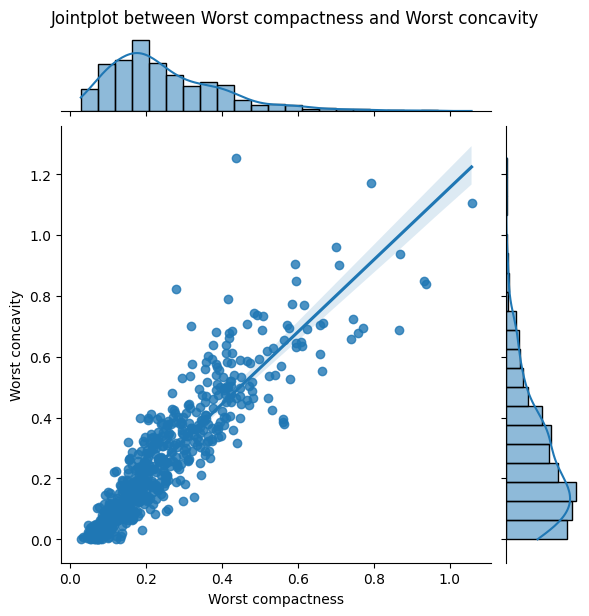

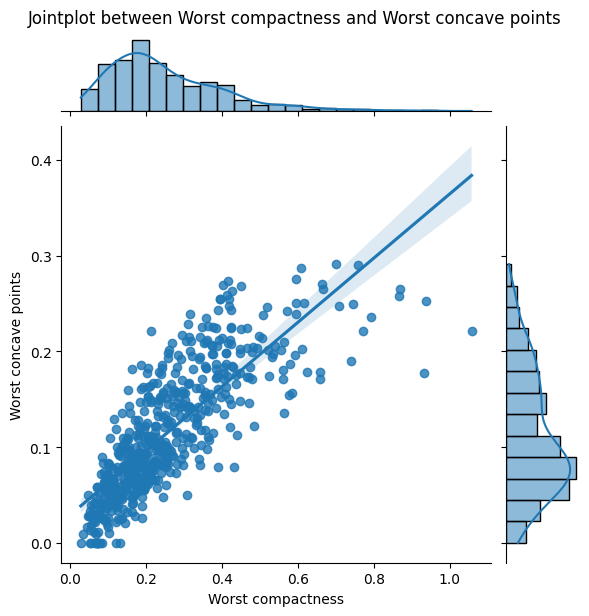

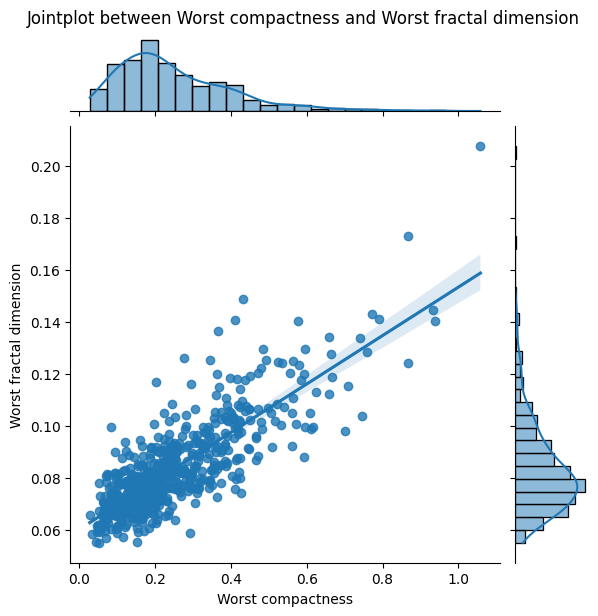

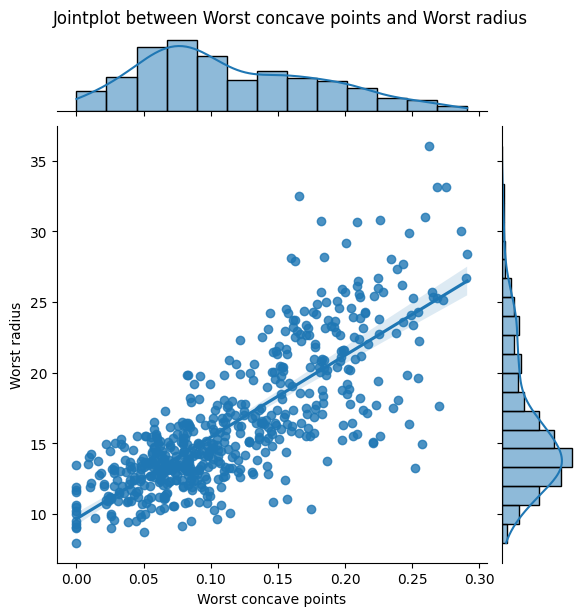

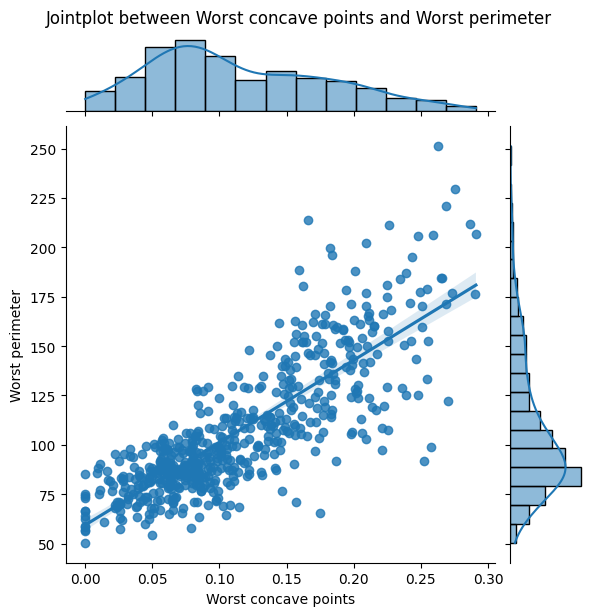

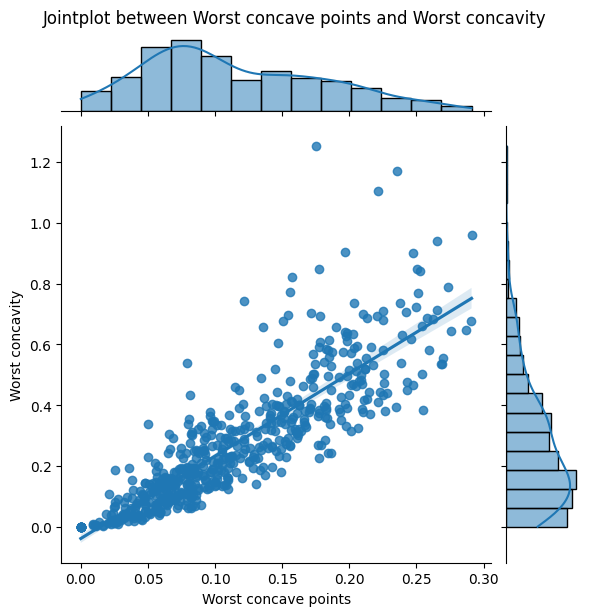

In [23]:
# Plot jointplot for each pair of variables with high correlation
plotted_pairs = set()  # Keep track of plotted pairs to avoid duplication
for col1, col2 in high_corr_pairs:
    # Check if the pair or its reverse has already been plotted
    if (col1, col2) not in plotted_pairs and (col2, col1) not in plotted_pairs:
        joint = sns.jointplot(x=col1, y=col2, data=data, kind='reg')
        joint.fig.suptitle(f'Jointplot between {col1} and {col2}', y=1.02)
        plt.show()
        # Add the current pair and its reverse to the plotted pairs set
        plotted_pairs.add((col1, col2))
        plotted_pairs.add((col2, col1))

### Histograms

In [24]:
# Filter the DataFrame for benign and malignant tumors
benign_tumors = data[data['Diagnosis'] == 0]  # Filter for benign tumors (Diagnosis = 0)
malignant_tumors = data[data['Diagnosis'] == 1]  # Filter for malignant tumors (Diagnosis = 1)

#### Histograms of "Radius mean" for Bening and Malignant Tumors

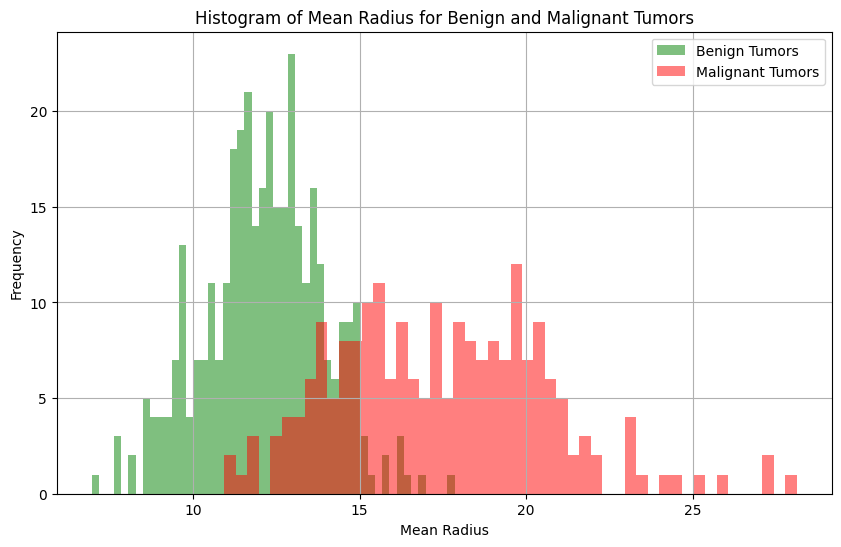

Most frequent malignant mean radius: 19.7016


In [25]:
# Figure size
plt.figure(figsize=(10, 6))

# Histogram for benign tumors
b = plt.hist(benign_tumors['Radius mean'], bins=50, alpha=0.5, color='green', label='Benign Tumors')

# Histogram for malignant tumors
m = plt.hist(malignant_tumors['Radius mean'], bins=50, alpha=0.5, color='red', label='Malignant Tumors')

# Histogram Settings
plt.xlabel('Mean Radius')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of Mean Radius for Benign and Malignant Tumors')  # Set the title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Display Histograms
plt.show()

# Get the bin with the highest frequency for malignant tumors (m)
frequent_bin_index = np.argmax(m[0])

# Get the midpoint of the most frequent bin as the most frequent value for malignant tumors
most_frequent_mean_radius = (m[1][frequent_bin_index] + m[1][frequent_bin_index + 1]) / 2

print("Most frequent malignant mean radius:", most_frequent_mean_radius)

#### Histograms of "Perimeter mean" for Bening and Malignant Tumors

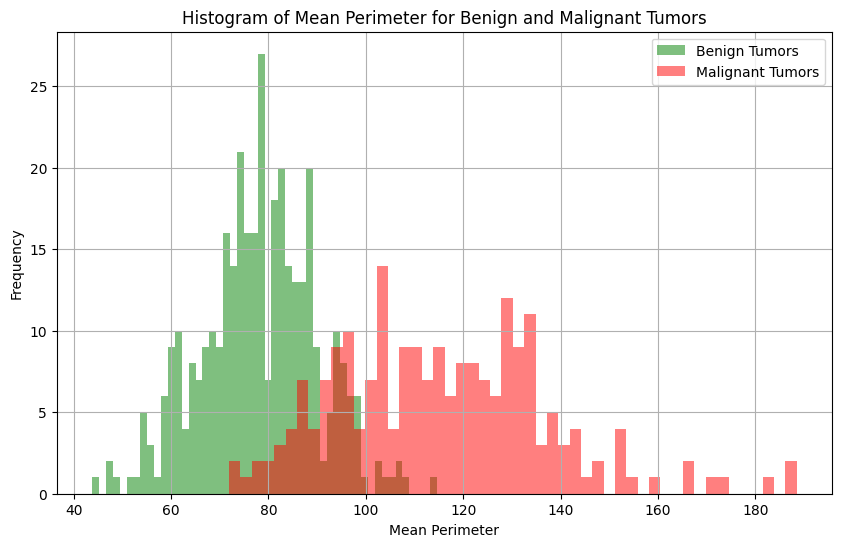

Most frequent malignant mean perimeter: 103.382


In [26]:
# Figure size
plt.figure(figsize=(10, 6))

# Histogram for benign tumors
b = plt.hist(benign_tumors['Perimeter mean'], bins=50, alpha=0.5, color='green', label='Benign Tumors')

# Histogram for malignant tumors
m = plt.hist(malignant_tumors['Perimeter mean'], bins=50, alpha=0.5, color='red', label='Malignant Tumors')

# Histogram Settings
plt.xlabel('Mean Perimeter')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of Mean Perimeter for Benign and Malignant Tumors')  # Set the title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Display Histograms
plt.show()

# Get the bin with the highest frequency for malignant tumors (m)
frequent_bin_index = np.argmax(m[0])

# Get the midpoint of the most frequent bin as the most frequent value for malignant tumors
most_frequent_mean_perimeter = (m[1][frequent_bin_index] + m[1][frequent_bin_index + 1]) / 2

print("Most frequent malignant mean perimeter:", most_frequent_mean_perimeter)

#### Histograms of "Concave points mean" for Bening and Malignant Tumors

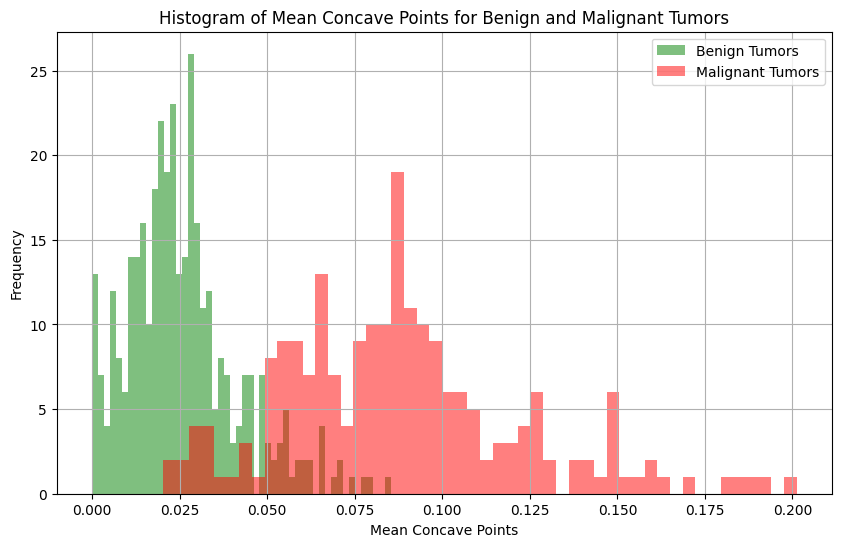

Most frequent malignant mean concave points: 0.08723929999999999


In [27]:
# Figure size
plt.figure(figsize=(10, 6))

# Histogram for benign tumors
b = plt.hist(benign_tumors['Concave points mean'], bins=50, alpha=0.5, color='green', label='Benign Tumors')

# Histogram for malignant tumors
m = plt.hist(malignant_tumors['Concave points mean'], bins=50, alpha=0.5, color='red', label='Malignant Tumors')

# Histogram Settings
plt.xlabel('Mean Concave Points')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Histogram of Mean Concave Points for Benign and Malignant Tumors')  # Set the title of the plot
plt.legend()  # Show legend
plt.grid(True)  # Show grid

# Display Histograms
plt.show()

# Get the bin with the highest frequency for malignant tumors (m)
frequent_bin_index = np.argmax(m[0])

# Get the midpoint of the most frequent bin as the most frequent value for malignant tumors
most_frequent_mean_concave_points = (m[1][frequent_bin_index] + m[1][frequent_bin_index + 1]) / 2

print("Most frequent malignant mean concave points:", most_frequent_mean_concave_points)

### Boxplots Without Normalization

#### All Boxplots

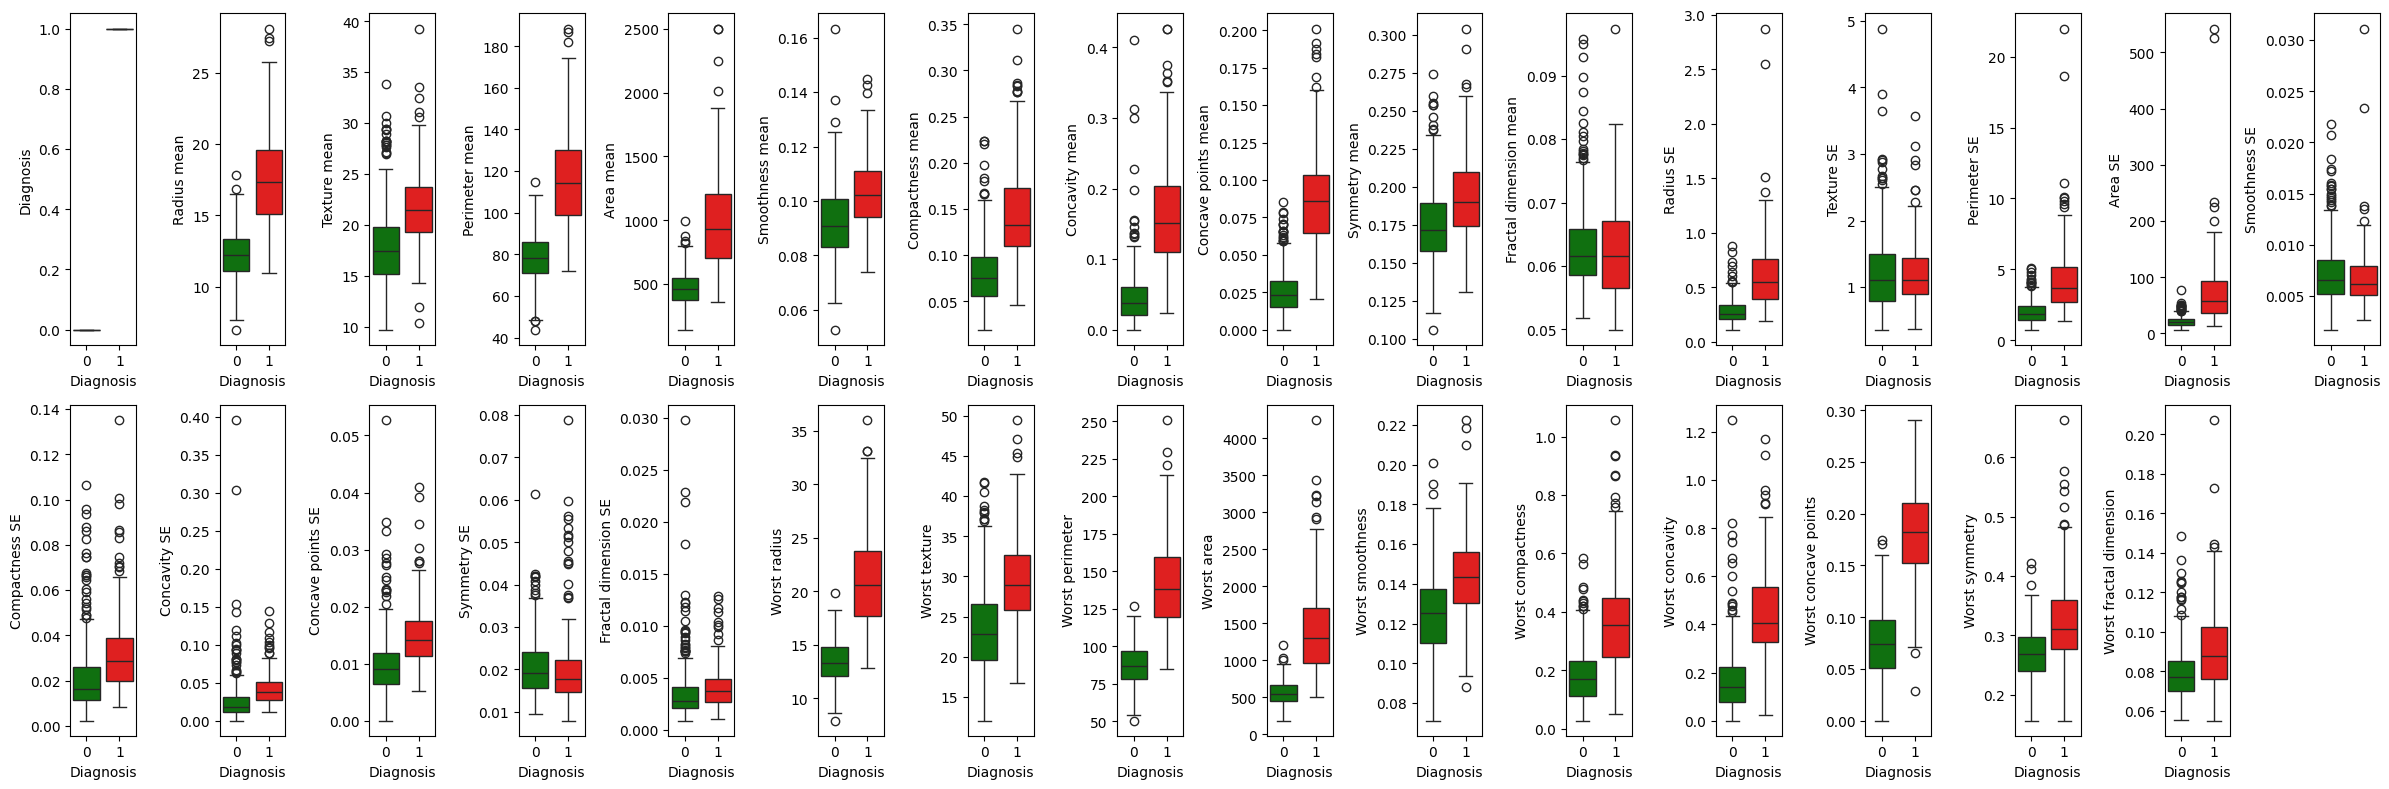

In [28]:
# Plot Settings
plt.figure(figsize=(24, 8))

# Loop through each column
for i, column in enumerate(data.columns, 1):
    # Create subplots
    plt.subplot(2, len(data.columns)//2 + 1, i)
    
    # Plot boxplot with hue set to 'Diagnosis'
    sns.boxplot(x='Diagnosis', y=column, data=data, palette={0: 'green', 1: 'red'}, hue='Diagnosis')
    
    # Remove the legend
    plt.legend([],[], frameon=False)
    
    # Set title and y-label
    #plt.title(f'{column}')
    plt.ylabel(column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Individual Boxplots

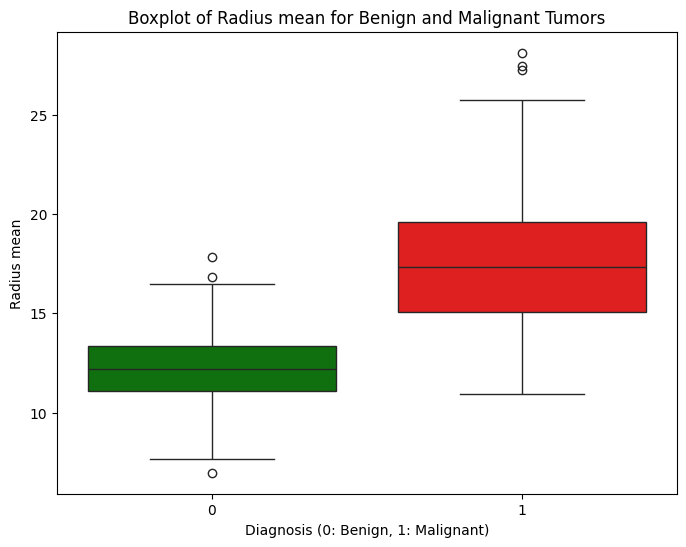

Potential outliers in benign tumors for Radius mean
Lower bound: 7.645000000000001
Upper bound: 16.805
Potential outliers: [ 6.981 16.84  17.85 ]
Quantity of potential outliers: 3
Percentage of potential outliers: 0.84%

Potential outliers in malignant tumors for Radius mean
Lower bound: 8.302499999999998
Upper bound: 26.3625
Potential outliers: [27.22 28.11 27.42]
Quantity of potential outliers: 3
Percentage of potential outliers: 1.42%




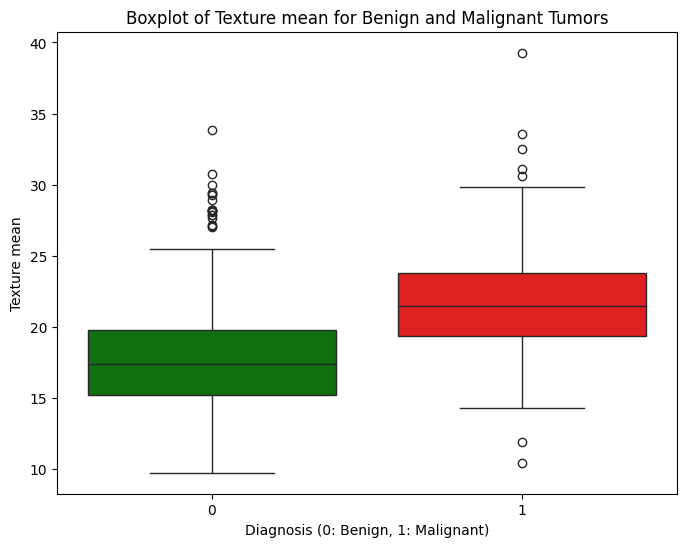

Potential outliers in benign tumors for Texture mean
Lower bound: 8.235
Upper bound: 26.675000000000004
Potential outliers: [27.08 33.81 27.85 28.21 28.23 30.72 29.29 28.2  26.99 28.14 29.97 28.06
 29.43 28.92 27.61 27.88 27.15 29.37]
Quantity of potential outliers: 18
Percentage of potential outliers: 5.04%

Potential outliers in malignant tumors for Texture mean
Lower bound: 12.67125
Upper bound: 30.42125
Potential outliers: [10.38 11.89 32.47 39.28 33.56 31.12 30.62]
Quantity of potential outliers: 7
Percentage of potential outliers: 3.30%




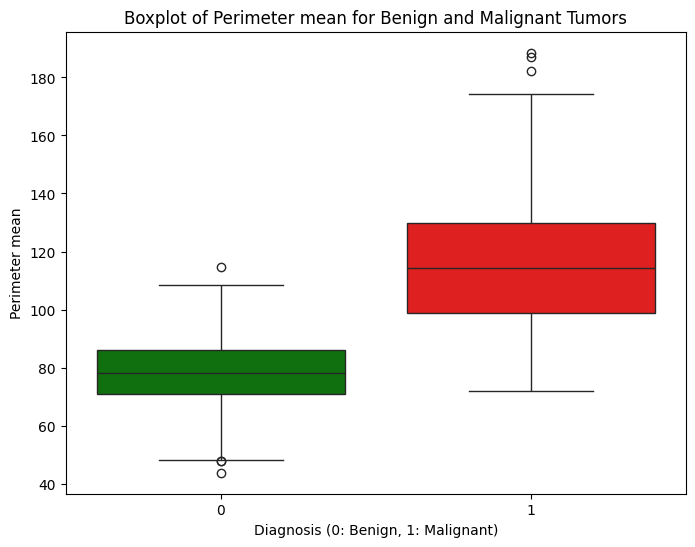

Potential outliers in benign tumors for Perimeter mean
Lower bound: 48.02500000000002
Upper bound: 108.94499999999998
Potential outliers: [ 43.79 114.6   47.98  47.92]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.12%

Potential outliers in malignant tumors for Perimeter mean
Lower bound: 51.974999999999994
Upper bound: 176.69500000000002
Potential outliers: [182.1 188.5 186.9]
Quantity of potential outliers: 3
Percentage of potential outliers: 1.42%




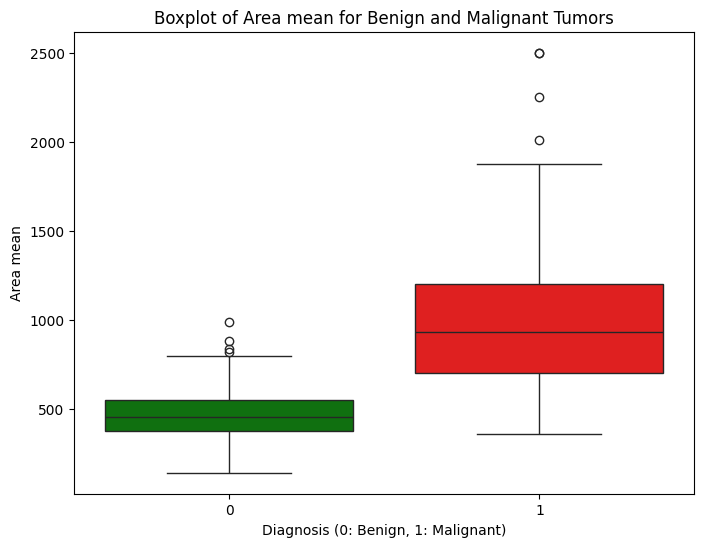

Potential outliers in benign tumors for Area mean
Lower bound: 118.84999999999997
Upper bound: 810.45
Potential outliers: [880.2 838.1 992.1 819.8]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.12%

Potential outliers in malignant tumors for Area mean
Lower bound: -42.375000000000114
Upper bound: 1951.4250000000002
Potential outliers: [2250. 2499. 2010. 2501.]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.89%




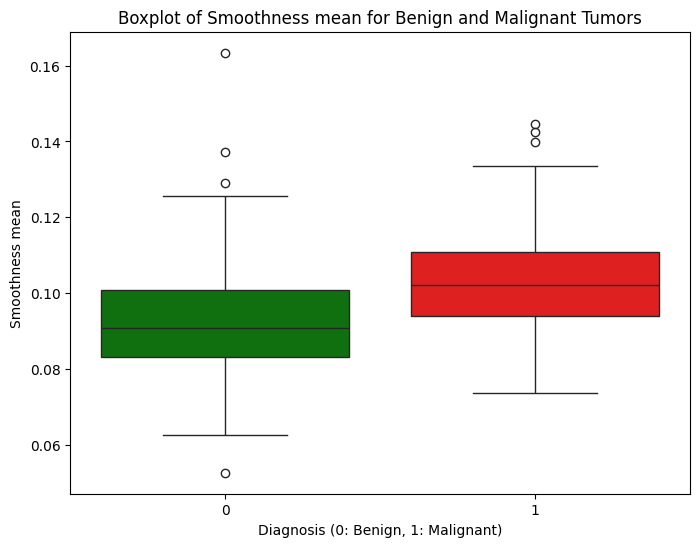

Potential outliers in benign tumors for Smoothness mean
Lower bound: 0.05659999999999999
Upper bound: 0.12716
Potential outliers: [0.1291  0.1634  0.1371  0.05263]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.12%

Potential outliers in malignant tumors for Smoothness mean
Lower bound: 0.06863749999999999
Upper bound: 0.1362975
Potential outliers: [0.1425 0.1398 0.1447]
Quantity of potential outliers: 3
Percentage of potential outliers: 1.42%




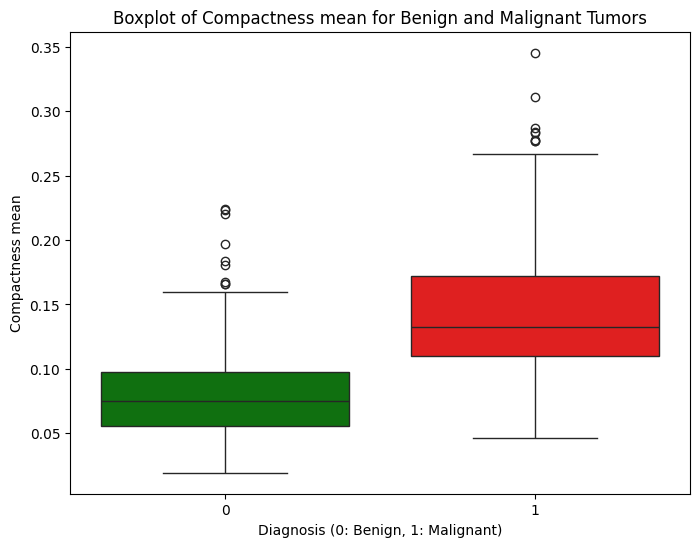

Potential outliers in benign tumors for Compactness mean
Lower bound: -0.00727499999999999
Upper bound: 0.160445
Potential outliers: [0.2233 0.1807 0.1676 0.1972 0.166  0.1836 0.2239 0.2204 0.1661]
Quantity of potential outliers: 9
Percentage of potential outliers: 2.52%

Potential outliers in malignant tumors for Compactness mean
Lower bound: 0.015400000000000011
Upper bound: 0.2666
Potential outliers: [0.2776 0.2839 0.3454 0.2768 0.2867 0.2832 0.3114 0.277 ]
Quantity of potential outliers: 8
Percentage of potential outliers: 3.77%




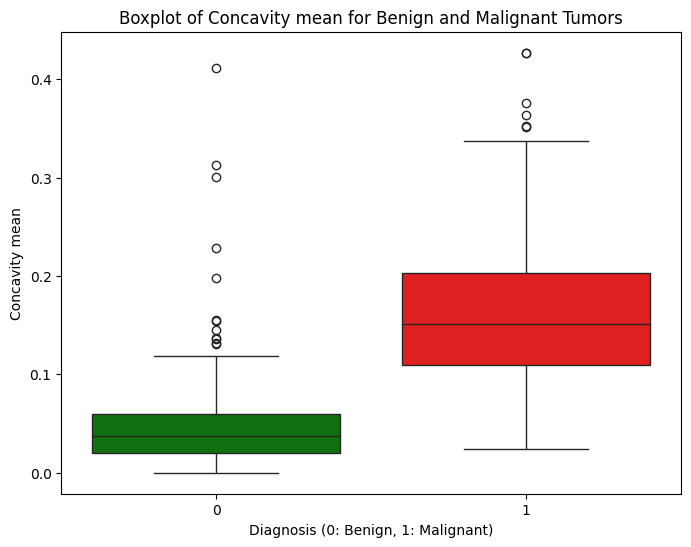

Potential outliers in benign tumors for Concavity mean
Lower bound: -0.03921
Upper bound: 0.11951
Potential outliers: [0.313  0.3003 0.1321 0.4108 0.1307 0.1548 0.1374 0.1362 0.1975 0.228
 0.145  0.1544]
Quantity of potential outliers: 12
Percentage of potential outliers: 3.36%

Potential outliers in malignant tumors for Concavity mean
Lower bound: -0.030762499999999998
Upper bound: 0.3433375
Potential outliers: [0.3754 0.4264 0.4268 0.3523 0.3635 0.3514]
Quantity of potential outliers: 6
Percentage of potential outliers: 2.83%




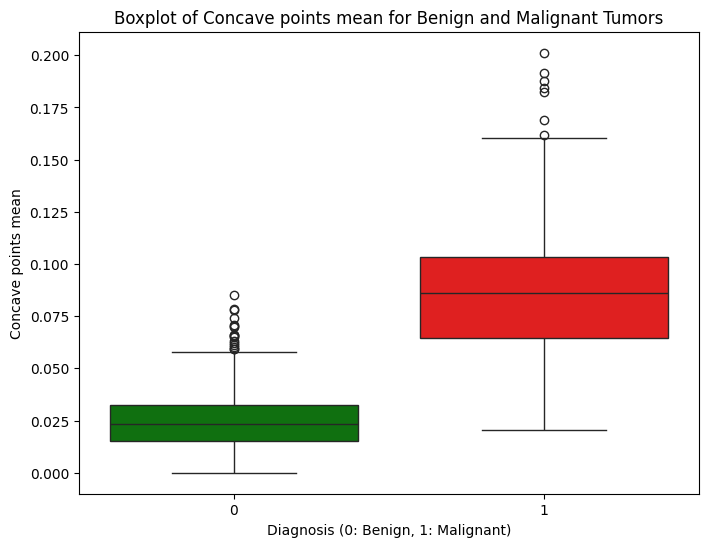

Potential outliers in benign tumors for Concave points mean
Lower bound: -0.011214999999999998
Upper bound: 0.05874499999999999
Potential outliers: [0.06556 0.06987 0.07064 0.06021 0.07798 0.08534 0.05933 0.07857 0.07404
 0.06602 0.05941 0.063   0.06495 0.06211 0.06142 0.07038 0.06615]
Quantity of potential outliers: 17
Percentage of potential outliers: 4.76%

Potential outliers in malignant tumors for Concave points mean
Lower bound: 0.006787499999999988
Upper bound: 0.16100750000000003
Potential outliers: [0.1845 0.1823 0.2012 0.1878 0.162  0.1913 0.1689]
Quantity of potential outliers: 7
Percentage of potential outliers: 3.30%




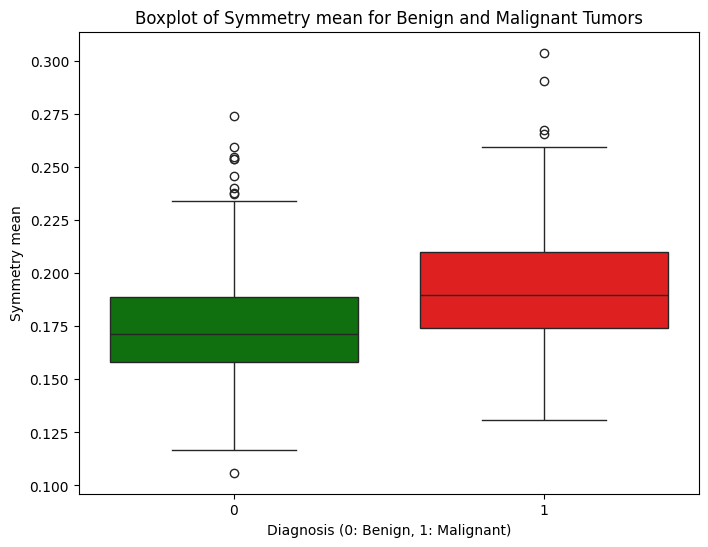

Potential outliers in benign tumors for Symmetry mean
Lower bound: 0.1115
Upper bound: 0.2355
Potential outliers: [0.2743 0.2403 0.254  0.2548 0.2595 0.2459 0.2538 0.2372 0.2378 0.106 ]
Quantity of potential outliers: 10
Percentage of potential outliers: 2.80%

Potential outliers in malignant tumors for Symmetry mean
Lower bound: 0.12035000000000001
Upper bound: 0.26355
Potential outliers: [0.304  0.2906 0.2655 0.2678]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.89%




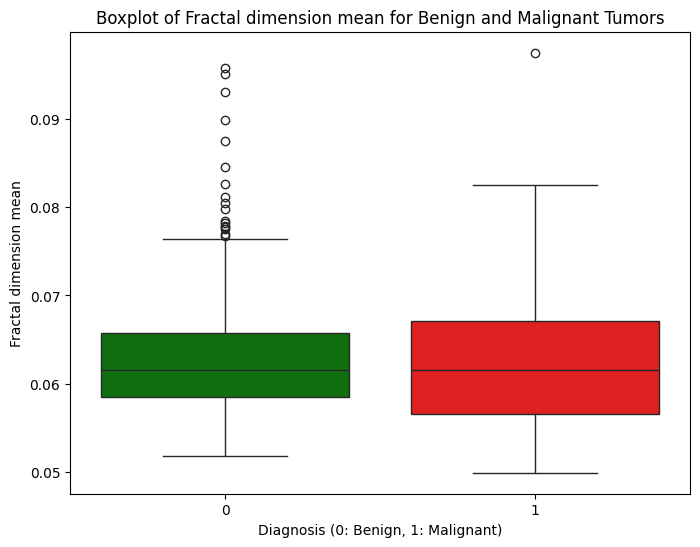

Potential outliers in benign tumors for Fractal dimension mean
Lower bound: 0.047685
Upper bound: 0.076605
Potential outliers: [0.08046 0.0898  0.07818 0.07769 0.07782 0.07839 0.08261 0.09296 0.08116
 0.07669 0.08743 0.0845  0.09502 0.09575 0.07976 0.07696 0.07751]
Quantity of potential outliers: 17
Percentage of potential outliers: 4.76%

Potential outliers in malignant tumors for Fractal dimension mean
Lower bound: 0.04088125000000001
Upper bound: 0.08279124999999998
Potential outliers: [0.09744]
Quantity of potential outliers: 1
Percentage of potential outliers: 0.47%




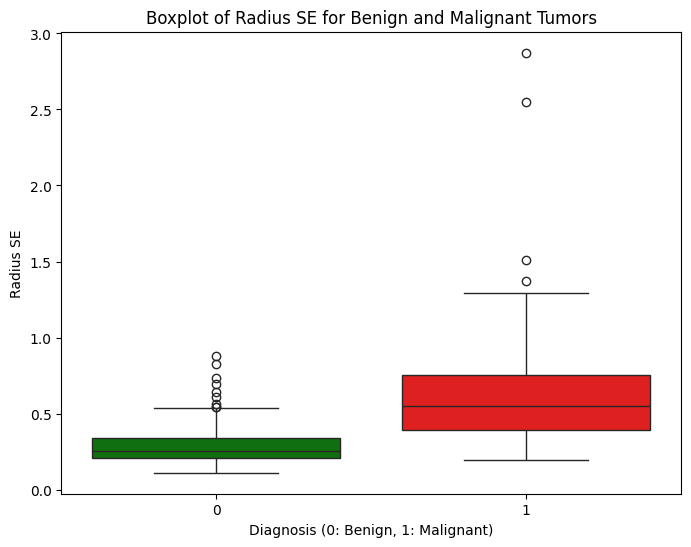

Potential outliers in benign tumors for Radius SE
Lower bound: 0.005849999999999994
Upper bound: 0.54305
Potential outliers: [0.8245 0.7311 0.6412 0.5619 0.8811 0.5462 0.6965 0.6061 0.5461]
Quantity of potential outliers: 9
Percentage of potential outliers: 2.52%

Potential outliers in malignant tumors for Radius SE
Lower bound: -0.1600124999999999
Upper bound: 1.3076875
Potential outliers: [1.509 2.873 1.37  2.547]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.89%




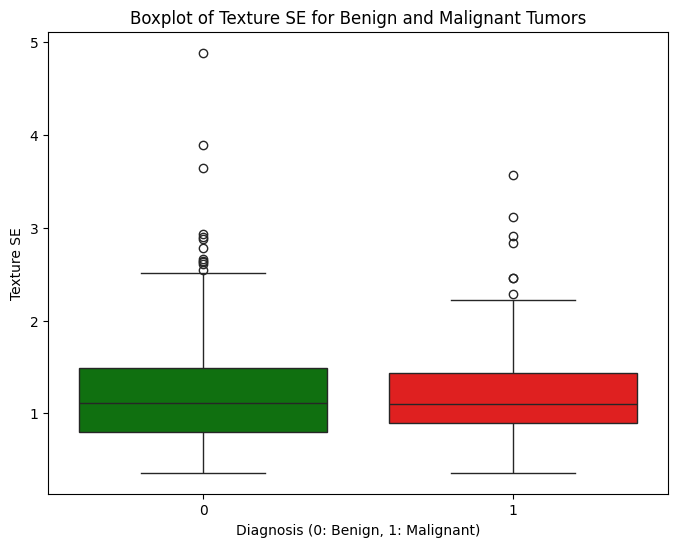

Potential outliers in benign tumors for Texture SE
Lower bound: -0.24824999999999986
Upper bound: 2.53615
Potential outliers: [2.664 4.885 2.612 2.777 2.878 2.542 2.643 3.647 2.635 2.927 2.904 3.896]
Quantity of potential outliers: 12
Percentage of potential outliers: 3.36%

Potential outliers in malignant tumors for Texture SE
Lower bound: 0.08818750000000009
Upper bound: 2.2338875
Potential outliers: [3.568 2.91  3.12  2.454 2.284 2.836 2.463]
Quantity of potential outliers: 7
Percentage of potential outliers: 3.30%




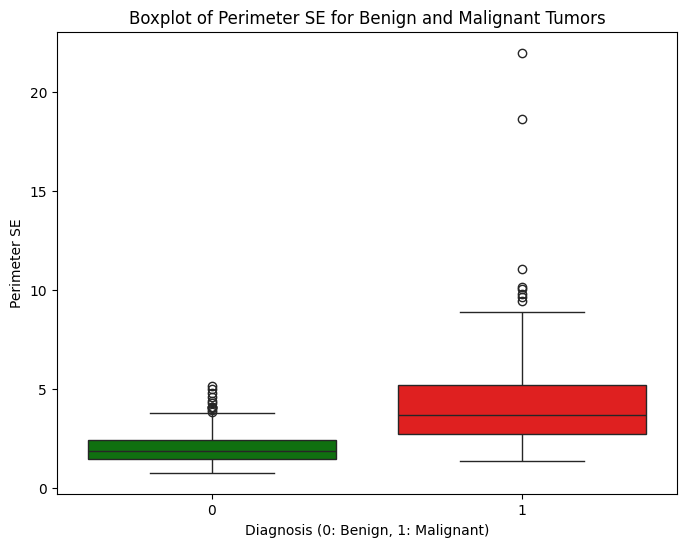

Potential outliers in benign tumors for Perimeter SE
Lower bound: 0.030500000000000194
Upper bound: 3.8024999999999998
Potential outliers: [3.814 4.073 3.926 5.118 4.021 4.36  4.277 4.795 4.607 4.099 5.004 4.091]
Quantity of potential outliers: 12
Percentage of potential outliers: 3.36%

Potential outliers in malignant tumors for Perimeter SE
Lower bound: -1.0206250000000012
Upper bound: 8.942375000000002
Potential outliers: [11.07  10.05   9.807 21.98  10.12   9.424 18.65   9.635]
Quantity of potential outliers: 8
Percentage of potential outliers: 3.77%




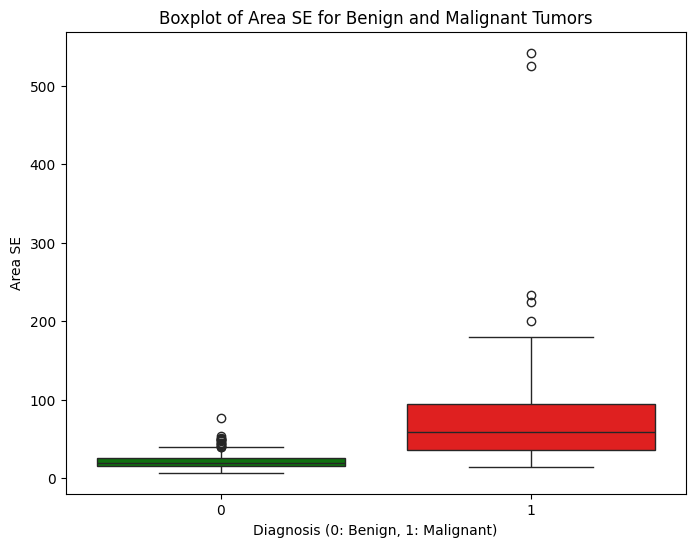

Potential outliers in benign tumors for Area SE
Lower bound: 0.6049999999999986
Upper bound: 39.685
Potential outliers: [42.76 39.84 49.85 46.61 53.65 48.29 39.93 48.84 77.11 41.24 49.45 43.52
 44.96 50.95 44.74]
Quantity of potential outliers: 15
Percentage of potential outliers: 4.20%

Potential outliers in malignant tumors for Area SE
Lower bound: -51.593749999999986
Upper bound: 181.35625
Potential outliers: [233.  525.6 199.7 224.1 542.2]
Quantity of potential outliers: 5
Percentage of potential outliers: 2.36%




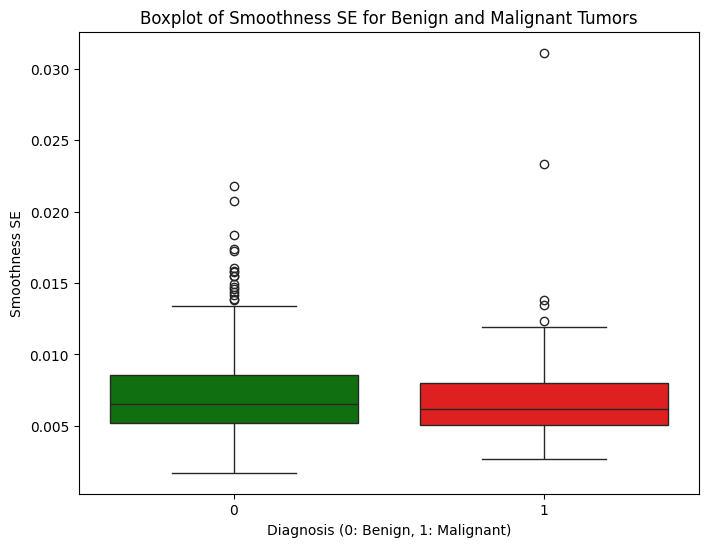

Potential outliers in benign tumors for Smoothness SE
Lower bound: 0.00022899999999999917
Upper bound: 0.013517000000000001
Potential outliers: [0.01721 0.01385 0.01835 0.01496 0.01439 0.01604 0.0138  0.01418 0.01574
 0.02075 0.01736 0.01582 0.01474 0.01459 0.02177 0.01546 0.01547]
Quantity of potential outliers: 17
Percentage of potential outliers: 4.76%

Potential outliers in malignant tumors for Smoothness SE
Lower bound: 0.0007553750000000017
Upper bound: 0.012300374999999997
Potential outliers: [0.02333 0.0138  0.01345 0.03113 0.01236]
Quantity of potential outliers: 5
Percentage of potential outliers: 2.36%




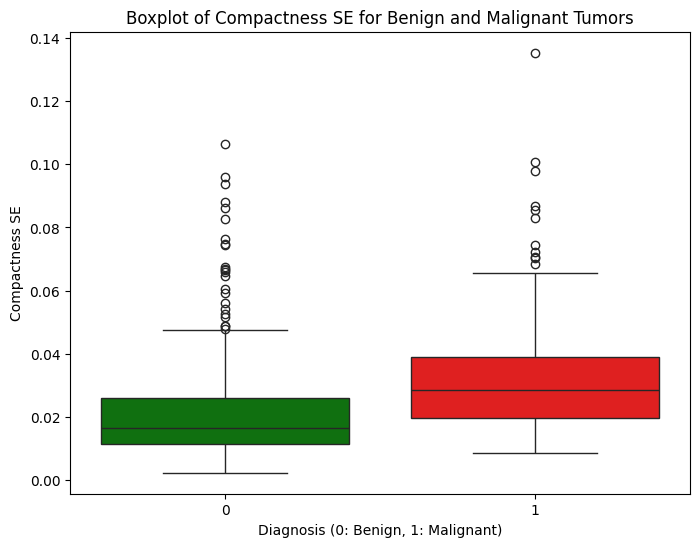

Potential outliers in benign tumors for Compactness SE
Lower bound: -0.010535
Upper bound: 0.047744999999999996
Potential outliers: [0.08606 0.09368 0.07446 0.0676  0.04877 0.05416 0.09586 0.08808 0.05914
 0.05592 0.04785 0.05156 0.08262 0.1064  0.0659  0.07643 0.06669 0.05244
 0.06063 0.06657 0.07471 0.04888 0.06457]
Quantity of potential outliers: 23
Percentage of potential outliers: 6.44%

Potential outliers in malignant tumors for Compactness SE
Lower bound: -0.009208750000000002
Upper bound: 0.06778125
Potential outliers: [0.07458 0.07217 0.08297 0.1006  0.07056 0.06835 0.08668 0.09806 0.1354
 0.08555 0.07025]
Quantity of potential outliers: 11
Percentage of potential outliers: 5.19%




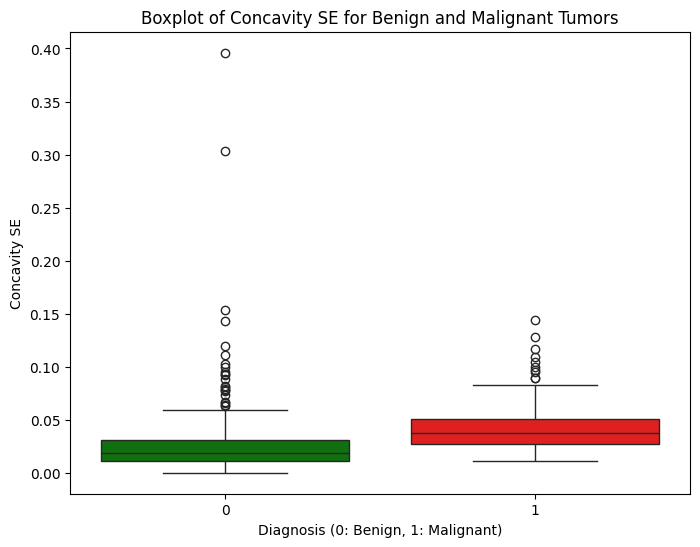

Potential outliers in benign tumors for Concavity SE
Lower bound: -0.018365
Upper bound: 0.059914999999999996
Potential outliers: [0.3038  0.1435  0.09263 0.07753 0.396   0.1197  0.0888  0.08158 0.07339
 0.07927 0.08099 0.0996  0.1027  0.06271 0.1535  0.09472 0.0643  0.06663
 0.07683 0.1114  0.09252 0.06578]
Quantity of potential outliers: 22
Percentage of potential outliers: 6.16%

Potential outliers in malignant tumors for Concavity SE
Lower bound: -0.008170000000000004
Upper bound: 0.08561
Potential outliers: [0.0889  0.09723 0.1091  0.104   0.1278  0.1166  0.08958 0.1438  0.09518
 0.09953]
Quantity of potential outliers: 10
Percentage of potential outliers: 4.72%




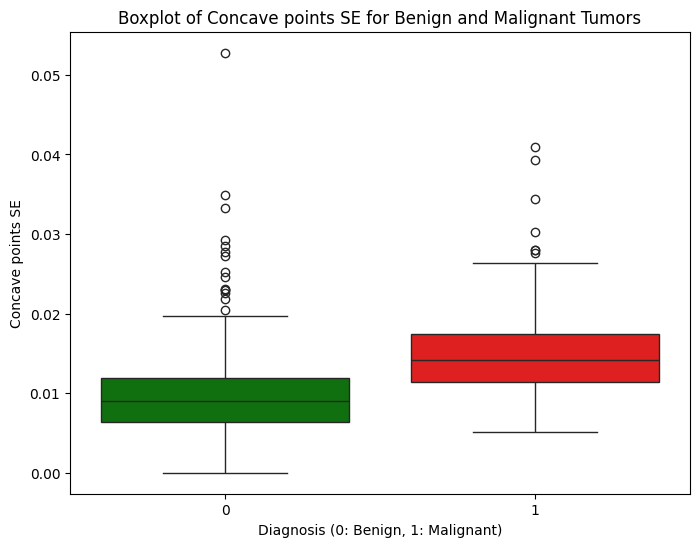

Potential outliers in benign tumors for Concave points SE
Lower bound: -0.0017224999999999992
Upper bound: 0.0200255
Potential outliers: [0.03322 0.02295 0.02292 0.02308 0.02258 0.05279 0.0246  0.03487 0.02771
 0.02527 0.02919 0.02047 0.02721 0.02188 0.02853]
Quantity of potential outliers: 15
Percentage of potential outliers: 4.20%

Potential outliers in malignant tumors for Concave points SE
Lower bound: 0.00229125
Upper bound: 0.02662125
Potential outliers: [0.0409  0.02801 0.02794 0.02765 0.03927 0.03024 0.03441]
Quantity of potential outliers: 7
Percentage of potential outliers: 3.30%




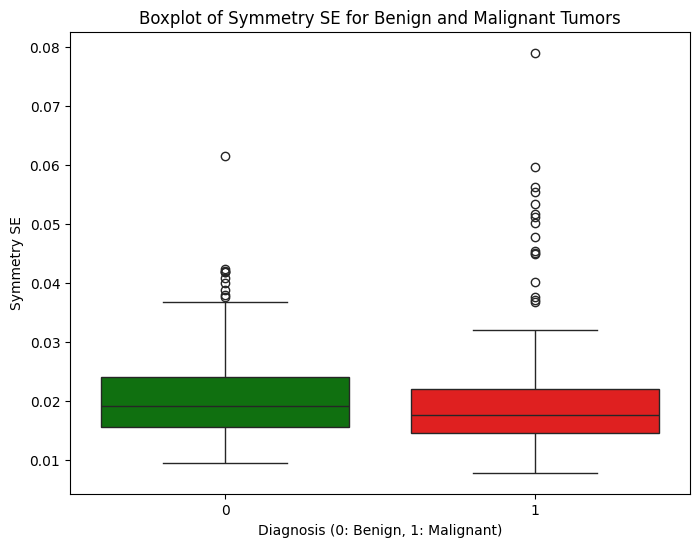

Potential outliers in benign tumors for Symmetry SE
Lower bound: 0.002909999999999996
Upper bound: 0.036750000000000005
Potential outliers: [0.04183 0.04192 0.04197 0.0388  0.03799 0.04077 0.06146 0.04243 0.03997
 0.03759]
Quantity of potential outliers: 10
Percentage of potential outliers: 2.80%

Potential outliers in malignant tumors for Symmetry SE
Lower bound: 0.0033387499999999997
Upper bound: 0.03340875
Potential outliers: [0.05963 0.04484 0.03672 0.05333 0.07895 0.05014 0.04547 0.05168 0.05628
 0.05113 0.04783 0.04499 0.04022 0.03756 0.05543 0.0371 ]
Quantity of potential outliers: 16
Percentage of potential outliers: 7.55%




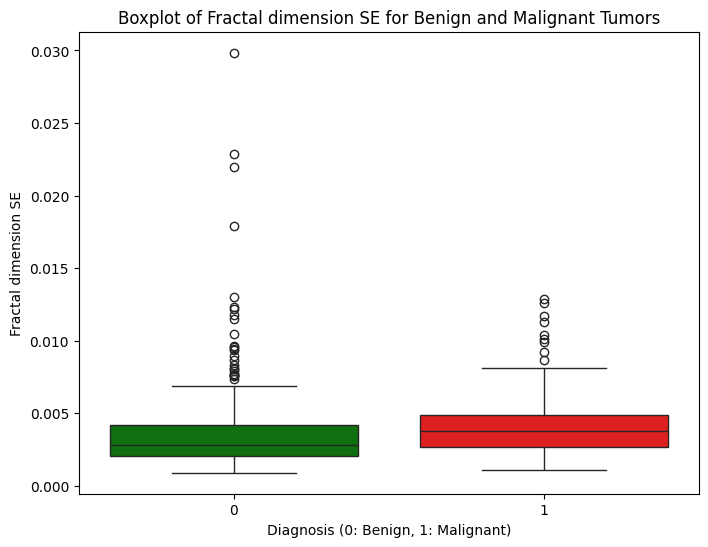

Potential outliers in benign tumors for Fractal dimension SE
Lower bound: -0.0010760000000000001
Upper bound: 0.007324
Potential outliers: [0.009559 0.02193  0.01298  0.009423 0.009368 0.01178  0.02984  0.01792
 0.008675 0.007555 0.00761  0.008015 0.02286  0.007877 0.007596 0.0122
 0.007358 0.01233  0.007731 0.008925 0.008133 0.009627 0.01045  0.01148
 0.008313 0.007551]
Quantity of potential outliers: 26
Percentage of potential outliers: 7.28%

Potential outliers in malignant tumors for Fractal dimension SE
Lower bound: -0.0006177499999999998
Upper bound: 0.00819825
Potential outliers: [0.009208 0.01008  0.01284  0.01039  0.009875 0.01172  0.01256  0.00866
 0.0113  ]
Quantity of potential outliers: 9
Percentage of potential outliers: 4.25%




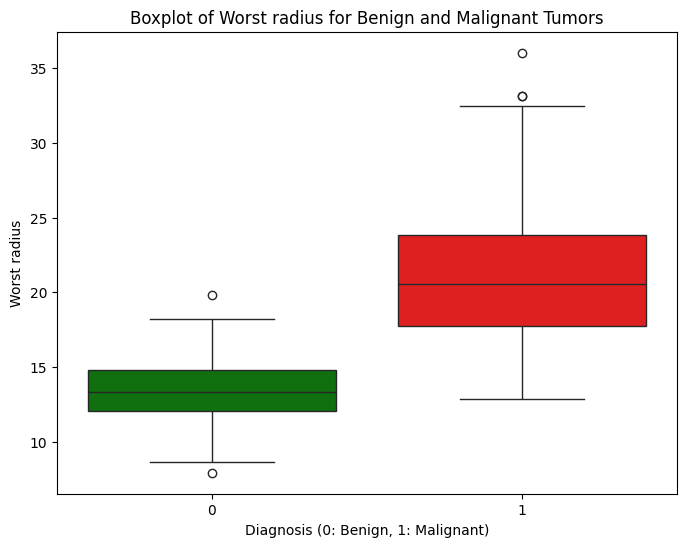

Potential outliers in benign tumors for Worst radius
Lower bound: 7.999999999999999
Upper bound: 18.880000000000003
Potential outliers: [ 7.93 19.82]
Quantity of potential outliers: 2
Percentage of potential outliers: 0.56%

Potential outliers in malignant tumors for Worst radius
Lower bound: 8.613750000000005
Upper bound: 32.92374999999999
Potential outliers: [33.12 33.13 36.04]
Quantity of potential outliers: 3
Percentage of potential outliers: 1.42%




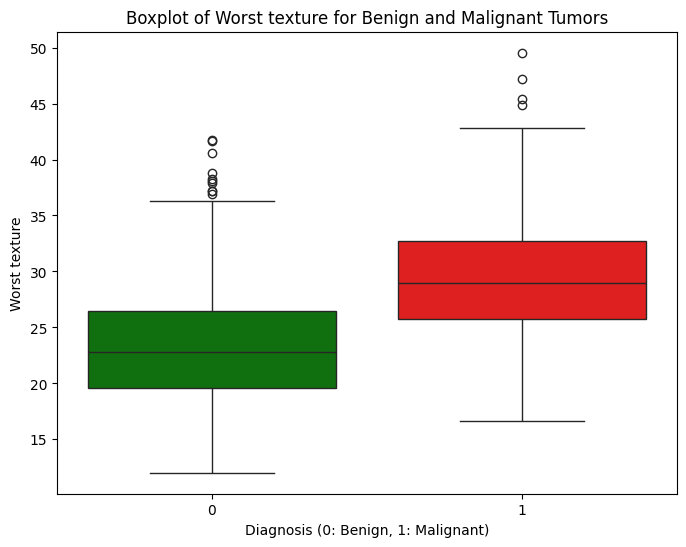

Potential outliers in benign tumors for Worst texture
Lower bound: 9.184999999999993
Upper bound: 36.90500000000001
Potential outliers: [41.78 40.54 37.88 41.61 38.81 36.92 38.05 37.17 37.16 38.3 ]
Quantity of potential outliers: 10
Percentage of potential outliers: 2.80%

Potential outliers in malignant tumors for Worst texture
Lower bound: 15.42125
Upper bound: 43.051249999999996
Potential outliers: [45.41 44.87 49.54 47.16]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.89%




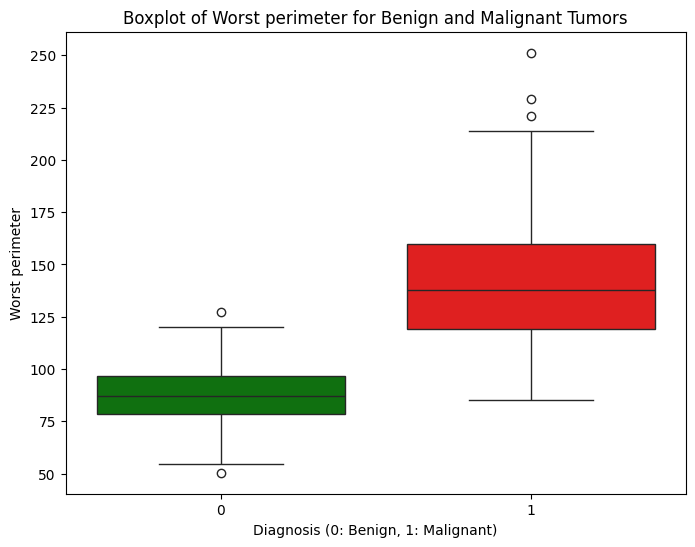

Potential outliers in benign tumors for Worst perimeter
Lower bound: 50.789999999999985
Upper bound: 124.07000000000002
Potential outliers: [ 50.41 127.1 ]
Quantity of potential outliers: 2
Percentage of potential outliers: 0.56%

Potential outliers in malignant tumors for Worst perimeter
Lower bound: 58.61249999999999
Upper bound: 220.51250000000002
Potential outliers: [220.8 229.3 251.2]
Quantity of potential outliers: 3
Percentage of potential outliers: 1.42%




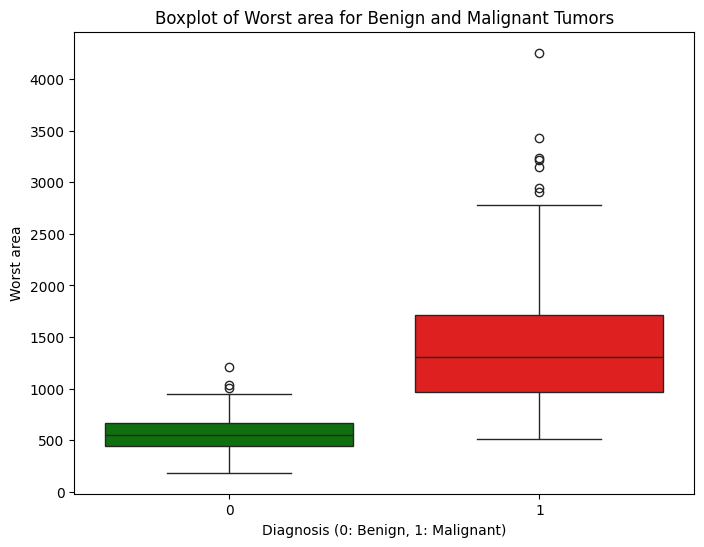

Potential outliers in benign tumors for Worst area
Lower bound: 112.75000000000006
Upper bound: 1004.3499999999999
Potential outliers: [1032. 1009. 1210.]
Quantity of potential outliers: 3
Percentage of potential outliers: 0.84%

Potential outliers in malignant tumors for Worst area
Lower bound: -143.37500000000023
Upper bound: 2826.425
Potential outliers: [3216. 2944. 3432. 2906. 3234. 3143. 4254.]
Quantity of potential outliers: 7
Percentage of potential outliers: 3.30%




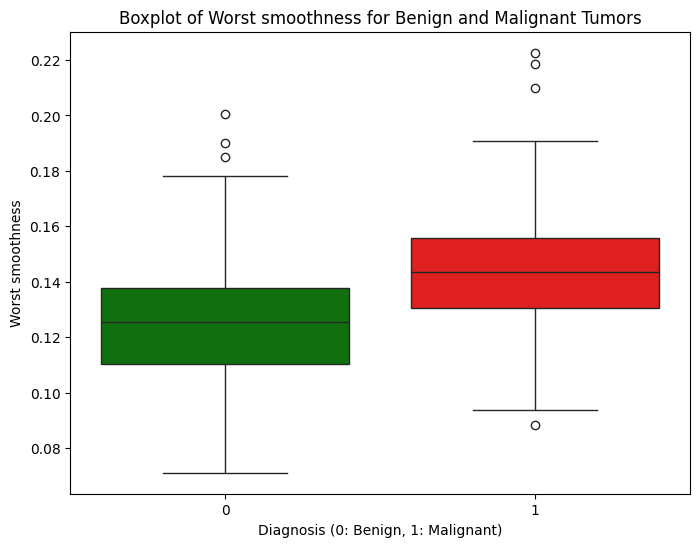

Potential outliers in benign tumors for Worst smoothness
Lower bound: 0.0696
Upper bound: 0.1784
Potential outliers: [0.1902 0.2006 0.185 ]
Quantity of potential outliers: 3
Percentage of potential outliers: 0.84%

Potential outliers in malignant tumors for Worst smoothness
Lower bound: 0.09222500000000002
Upper bound: 0.19422499999999998
Potential outliers: [0.2098  0.08822 0.2226  0.2184 ]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.89%




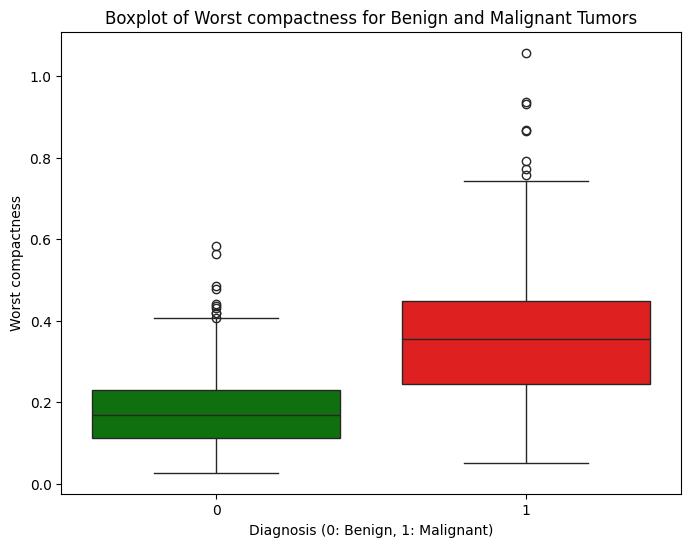

Potential outliers in benign tumors for Worst compactness
Lower bound: -0.06529999999999998
Upper bound: 0.4075
Potential outliers: [0.4365 0.4791 0.4193 0.431  0.4402 0.4848 0.5849 0.4082 0.5646 0.4202]
Quantity of potential outliers: 10
Percentage of potential outliers: 2.80%

Potential outliers in malignant tumors for Worst compactness
Lower bound: -0.06058749999999996
Upper bound: 0.7529124999999999
Potential outliers: [0.8663 1.058  0.7725 0.7584 0.9327 0.9379 0.7917 0.8681]
Quantity of potential outliers: 8
Percentage of potential outliers: 3.77%




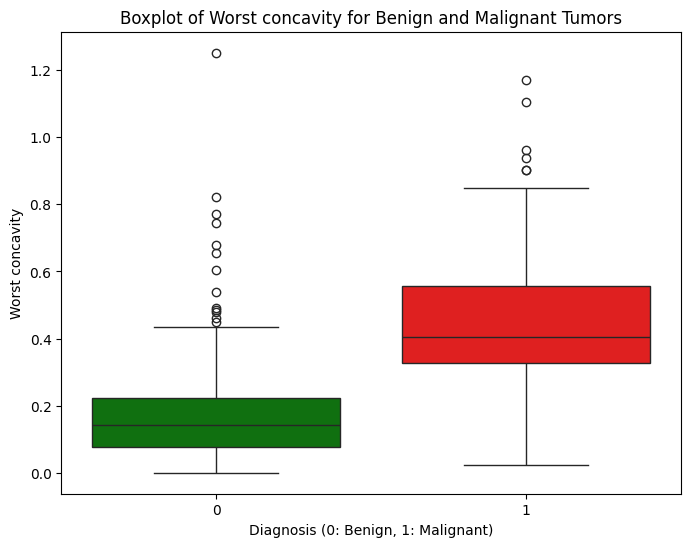

Potential outliers in benign tumors for Worst concavity
Lower bound: -0.1397
Upper bound: 0.43838
Potential outliers: [1.252  0.4858 0.6783 0.5381 0.8216 0.7436 0.7727 0.4609 0.603  0.4779
 0.6556 0.4504 0.4896]
Quantity of potential outliers: 13
Percentage of potential outliers: 3.64%

Potential outliers in malignant tumors for Worst concavity
Lower bound: -0.01820000000000005
Upper bound: 0.9008
Potential outliers: [1.105  0.9608 0.9034 0.9019 1.17   0.9387]
Quantity of potential outliers: 6
Percentage of potential outliers: 2.83%




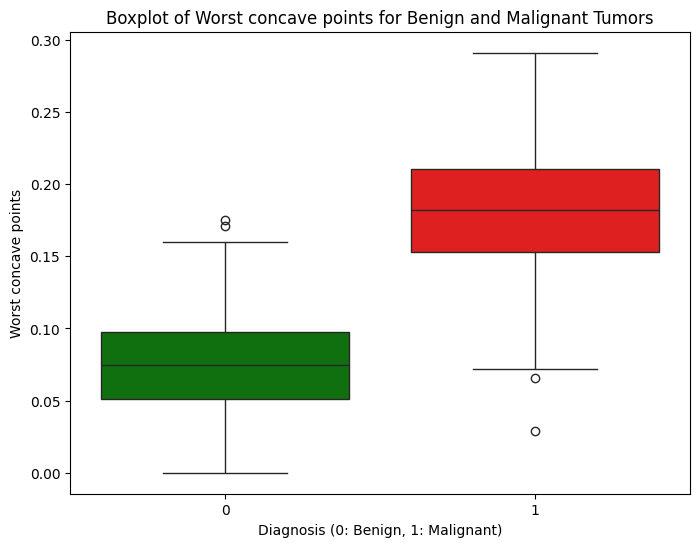

Potential outliers in benign tumors for Worst concave points
Lower bound: -0.018634999999999985
Upper bound: 0.16716499999999998
Potential outliers: [0.175  0.1708]
Quantity of potential outliers: 2
Percentage of potential outliers: 0.56%

Potential outliers in malignant tumors for Worst concave points
Lower bound: 0.06586249999999999
Upper bound: 0.2975625
Potential outliers: [0.02899 0.06575]
Quantity of potential outliers: 2
Percentage of potential outliers: 0.94%




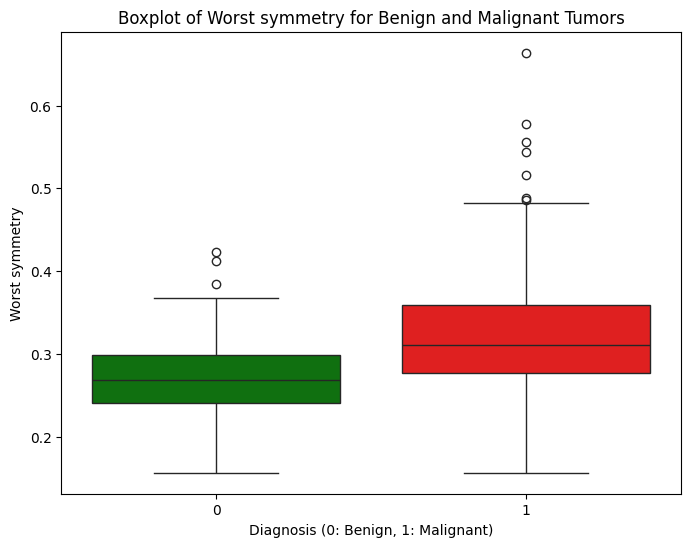

Potential outliers in benign tumors for Worst symmetry
Lower bound: 0.15405000000000002
Upper bound: 0.38485
Potential outliers: [0.4228 0.3849 0.4128]
Quantity of potential outliers: 3
Percentage of potential outliers: 0.84%

Potential outliers in malignant tumors for Worst symmetry
Lower bound: 0.15241249999999998
Upper bound: 0.4833124999999999
Potential outliers: [0.6638 0.4863 0.544  0.4882 0.5774 0.5166 0.5558]
Quantity of potential outliers: 7
Percentage of potential outliers: 3.30%




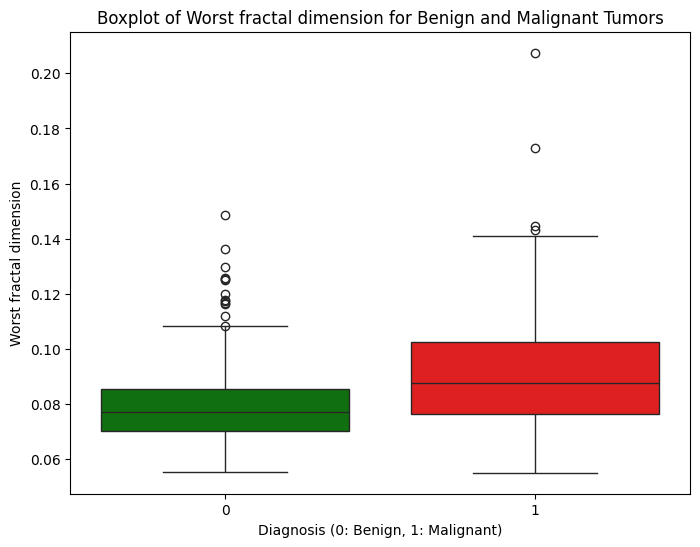

Potential outliers in benign tumors for Worst fractal dimension
Lower bound: 0.04711
Upper bound: 0.10839
Potential outliers: [0.1175 0.1084 0.1486 0.1259 0.1162 0.1297 0.1178 0.12   0.1118 0.1249
 0.1252 0.1364 0.1168]
Quantity of potential outliers: 13
Percentage of potential outliers: 3.64%

Potential outliers in malignant tumors for Worst fractal dimension
Lower bound: 0.03681875
Upper bound: 0.14210875
Potential outliers: [0.173  0.2075 0.1431 0.1446]
Quantity of potential outliers: 4
Percentage of potential outliers: 1.89%




In [29]:
# Individual boxplots for each numeric column
for column in data.columns:
    if data[column].dtype != 'object' and column != 'Diagnosis':  # Check if column is numeric and not 'Diagnosis'
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Diagnosis', y=column, hue='Diagnosis', data=data, palette={0: 'green', 1: 'red'}, legend=False)
        plt.title(f'Boxplot of {column} for Benign and Malignant Tumors')
        plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
        plt.ylabel(column)
        plt.show()

        # Calculate quartiles and IQR for benign tumors
        Q1_benign = data[data['Diagnosis'] == 0][column].quantile(0.25)
        Q3_benign = data[data['Diagnosis'] == 0][column].quantile(0.75)
        IQR_benign = Q3_benign - Q1_benign
        
        # Calculate lower and upper bounds for potential outliers in benign tumors
        lower_bound_benign = Q1_benign - 1.5 * IQR_benign
        upper_bound_benign = Q3_benign + 1.5 * IQR_benign

        # Get outliers for benign tumors
        outliers_benign = data[(data['Diagnosis'] == 0) & ((data[column] < lower_bound_benign) | (data[column] > upper_bound_benign))]
        
        # Calculate percentage of outliers in benign tumors
        percentage_outliers_benign = len(outliers_benign) / len(data[data['Diagnosis'] == 0]) * 100
        
        # Calculate quartiles and IQR for malignant tumors
        Q1_malignant = data[data['Diagnosis'] == 1][column].quantile(0.25)
        Q3_malignant = data[data['Diagnosis'] == 1][column].quantile(0.75)
        IQR_malignant = Q3_malignant - Q1_malignant
        
        # Calculate lower and upper bounds for potential outliers in malignant tumors
        lower_bound_malignant = Q1_malignant - 1.5 * IQR_malignant
        upper_bound_malignant = Q3_malignant + 1.5 * IQR_malignant

        # Get outliers for malignant tumors
        outliers_malignant = data[(data['Diagnosis'] == 1) & ((data[column] < lower_bound_malignant) | (data[column] > upper_bound_malignant))]
        
        # Calculate percentage of outliers in malignant tumors
        percentage_outliers_malignant = len(outliers_malignant) / len(data[data['Diagnosis'] == 1]) * 100

        # Print lower and upper bounds for benign and malignant tumors
        print(f'Potential outliers in benign tumors for {column}')
        print(f'Lower bound: {lower_bound_benign}')
        print(f'Upper bound: {upper_bound_benign}')
        print(f'Potential outliers: {outliers_benign[column].values}')
        print(f'Quantity of potential outliers: {len(outliers_benign)}')
        print(f'Percentage of potential outliers: {percentage_outliers_benign:.2f}%\n')
        
        print(f'Potential outliers in malignant tumors for {column}')
        print(f'Lower bound: {lower_bound_malignant}')
        print(f'Upper bound: {upper_bound_malignant}')
        print(f'Potential outliers: {outliers_malignant[column].values}')
        print(f'Quantity of potential outliers: {len(outliers_malignant)}')
        print(f'Percentage of potential outliers: {percentage_outliers_malignant:.2f}%\n\n')

### Data Normalization

In [30]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to normalize (exclude 'Diagnosis')
columns_to_normalize = [col for col in data.columns if col != 'Diagnosis']

# Apply Min-Max scaling to selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

### Boxplots With Normalization

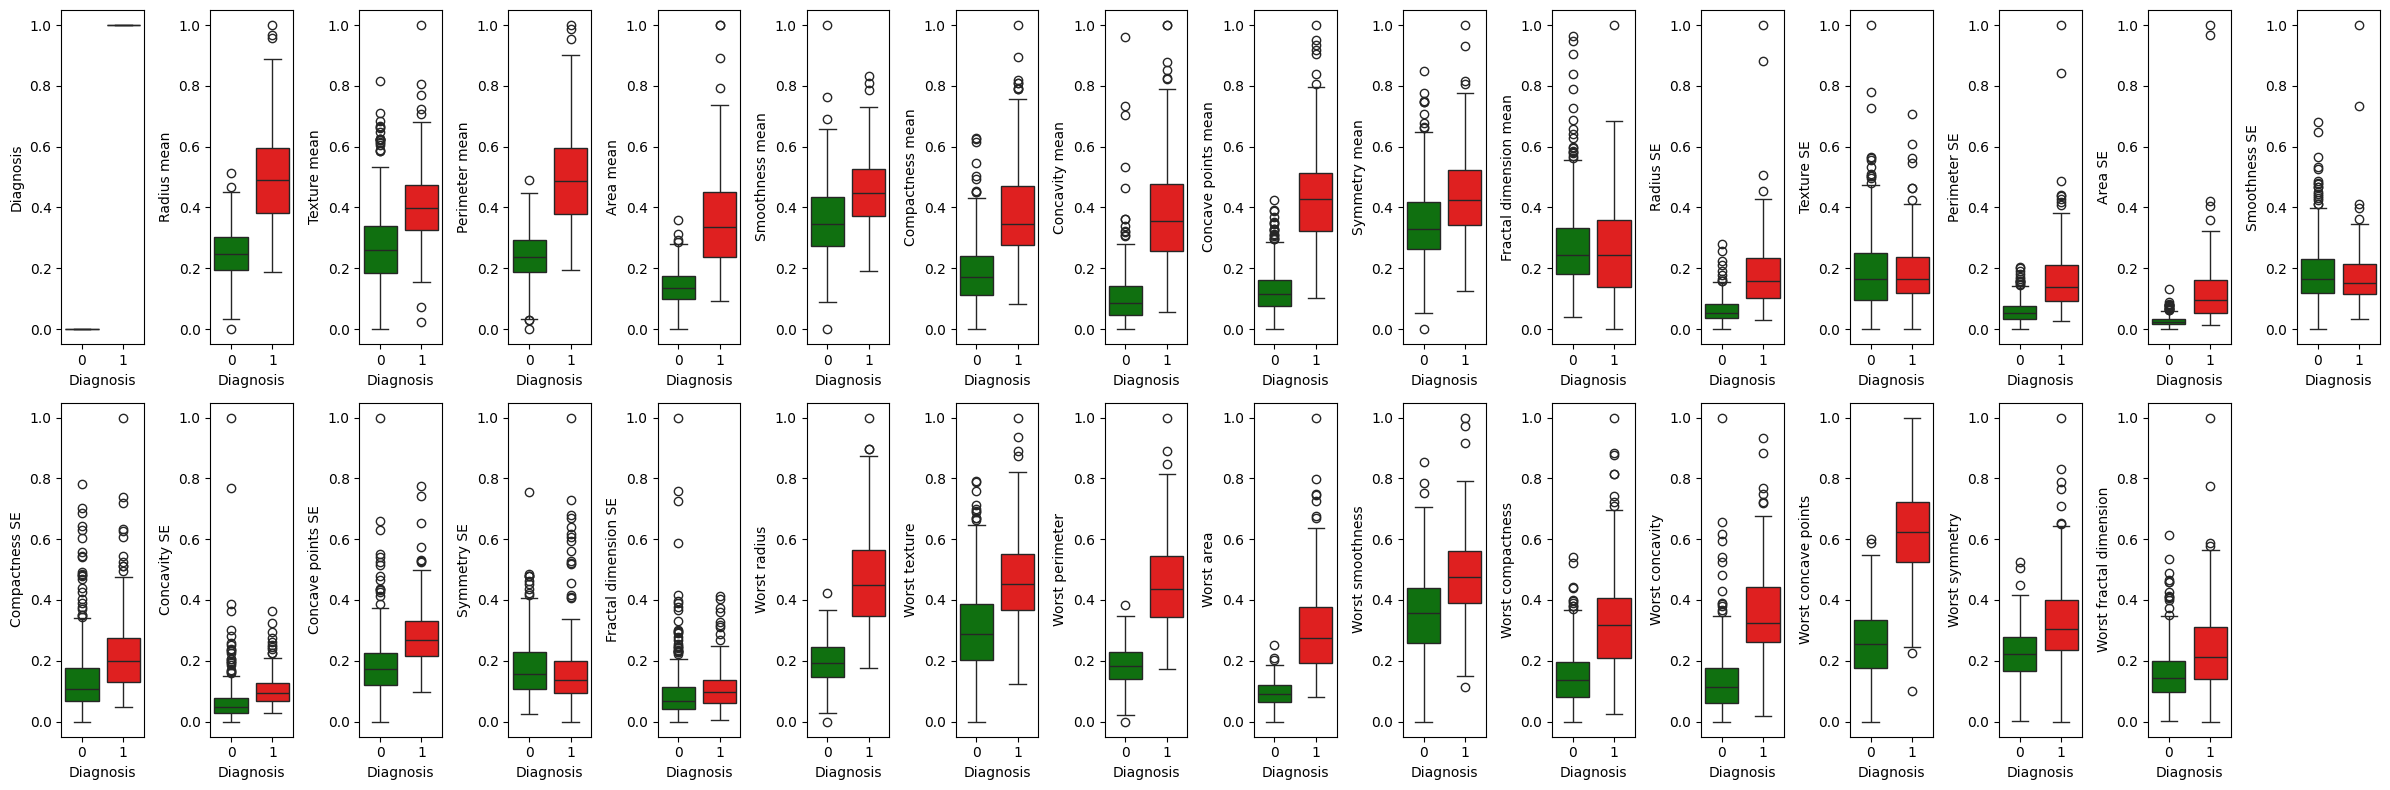

In [31]:
# Plot Settings
plt.figure(figsize=(24, 8))

# Loop through each column
for i, column in enumerate(data.columns, 1):
    # Create subplots
    plt.subplot(2, len(data.columns)//2 + 1, i)
    
    # Plot boxplot with hue set to 'Diagnosis'
    sns.boxplot(x='Diagnosis', y=column, data=data, palette={0: 'green', 1: 'red'}, hue='Diagnosis')
    
    # Remove the legend
    plt.legend([],[], frameon=False)
    
    # Set title and y-label
    #plt.title(f'{column}')
    plt.ylabel(column)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Feature Selection

### Features to Drop Based on EDA

In [32]:
# List of features to be removed
features_to_remove = [
    'Perimeter mean', 'Radius mean', 'Concavity mean', 'Concave points mean',
    'Perimeter SE', 'Radius SE', 'Compactness SE', 'Concavity SE', 'Concave points SE', 'Fractal dimension SE',
    'Worst perimeter', 'Worst radius', 'Worst concavity', 'Worst concave points'
]

# Remove the features from the dataset
data_cleaned = data.drop(columns=features_to_remove)

# Verifying the dataset after removal
print("Remaining Features:")
print("\n".join(data_cleaned.columns))

Remaining Features:
Diagnosis
Texture mean
Area mean
Smoothness mean
Compactness mean
Symmetry mean
Fractal dimension mean
Texture SE
Area SE
Smoothness SE
Symmetry SE
Worst texture
Worst area
Worst smoothness
Worst compactness
Worst symmetry
Worst fractal dimension


### Data Split and Feature Correlation

In [33]:
# Split Features and Target Variable
X = data_cleaned.drop(columns=['Diagnosis'])  # Features
y = data_cleaned['Diagnosis']  # Target variable

# Split Data: Train 70% , Test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate Feature Correlation
correlation_matrix = data.corr()

### Random Forest Classification with Low Correlated Features


Feature Importance:
Worst area                 0.274773
Area SE                    0.164731
Area mean                  0.156067
Worst compactness          0.079893
Compactness mean           0.066803
Worst texture              0.048528
Worst symmetry             0.042434
Worst smoothness           0.035286
Texture mean               0.032893
Smoothness mean            0.022010
Worst fractal dimension    0.018541
Fractal dimension mean     0.018146
Smoothness SE              0.010807
Symmetry SE                0.010405
Texture SE                 0.009670
Symmetry mean              0.009013
dtype: float64


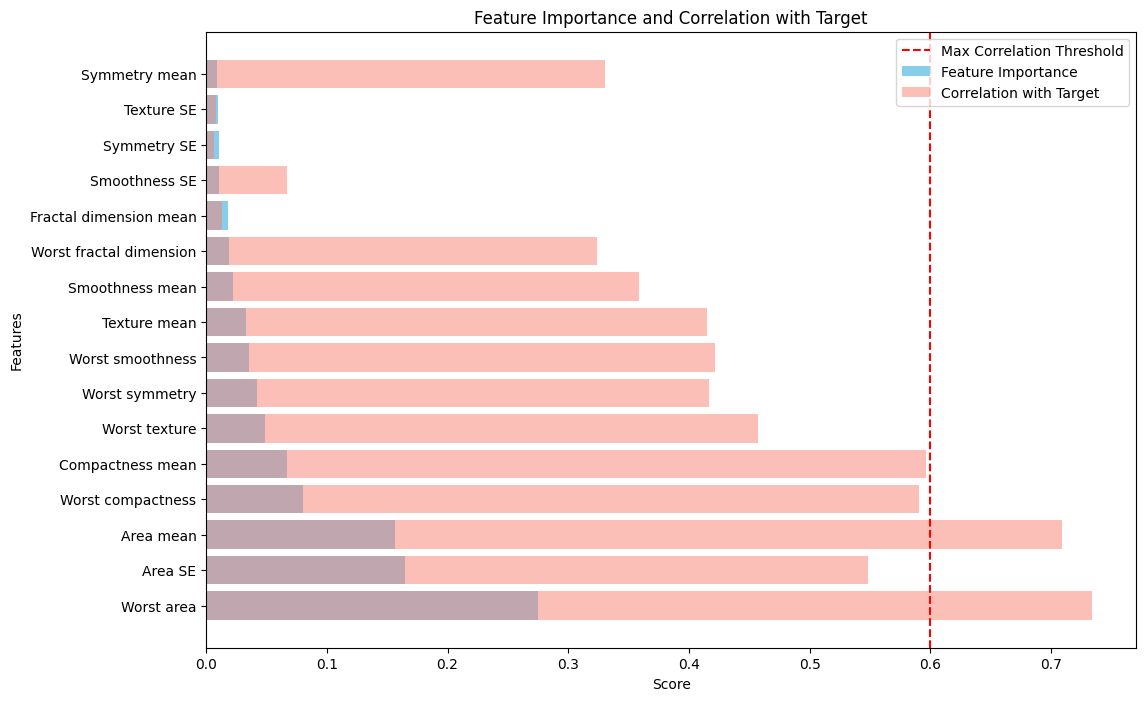

Selected features:
Area SE
Worst compactness
Compactness mean
Worst texture
Worst symmetry
Worst smoothness
Texture mean
Smoothness mean
Worst fractal dimension
Fractal dimension mean

Final model accuracy: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       108
           1       0.91      0.95      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



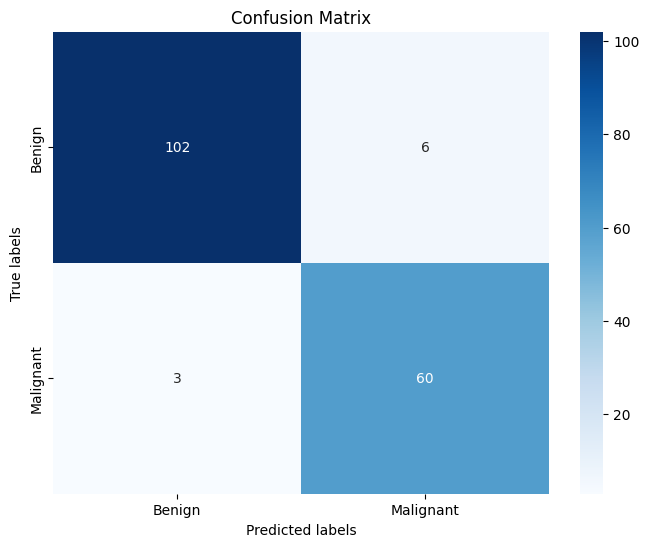

In [34]:
# Model Defenition: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Model
rf_classifier.fit(X_train, y_train)

# Evaluate Feature Importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Print Feature Importance
print(f'\nFeature Importance:\n{feature_importance}')

# Get the sorted feature names
sorted_feature_names = feature_importance.index

# Get correlation of features with the target variable
feature_correlation_with_target = correlation_matrix['Diagnosis'].drop('Diagnosis')

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot feature importance
ax.barh(sorted_feature_names, feature_importance, color='skyblue', label='Feature Importance')

# Plot correlation with target
ax.barh(sorted_feature_names, abs(feature_correlation_with_target[sorted_feature_names]), color='salmon', alpha=0.5, label='Correlation with Target')

# Add a vertical line for maximum correlation threshold
max_corr = 0.6
ax.axvline(x=max_corr, color='red', linestyle='--', label='Max Correlation Threshold')

# Set labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Features')
ax.set_title('Feature Importance and Correlation with Target')
ax.legend()

# Show plot
plt.show()

# Select features with importance above lower quartile
selected_features_by_importance = feature_importance[feature_importance > feature_importance.quantile(0.25)].index

# Select features with low correlation with the target variable
lowest_correlated_features = feature_correlation_with_target[abs(feature_correlation_with_target) < max_corr].index

# Select features that are both in the importance list and in the low correlation list
selected_features_low_corr = selected_features_by_importance.intersection(lowest_correlated_features)

# Print selected features
print("Selected features:")
print("\n".join(selected_features_low_corr))

# Final Model with Selected Features: split data, create model and train 
final_X_train = X_train[selected_features_low_corr]
final_X_test = X_test[selected_features_low_corr]
final_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_classifier.fit(final_X_train, y_train)

# Model Predictions
y_pred = final_rf_classifier.predict(final_X_test)

# Evaluate the Final model
final_accuracy_low_corr = final_rf_classifier.score(final_X_test, y_test)
print("\nFinal model accuracy:", final_accuracy_low_corr)

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classification using Univariate Feature Selection

Features Selected:
Texture mean
Area mean
Smoothness mean
Compactness mean
Symmetry mean
Fractal dimension mean
Area SE
Smoothness SE
Symmetry SE
Worst texture
Worst area
Worst smoothness
Worst compactness
Worst symmetry
Worst fractal dimension

Final model accuracy: 0.9766081871345029

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



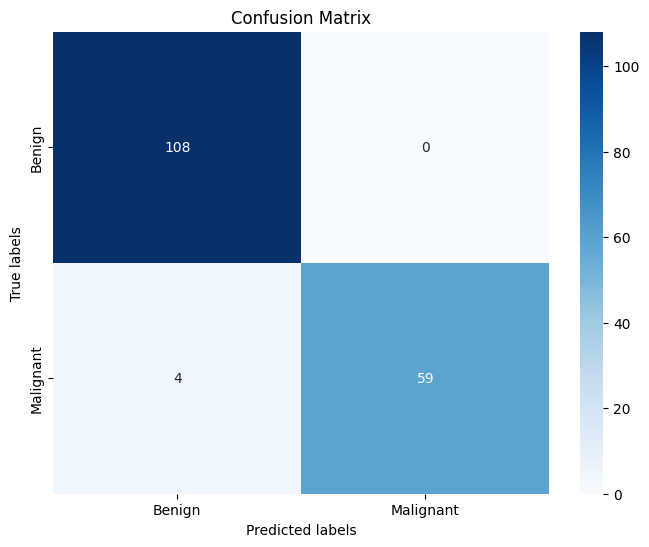

In [35]:
# Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features_uni = X_train.columns[selector.get_support()]

# Features Selected
print("Features Selected:")
print("\n".join(selected_features_uni))

# Model Definition: Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Model
rf_classifier.fit(X_train_selected, y_train)

# Model Predictions
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the Final model
final_accuracy_uni = rf_classifier.score(X_test_selected, y_test)
print("\nFinal model accuracy:", final_accuracy_uni)

# Classification Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classification using Recursive Feature Elimination (RFE)

Optimal number of features : 11

Selected features:
Texture mean
Area mean
Smoothness mean
Compactness mean
Area SE
Worst texture
Worst area
Worst smoothness
Worst compactness
Worst symmetry
Worst fractal dimension

Final model accuracy: 0.9707602339181286

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



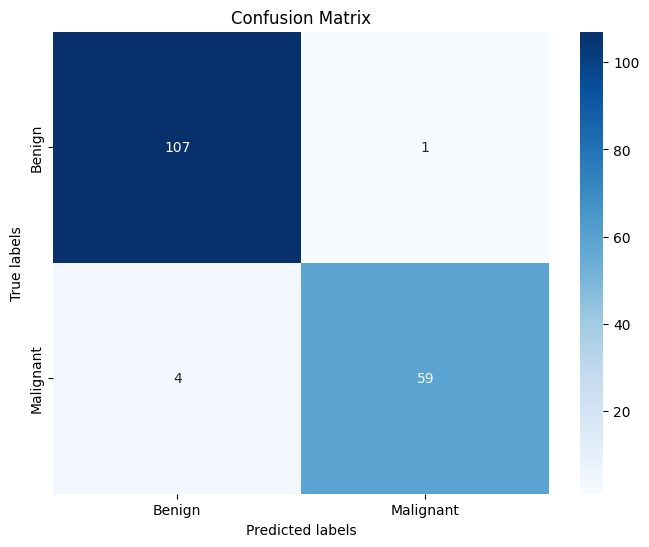

In [36]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE object
rfe = RFECV(estimator=rf_classifier, min_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

print("Optimal number of features : %d" % rfe.n_features_)

# Selected features
selected_features_RFE = X_train.columns[rfe.support_]
print("\nSelected features:")
print("\n".join(selected_features_RFE))

# Train final model with selected features
final_X_train = X_train[selected_features_RFE]
final_X_test = X_test[selected_features_RFE]

final_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_classifier.fit(final_X_train, y_train)

# Evaluate the final model
final_accuracy_RFE = final_rf_classifier.score(final_X_test, y_test)
print("\nFinal model accuracy:", final_accuracy_RFE)

# Make predictions
y_pred = final_rf_classifier.predict(final_X_test)

# Evaluate the final model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest Classification with Recursive Feature Elimination and Cross-Validation (RFECV)

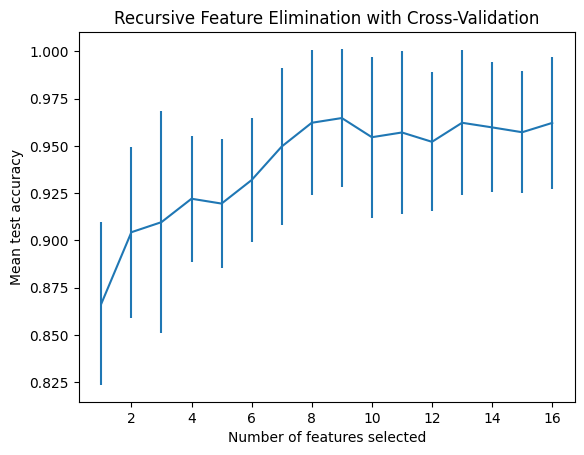


Optimal number of features : 9

Best features :
Texture mean
Area mean
Compactness mean
Area SE
Worst texture
Worst area
Worst smoothness
Worst compactness
Worst symmetry

Final model accuracy: 0.9707602339181286

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



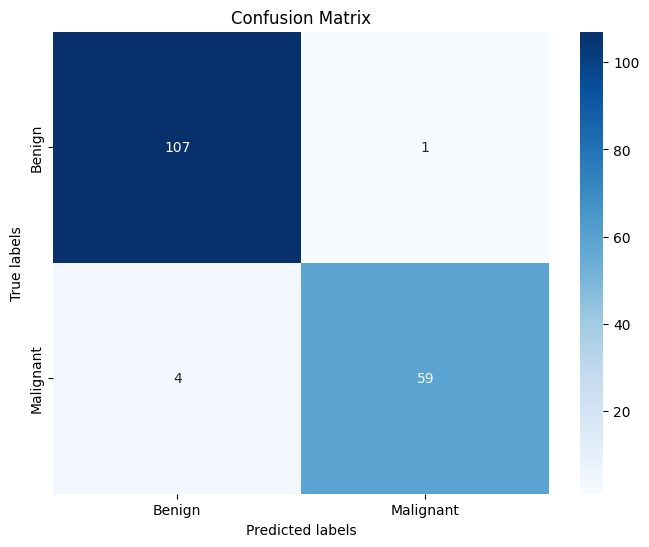

In [37]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the RFE-CV (Recursive Feature Elimination with Cross-Validation) object
rfecv = RFECV(estimator=rf_classifier, step=1, cv=10, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Plot number of features VS. cross-validation scores
n_scores = len(rfecv.cv_results_["mean_test_score"])
min_features_to_select = rfecv.min_features_to_select

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.show()

# Print the optimal number of features selected by RFE-CV
print('\nOptimal number of features :', rfecv.n_features_)

# Save selected features
selected_features_RFECV = X_train.columns[rfecv.support_]

# Print the best features selected by RFE-CV
print('\nBest features :')
print("\n".join(selected_features_RFECV))

# Train final model with selected features
final_X_train = X_train[selected_features_RFECV]
final_X_test = X_test[selected_features_RFECV]

final_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
final_rf_classifier.fit(final_X_train, y_train)

# Evaluate the final model
final_accuracy_RFECV = final_rf_classifier.score(final_X_test, y_test)
print("\nFinal model accuracy:", final_accuracy_RFECV)

# Make predictions
y_pred = final_rf_classifier.predict(final_X_test)

# Evaluate the final model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Feature Extraction with Principal Component Analysis (PCA)

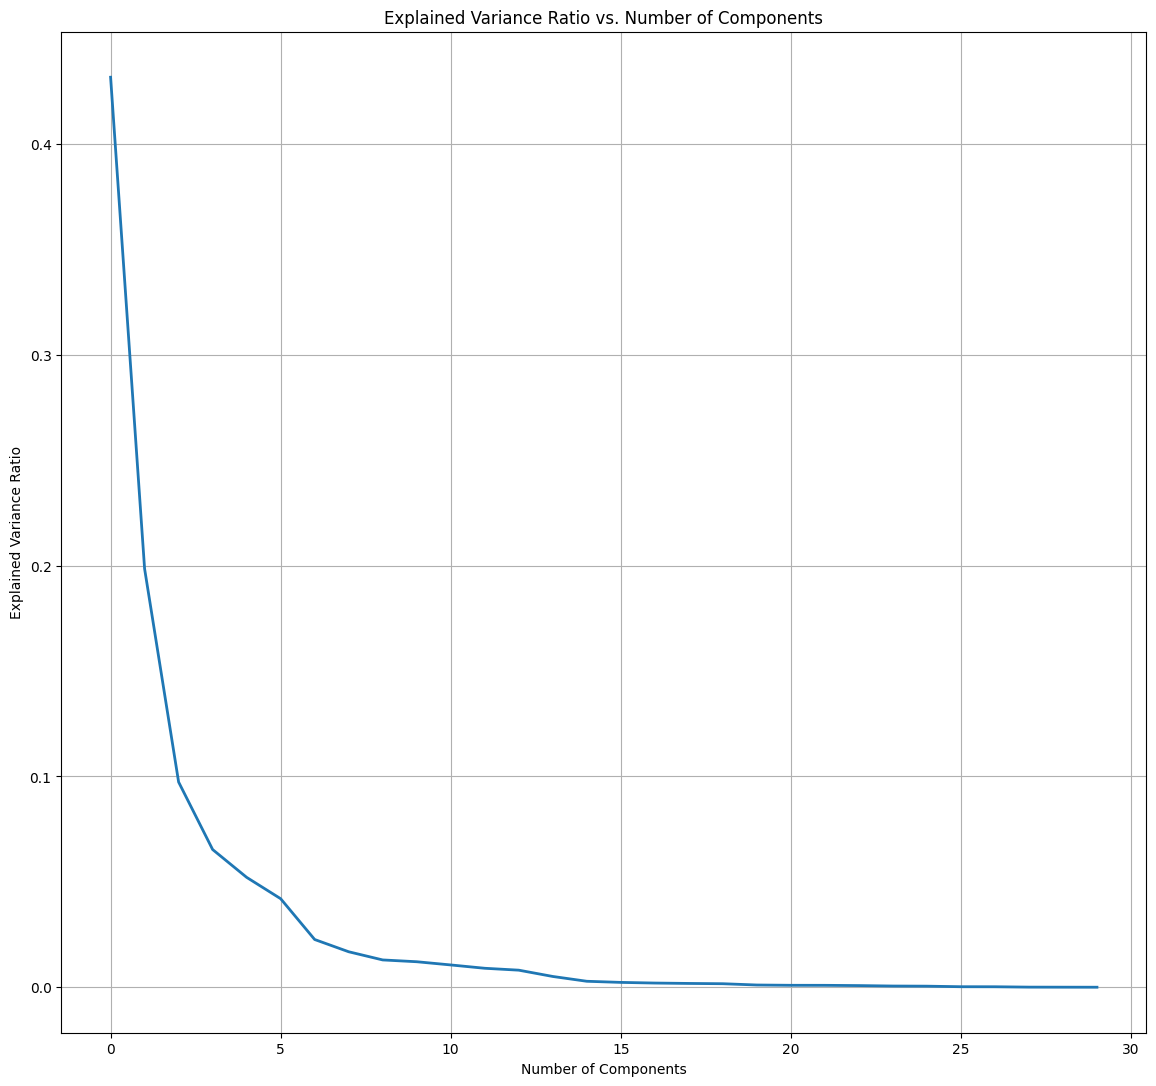

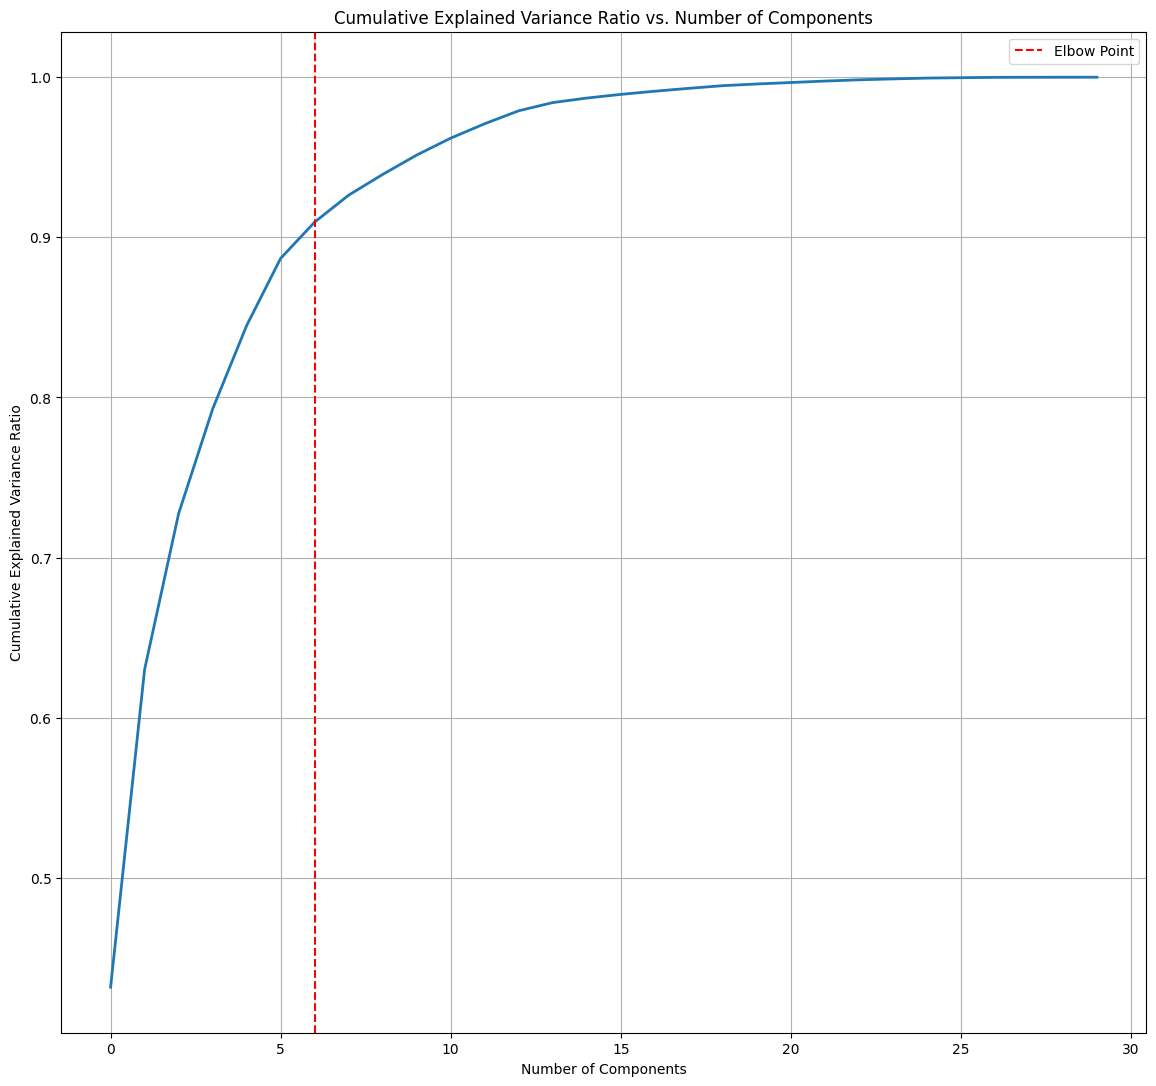


Final model accuracy: 0.9649122807017544

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



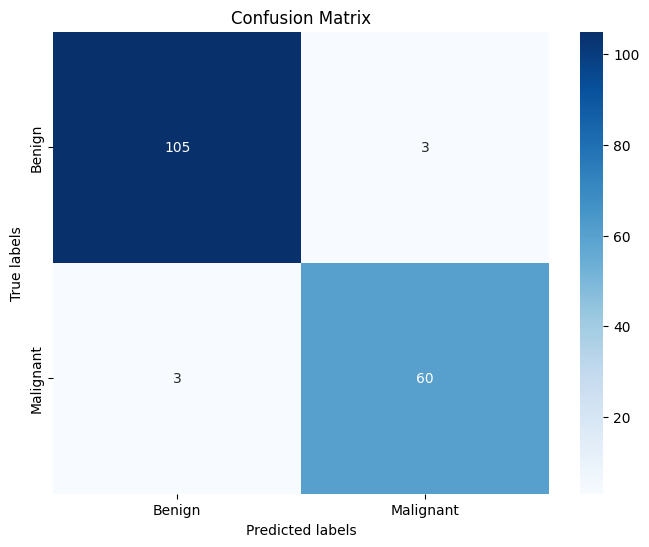

In [38]:
from scipy.spatial import distance

# Split Features and Target Variable
X2 = data.drop(columns=['Diagnosis'])  # Features
y2 = data['Diagnosis']  # Target variable

# Split Data: Train 70% , Test 30%
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Calculate Feature Correlation
correlation_matrix = data.corr()

# Normalization
scaler = StandardScaler()
X_train_N = scaler.fit_transform(X_train)
X_test_N = scaler.transform(X_test)

# Perform PCA
pca = PCA()
pca.fit(X_train_N)

# Plot explained variance ratio
plt.figure(figsize=(14, 13))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Calculate cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Calculate the Euclidean distances of each point from the line connecting the first and last points
first_point = [0, cumulative_var_ratio[0]]
last_point = [len(cumulative_var_ratio) - 1, cumulative_var_ratio[-1]]
line_vector = np.array(last_point) - np.array(first_point)
distances = []
for i in range(len(cumulative_var_ratio)):
    current_point = [i, cumulative_var_ratio[i]]
    distance_to_line = distance.euclidean(current_point, first_point + (np.dot((np.array(current_point) - np.array(first_point)), line_vector) / np.dot(line_vector, line_vector)) * line_vector)
    distances.append(distance_to_line)

# Find the elbow point
elbow_point = np.argmax(distances)
plt.figure(figsize=(14, 13))
plt.plot(cumulative_var_ratio, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.axvline(x=elbow_point, color='r', linestyle='--', label='Elbow Point')
plt.legend()
plt.show()

# Determine the number of components based on the elbow point
num_components = elbow_point

# Re-fit PCA with the determined number of components
pca_final = PCA(n_components=num_components)
X_train_pca = pca_final.fit_transform(X_train_N)
X_test_pca = pca_final.transform(X_test_N)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_pca, y_train)

# Evaluate the final model
final_accuracy_PCA = rf_classifier.score(X_test_pca, y_test)
print("\nFinal model accuracy:", final_accuracy_PCA)

# Make predictions
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the final model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## ML

#### Selected Features

In [39]:
from tabulate import tabulate

# Create a dictionary with the accuracy information for each method
accuracy_data = {
    "Low Correlated Features": final_accuracy_low_corr,
    "Univariate Feature Selection": final_accuracy_uni,
    "Recursive Feature Elimination (RFE)": final_accuracy_RFE,
    "Recursive Feature Elimination with \nCross Validation (RFECV)": final_accuracy_RFECV,
    "PCA": final_accuracy_PCA
}

# Create a dictionary with the selected features for each method
feature_data = {
    "Low Correlated Features": selected_features_low_corr,
    "Univariate Feature Selection": selected_features_uni,
    "Recursive Feature Elimination (RFE)": selected_features_RFE,
    "Recursive Feature Elimination with \nCross Validation (RFECV)": selected_features_RFECV,
    "PCA": ""
}

# Create a set with all selected features
all_selected_features = set()
for features in feature_data.values():
    all_selected_features.update(features)

# Create a list of dictionaries to store the table data
table_data = []

# Add rows for each feature
for feature in all_selected_features:
    row = {"Features": feature}
    for method, features in feature_data.items():
        if feature in features:
            row[method] = "x"
        else:
            row[method] = ""
    table_data.append(row)

# Add a separator row
separator_row = {method: "-" * min(len("Recursive Feature Elimination (RFE)"), len(method)) for method in accuracy_data.keys()}
separator_row["Features"] = "---" * len("Features")
table_data.append(separator_row)

# Add the row for the final accuracy of each method
final_accuracy_row = {"Features": "Final Accuracy"}
for method, accuracy in accuracy_data.items():
    final_accuracy_row[method] = accuracy
table_data.append(final_accuracy_row)

# Display the table
print(tabulate(table_data, headers="keys", tablefmt="pretty"))

+--------------------------+-------------------------+------------------------------+-------------------------------------+-------------------------------------+--------------------+
|         Features         | Low Correlated Features | Univariate Feature Selection | Recursive Feature Elimination (RFE) | Recursive Feature Elimination with  |        PCA         |
|                          |                         |                              |                                     |      Cross Validation (RFECV)       |                    |
+--------------------------+-------------------------+------------------------------+-------------------------------------+-------------------------------------+--------------------+
|     Worst smoothness     |            x            |              x               |                  x                  |                  x                  |                    |
|     Smoothness mean      |            x            |              x               |

In [40]:
# Univariate Feature Selection was the most accurate method, and these were the features selected
#final_data = data[selected_features_uni]


# Split Features and Target Variable
final_data = data.drop(columns=['Diagnosis'])  # Features

# Correlation Matrix Calculation
corr_matrix = final_data.corr().abs() 

# Upper Triangular Mask Creation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
up_corr_matrix = corr_matrix.mask(mask)

# Identifying Highly Correlated Features
threshold = 0.65  # Define the correlation threshold
to_drop = [column for column in up_corr_matrix.columns if any(up_corr_matrix[column] > threshold)]

# Dropping Highly Correlated Features
final_data = final_data.drop(to_drop, axis=1)

# Printing Result
print(f"The reduced dataframe has {final_data.shape[1]} columns.")


The reduced dataframe has 10 columns.


In [41]:
# Split Features and Target Variable
X = final_data
y = data['Diagnosis']  # Target variable

# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Data: Train 80% , Test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Size of Train and Test Data
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

# Contar o número de amostras em cada classe
class_counts_train = y_train.value_counts()
class_counts_test = y_test.value_counts()

# Exibir a contagem de cada classe
print("\nClass Counts Train:")
print(class_counts_train)
print("\nClass Counts Test:")
print(class_counts_test)

Shape of training set: (455, 10)
Shape of test set: (114, 10)

Class Counts Train:
Diagnosis
0    286
1    169
Name: count, dtype: int64

Class Counts Test:
Diagnosis
0    71
1    43
Name: count, dtype: int64


In [42]:
# Initialize a dictionary to store the metrics
metrics_dict = {}

#### Random Forest

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9384615384615385
Test Accuracy: 0.9122807017543859

Confusion Matrix:
[[67  4]
 [ 6 37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        71
           1       0.90      0.86      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114


F1-score: 0.8809523809523809

AUC: 0.964461185718965


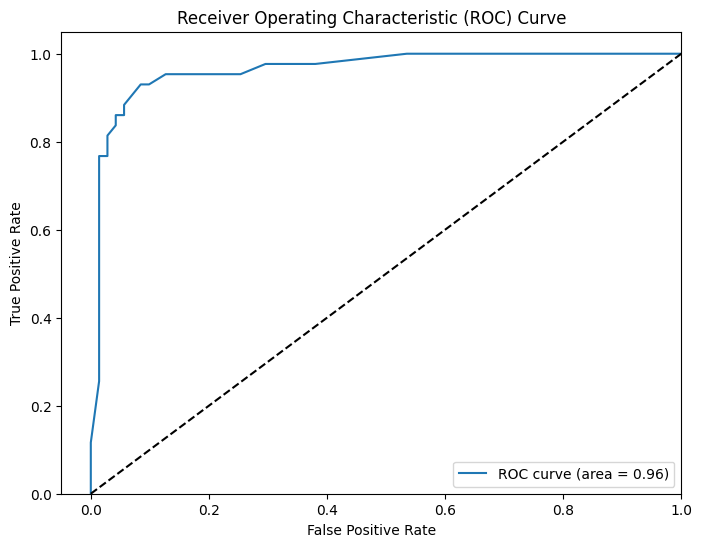

In [43]:
# Initialize placeholders for metrics
best_params_rf = "-"
best_score_rf = "-"
test_accuracy_rf = "-"
conf_matrix_rf = "-"
class_report_rf = "-"
f1_rf = "-"
auc_rf = "-"
fpr_rf = "-"
tpr_rf = "-"
thresholds_rf = "-"

# Define the hyperparameters to tune
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum number of samples required at each leaf node
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters found
best_params_rf = grid_search_rf.best_params_
print("Best Parameters:", best_params_rf)

# Best score
best_score_rf = grid_search_rf.best_score_
print("Best Score:", best_score_rf)

# Model with the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the model on the test data
test_accuracy_rf = best_rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_rf)

# Predictions
y_pred_rf = best_rf_model.predict(X_test)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:")
print(class_report_rf)

# F1-score
f1_rf = f1_score(y_test, y_pred_rf)
print("\nF1-score:", f1_rf)

# Calculate the probabilities of the positive class
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]

# AUC score
auc_rf = roc_auc_score(y_test, y_prob_rf)
print("\nAUC:", auc_rf)

# ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='ROC curve (area = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Random Forest'] = {
    'Best Parameters': best_params_rf,
    'Best Score': best_score_rf,
    'Test Accuracy': test_accuracy_rf,
    'Confusion Matrix': conf_matrix_rf.tolist(),
    'Classification Report': class_report_rf,
    'F1-score': f1_rf,
    'AUC': auc_rf,
    'ROC Curve': {
        'False Positive Rate': fpr_rf.tolist(),
        'True Positive Rate': tpr_rf.tolist(),
        'Thresholds': thresholds_rf.tolist()
    }
}


#### Logistic Regression

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9384615384615385
Test Accuracy: 0.9298245614035088

Confusion Matrix:
[[68  3]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


F1-score: 0.9047619047619048

AUC: 0.9878807730101539


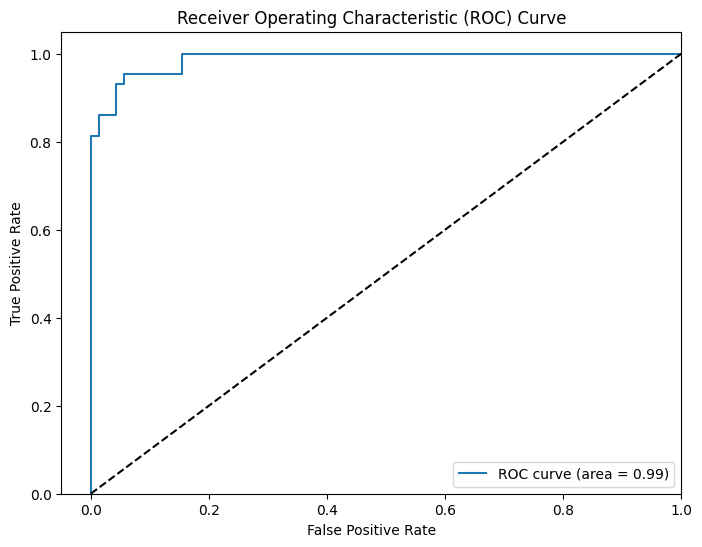

In [44]:
# Initialize placeholders for metrics
best_params_lr = "-"
best_score_lr = "-"
test_accuracy_lr = "-"
conf_matrix_lr = "-"
class_report_lr = "-"
f1_lr = "-"
auc_lr = "-"
fpr_lr = "-"
tpr_lr = "-"
thresholds_lr = "-"

# Define the hyperparameters to tune
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Type of penalty (L1 or L2)
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Create a logistic regression model
logistic_regression = LogisticRegression(random_state=42)

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(estimator=logistic_regression, param_grid=param_grid_lr, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_lr.fit(X_train, y_train)

# Best hyperparameters found
best_params_lr = grid_search_lr.best_params_
print("Best Parameters:", best_params_lr)

# Best score
best_score_lr = grid_search_lr.best_score_
print("Best Score:", best_score_lr)

# Model with the best hyperparameters
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the model on the test data
test_accuracy_lr = best_lr_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_lr)

# Predictions
y_pred_lr = best_lr_model.predict(X_test)

# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(conf_matrix_lr)

# Classification report
class_report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report:")
print(class_report_lr)

# F1-score
f1_lr = f1_score(y_test, y_pred_lr)
print("\nF1-score:", f1_lr)

# Calculate the probabilities of the positive class
y_prob_lr = best_lr_model.predict_proba(X_test)[:, 1]

# AUC score
auc_lr = roc_auc_score(y_test, y_prob_lr)
print("\nAUC:", auc_lr)

# ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Logistic Regression'] = {
    'Best Parameters': best_params_lr,
    'Best Score': best_score_lr,
    'Test Accuracy': test_accuracy_lr,
    'Confusion Matrix': conf_matrix_lr.tolist(),
    'Classification Report': class_report_lr,
    'F1-score': f1_lr,
    'AUC': auc_lr,
    'ROC Curve': {
        'False Positive Rate': fpr_lr.tolist(),
        'True Positive Rate': tpr_lr.tolist(),
        'Thresholds': thresholds_lr.tolist()
    }
}

#### K Neighbors Classifier (KNN)

  File "c:\ProgramData\anaconda3\envs\ds\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ProgramData\anaconda3\envs\ds\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ProgramData\anaconda3\envs\ds\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\envs\ds\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score: 0.90989010989011
Test Accuracy: 0.9122807017543859

Confusion Matrix:
[[68  3]
 [ 7 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


F1-score: 0.8780487804878049

AUC: 0.9482476252866033


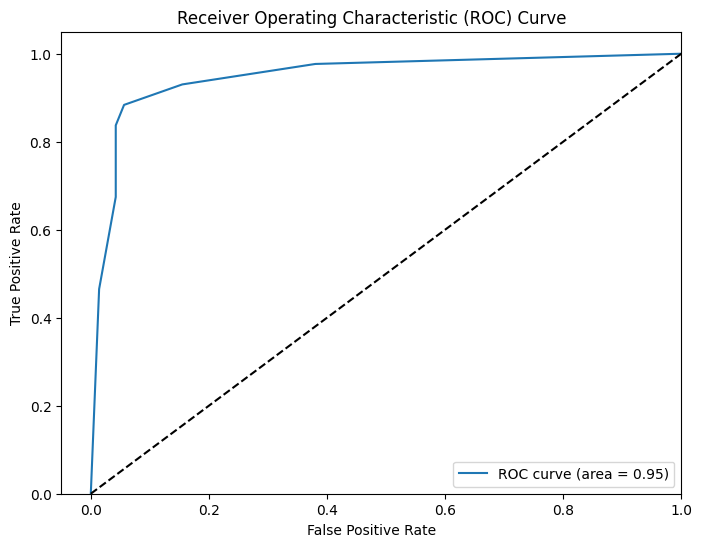

In [45]:
# Initialize placeholders for metrics
best_params_knn = "-"
best_score_knn = "-"
test_accuracy_knn = "-"
conf_matrix_knn = "-"
class_report_knn = "-"
f1_knn = "-"
auc_knn = "-"
fpr_knn = "-"
tpr_knn = "-"
thresholds_knn = "-"

# Define the hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm used to compute the nearest neighbors
}

# Create a KNN model
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_knn.fit(X_train, y_train)

# Best hyperparameters found
best_params_knn = grid_search_knn.best_params_
print("Best Parameters:", best_params_knn)

# Best score
best_score_knn = grid_search_knn.best_score_
print("Best Score:", best_score_knn)

# Model with the best hyperparameters
best_knn_model = grid_search_knn.best_estimator_

# Evaluate the model on the test data
test_accuracy_knn = best_knn_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_knn)

# Predictions
y_pred_knn = best_knn_model.predict(X_test)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(conf_matrix_knn)

# Classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("\nClassification Report:")
print(class_report_knn)

# F1-score
f1_knn = f1_score(y_test, y_pred_knn)
print("\nF1-score:", f1_knn)

# Calculate the probabilities of the positive class
y_prob_knn = best_knn_model.predict_proba(X_test)[:, 1]

# AUC score
auc_knn = roc_auc_score(y_test, y_prob_knn)
print("\nAUC:", auc_knn)

# ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label='ROC curve (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['KNN'] = {
    'Best Parameters': best_params_knn,
    'Best Score': best_score_knn,
    'Test Accuracy': test_accuracy_knn,
    'Confusion Matrix': conf_matrix_knn.tolist(),
    'Classification Report': class_report_knn,
    'F1-score': f1_knn,
    'AUC': auc_knn,
    'ROC Curve': {
        'False Positive Rate': fpr_knn.tolist(),
        'True Positive Rate': tpr_knn.tolist(),
        'Thresholds': thresholds_knn.tolist()
    }
}

#### Support Vector Classifier (SVC)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.9494505494505494
Test Accuracy: 0.9385964912280702

Confusion Matrix:
[[68  3]
 [ 4 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


F1-score: 0.9176470588235294

AUC: 0.9868981329839501


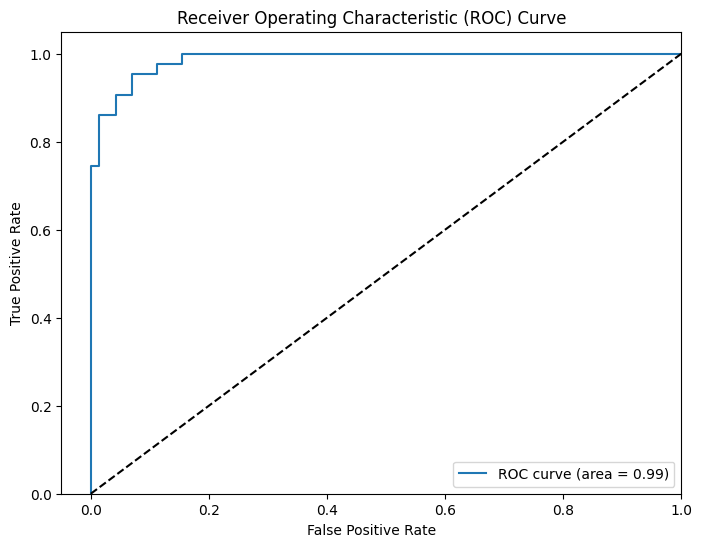

In [46]:
# Initialize placeholders for metrics
best_params_svc = "-"
best_score_svc = "-"
test_accuracy_svc = "-"
conf_matrix_svc = "-"
class_report_svc = "-"
f1_svc = "-"
auc_svc = "-"
fpr_svc = "-"
tpr_svc = "-"
thresholds_svc = "-"

# Create the SVC model
svc = SVC()

# Define the hyperparameters to tune
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Kernel type
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_svc.fit(X_train, y_train)

# Best hyperparameters found
best_params_svc = grid_search_svc.best_params_
print("Best Parameters:", best_params_svc)

# Best score
best_score_svc = grid_search_svc.best_score_
print("Best Score:", best_score_svc)

# Model with the best hyperparameters
best_svc_model = grid_search_svc.best_estimator_

# Evaluate the model on the test data
test_accuracy_svc = best_svc_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_svc)

# Predictions
y_pred_svc = best_svc_model.predict(X_test)

# Confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("\nConfusion Matrix:")
print(conf_matrix_svc)

# Classification report
class_report_svc = classification_report(y_test, y_pred_svc)
print("\nClassification Report:")
print(class_report_svc)

# F1-score
f1_svc = f1_score(y_test, y_pred_svc)
print("\nF1-score:", f1_svc)

# Calculate the probabilities of the positive class
y_prob_svc = best_svc_model.decision_function(X_test)

# AUC score
auc_svc = roc_auc_score(y_test, y_prob_svc)
print("\nAUC:", auc_svc)

# ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_prob_svc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, label='ROC curve (area = %0.2f)' % auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['SVC'] = {
    'Best Parameters': best_params_svc,
    'Best Score': best_score_svc,
    'Test Accuracy': test_accuracy_svc,
    'Confusion Matrix': conf_matrix_svc.tolist(),
    'Classification Report': class_report_svc,
    'F1-score': f1_svc,
    'AUC': auc_svc,
    'ROC Curve': {
        'False Positive Rate': fpr_svc.tolist(),
        'True Positive Rate': tpr_svc.tolist(),
        'Thresholds': thresholds_svc.tolist()
    }
}

#### SGD Classifier

Best Parameters: {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 2000, 'penalty': 'l2', 'tol': 0.001}
Best Score: 0.9494505494505494
Test Accuracy: 0.9035087719298246

Confusion Matrix:
[[68  3]
 [ 8 35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93        71
           1       0.92      0.81      0.86        43

    accuracy                           0.90       114
   macro avg       0.91      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114


F1-score: 0.8641975308641975

AUC: 0.9819849328529315


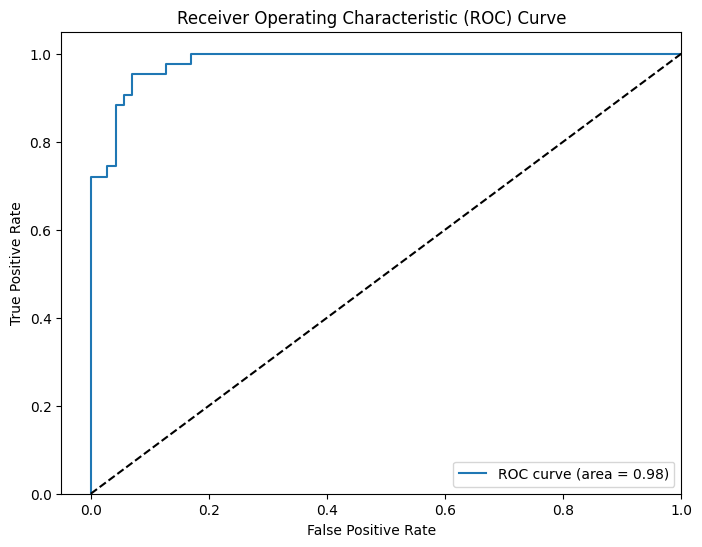

In [47]:
# Initialize placeholders for metrics
best_params_sgd = "-"
best_score_sgd = "-"
test_accuracy_sgd = "-"
conf_matrix_sgd = "-"
class_report_sgd = "-"
f1_sgd = "-"
auc_sgd = "-"
fpr_sgd = "-"
tpr_sgd = "-"
thresholds_sgd = "-"

# Create the SGD Classifier model
sgd_clf = SGDClassifier()

# Define the hyperparameters to tune
param_grid_sgd = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],  # Loss function
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization term
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  # Constant that multiplies the regularization term
    'max_iter': [1000, 2000, 3000],  # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5]  # Tolerance for stopping criteria
}

# Create a GridSearchCV object
grid_search_sgd = GridSearchCV(estimator=sgd_clf, param_grid=param_grid_sgd, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_sgd.fit(X_train, y_train)

# Best hyperparameters found
best_params_sgd = grid_search_sgd.best_params_
print("Best Parameters:", best_params_sgd)

# Best score
best_score_sgd = grid_search_sgd.best_score_
print("Best Score:", best_score_sgd)

# Model with the best hyperparameters
best_sgd_model = grid_search_sgd.best_estimator_

# Evaluate the model on the test data
test_accuracy_sgd = best_sgd_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_sgd)

# Predictions
y_pred_sgd = best_sgd_model.predict(X_test)

# Confusion matrix
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("\nConfusion Matrix:")
print(conf_matrix_sgd)

# Classification report
class_report_sgd = classification_report(y_test, y_pred_sgd)
print("\nClassification Report:")
print(class_report_sgd)

# F1-score
f1_sgd = f1_score(y_test, y_pred_sgd)
print("\nF1-score:", f1_sgd)

# Calculate the probabilities of the positive class
y_prob_sgd = best_sgd_model.decision_function(X_test)

# AUC score
auc_sgd = roc_auc_score(y_test, y_prob_sgd)
print("\nAUC:", auc_sgd)

# ROC curve
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test, y_prob_sgd)
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, label='ROC curve (area = %0.2f)' % auc_sgd)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['SGD Classifier'] = {
    'Best Parameters': best_params_sgd,
    'Best Score': best_score_sgd,
    'Test Accuracy': test_accuracy_sgd,
    'Confusion Matrix': conf_matrix_sgd.tolist(),
    'Classification Report': class_report_sgd,
    'F1-score': f1_sgd,
    'AUC': auc_sgd,
    'ROC Curve': {
        'False Positive Rate': fpr_sgd.tolist(),
        'True Positive Rate': tpr_sgd.tolist(),
        'Thresholds': thresholds_sgd.tolist()
    }
}

#### Decision Tree Classifier

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.9164835164835166
Test Accuracy: 0.8947368421052632

Confusion Matrix:
[[63  8]
 [ 4 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.83      0.91      0.87        43

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114


F1-score: 0.8666666666666667

AUC: 0.9503766786767115


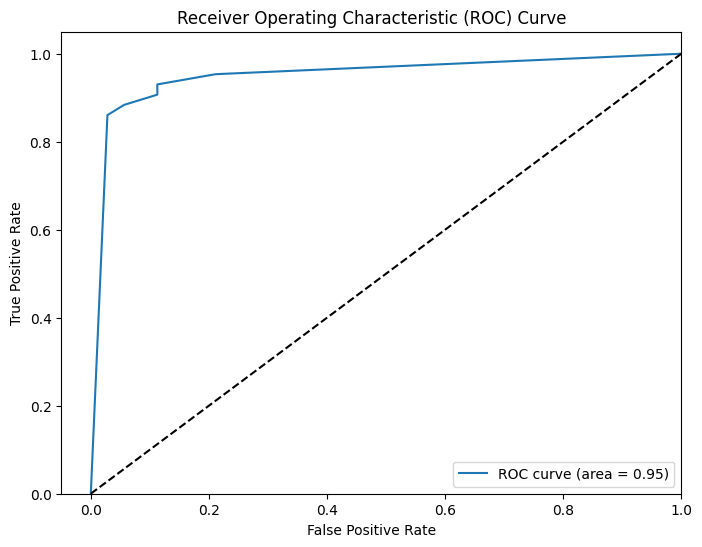

In [48]:
# Initialize placeholders for metrics
best_params_dt = "-"
best_score_dt = "-"
test_accuracy_dt = "-"
conf_matrix_dt = "-"
class_report_dt = "-"
f1_dt = "-"
auc_dt = "-"
fpr_dt = "-"
tpr_dt = "-"
thresholds_dt = "-"

# Create the Decision Tree Classifier model
dt_clf = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(estimator=dt_clf, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters found
best_params_dt = grid_search_dt.best_params_
print("Best Parameters:", best_params_dt)

# Best score
best_score_dt = grid_search_dt.best_score_
print("Best Score:", best_score_dt)

# Model with the best hyperparameters
best_dt_model = grid_search_dt.best_estimator_

# Evaluate the model on the test data
test_accuracy_dt = best_dt_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_dt)

# Predictions
y_pred_dt = best_dt_model.predict(X_test)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

# Classification report
class_report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report:")
print(class_report_dt)

# F1-score
f1_dt = f1_score(y_test, y_pred_dt)
print("\nF1-score:", f1_dt)

# Calculate the probabilities of the positive class
y_prob_dt = best_dt_model.predict_proba(X_test)[:, 1]

# AUC score
auc_dt = roc_auc_score(y_test, y_prob_dt)
print("\nAUC:", auc_dt)

# ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='ROC curve (area = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Decision Tree'] = {
    'Best Parameters': best_params_dt,
    'Best Score': best_score_dt,
    'Test Accuracy': test_accuracy_dt,
    'Confusion Matrix': conf_matrix_dt.tolist(),
    'Classification Report': class_report_dt,
    'F1-score': f1_dt,
    'AUC': auc_dt,
    'ROC Curve': {
        'False Positive Rate': fpr_dt.tolist(),
        'True Positive Rate': tpr_dt.tolist(),
        'Thresholds': thresholds_dt.tolist()
    }
}

#### Voting Classifier

Best Parameters: {'knn__n_neighbors': 5, 'lr__C': 1, 'lr__penalty': 'l2', 'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
Best Score: 0.9472527472527472
Test Accuracy: 0.9210526315789473

Confusion Matrix:
[[67  4]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114


F1-score: 0.8941176470588236

AUC: 0.9773992793973141


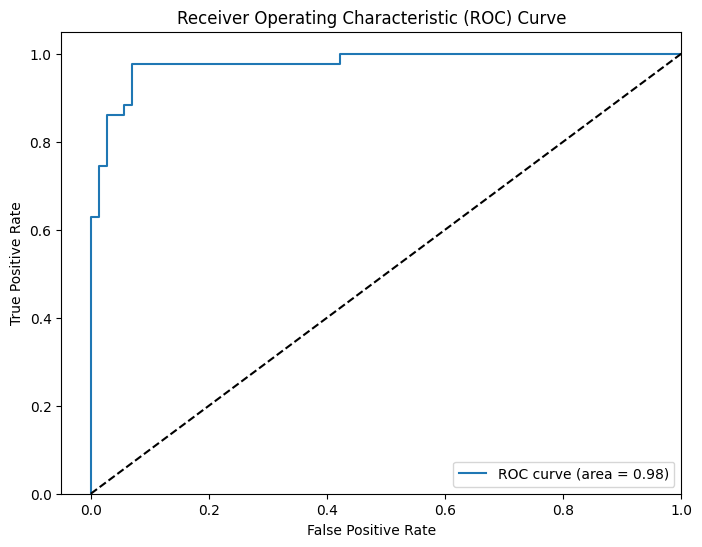

In [49]:
# Initialize placeholders for metrics
best_params_voting = "-"
best_score_voting = "-"
test_accuracy_voting = "-"
conf_matrix_voting = "-"
class_report_voting = "-"
f1_voting = "-"
auc_voting = "-"
fpr_voting = "-"
tpr_voting = "-"
thresholds_voting = "-"

# Define the base classifiers
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Create the Voting Classifier model
voting_clf = VotingClassifier(estimators=base_classifiers, voting='soft')

# Define the hyperparameters to tune
param_grid_voting = {
    'rf__n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20],            # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],        # Minimum number of samples required at each leaf node
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength for Logistic Regression
    'lr__penalty': ['l1', 'l2'],  # Type of penalty (L1 or L2) for Logistic Regression
    'knn__n_neighbors': [3, 5, 7]  # Number of neighbors for KNN
}

# Create a GridSearchCV object
grid_search_voting = GridSearchCV(estimator=voting_clf, param_grid=param_grid_voting, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_voting.fit(X_train, y_train)

# Best hyperparameters found
best_params_voting = grid_search_voting.best_params_
print("Best Parameters:", best_params_voting)

# Best score
best_score_voting = grid_search_voting.best_score_
print("Best Score:", best_score_voting)

# Model with the best hyperparameters
best_voting_model = grid_search_voting.best_estimator_

# Evaluate the model on the test data
test_accuracy_voting = best_voting_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_voting)

# Predictions
y_pred_voting = best_voting_model.predict(X_test)

# Confusion matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)
print("\nConfusion Matrix:")
print(conf_matrix_voting)

# Classification report
class_report_voting = classification_report(y_test, y_pred_voting)
print("\nClassification Report:")
print(class_report_voting)

# F1-score
f1_voting = f1_score(y_test, y_pred_voting)
print("\nF1-score:", f1_voting)

# Calculate the probabilities of the positive class
y_prob_voting = best_voting_model.predict_proba(X_test)[:, 1]

# AUC score
auc_voting = roc_auc_score(y_test, y_prob_voting)
print("\nAUC:", auc_voting)

# ROC curve
fpr_voting, tpr_voting, thresholds_voting = roc_curve(y_test, y_prob_voting)
plt.figure(figsize=(8, 6))
plt.plot(fpr_voting, tpr_voting, label='ROC curve (area = %0.2f)' % auc_voting)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Voting Classifier'] = {
    'Best Parameters': best_params_voting,
    'Best Score': best_score_voting,
    'Test Accuracy': test_accuracy_voting,
    'Confusion Matrix': conf_matrix_voting.tolist(),
    'Classification Report': class_report_voting,
    'F1-score': f1_voting,
    'AUC': auc_voting,
    'ROC Curve': {
        'False Positive Rate': fpr_voting.tolist(),
        'True Positive Rate': tpr_voting.tolist(),
        'Thresholds': thresholds_voting.tolist()
    }
}

#### Ada Boost Classifier

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best Score: 0.9384615384615385
Test Accuracy: 0.9210526315789473

Confusion Matrix:
[[67  4]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114


F1-score: 0.8941176470588236

AUC: 0.9695381591876843


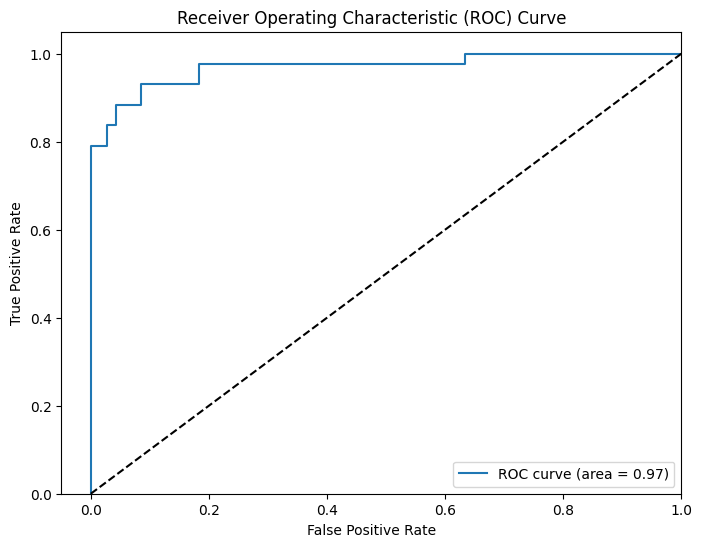

In [50]:
# Initialize placeholders for metrics
best_params_ada = "-"
best_score_ada = "-"
test_accuracy_ada = "-"
conf_matrix_ada = "-"
class_report_ada = "-"
f1_ada = "-"
auc_ada = "-"
fpr_ada = "-"
tpr_ada = "-"
thresholds_ada = "-"

# Create the Ada Boost Classifier model
ada_clf = AdaBoostClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners to train iteratively
    'learning_rate': [0.01, 0.1, 0.5, 1.0]  # Weighting applied to the weak learners
}

# Create a GridSearchCV object
grid_search_ada = GridSearchCV(estimator=ada_clf, param_grid=param_grid_ada, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_ada.fit(X_train, y_train)

# Best hyperparameters found
best_params_ada = grid_search_ada.best_params_
print("Best Parameters:", best_params_ada)

# Best score
best_score_ada = grid_search_ada.best_score_
print("Best Score:", best_score_ada)

# Model with the best hyperparameters
best_ada_model = grid_search_ada.best_estimator_

# Evaluate the model on the test data
test_accuracy_ada = best_ada_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_ada)

# Predictions
y_pred_ada = best_ada_model.predict(X_test)

# Confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
print("\nConfusion Matrix:")
print(conf_matrix_ada)

# Classification report
class_report_ada = classification_report(y_test, y_pred_ada)
print("\nClassification Report:")
print(class_report_ada)

# F1-score
f1_ada = f1_score(y_test, y_pred_ada)
print("\nF1-score:", f1_ada)

# Calculate the probabilities of the positive class
y_prob_ada = best_ada_model.predict_proba(X_test)[:, 1]

# AUC score
auc_ada = roc_auc_score(y_test, y_prob_ada)
print("\nAUC:", auc_ada)

# ROC curve
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_prob_ada)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, label='ROC curve (area = %0.2f)' % auc_ada)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Ada Boost Classifier'] = {
    'Best Parameters': best_params_ada,
    'Best Score': best_score_ada,
    'Test Accuracy': test_accuracy_ada,
    'Confusion Matrix': conf_matrix_ada.tolist(),
    'Classification Report': class_report_ada,
    'F1-score': f1_ada,
    'AUC': auc_ada,
    'ROC Curve': {
        'False Positive Rate': fpr_ada.tolist(),
        'True Positive Rate': tpr_ada.tolist(),
        'Thresholds': thresholds_ada.tolist()
    }
}

#### Gradient Boosting Classifier

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9494505494505494
Test Accuracy: 0.9122807017543859

Confusion Matrix:
[[66  5]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


F1-score: 0.8837209302325582

AUC: 0.9764166393711105


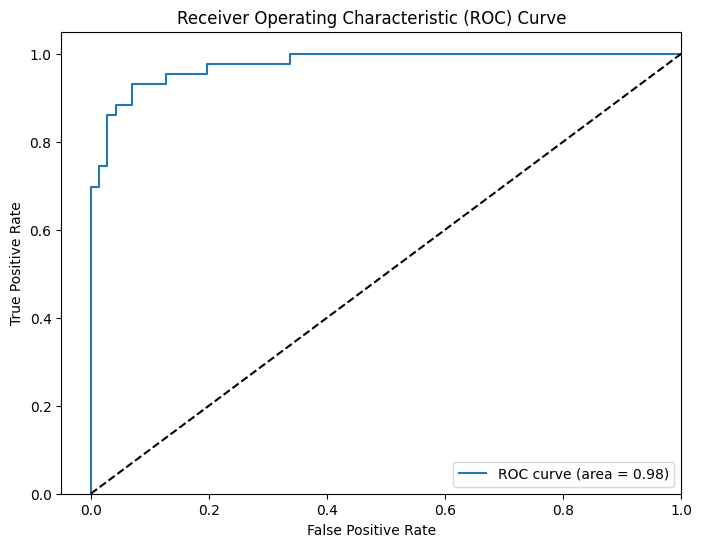

In [51]:
# Initialize placeholders for metrics
best_params_gb = "-"
best_score_gb = "-"
test_accuracy_gb = "-"
conf_matrix_gb = "-"
class_report_gb = "-"
f1_gb = "-"
auc_gb = "-"
fpr_gb = "-"
tpr_gb = "-"
thresholds_gb = "-"

# Create the Gradient Boosting Classifier model
gb_clf = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Weight applied to each classifier
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_gb.fit(X_train, y_train)

# Best hyperparameters found
best_params_gb = grid_search_gb.best_params_
print("Best Parameters:", best_params_gb)

# Best score
best_score_gb = grid_search_gb.best_score_
print("Best Score:", best_score_gb)

# Model with the best hyperparameters
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the model on the test data
test_accuracy_gb = best_gb_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_gb)

# Predictions
y_pred_gb = best_gb_model.predict(X_test)

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix:")
print(conf_matrix_gb)

# Classification report
class_report_gb = classification_report(y_test, y_pred_gb)
print("\nClassification Report:")
print(class_report_gb)

# F1-score
f1_gb = f1_score(y_test, y_pred_gb)
print("\nF1-score:", f1_gb)

# Calculate the probabilities of the positive class
y_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]

# AUC score
auc_gb = roc_auc_score(y_test, y_prob_gb)
print("\nAUC:", auc_gb)

# ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='ROC curve (area = %0.2f)' % auc_gb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Gradient Boosting'] = {
    'Best Parameters': best_params_gb,
    'Best Score': best_score_gb,
    'Test Accuracy': test_accuracy_gb,
    'Confusion Matrix': conf_matrix_gb.tolist(),
    'Classification Report': class_report_gb,
    'F1-score': f1_gb,
    'AUC': auc_gb,
    'ROC Curve': {
        'False Positive Rate': fpr_gb.tolist(),
        'True Positive Rate': tpr_gb.tolist(),
        'Thresholds': thresholds_gb.tolist()
    }
}

#### Stochastic Gradient Boosting (SGB)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.956043956043956
Test Accuracy: 0.9122807017543859

Confusion Matrix:
[[66  5]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.88      0.88      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114


F1-score: 0.8837209302325582

AUC: 0.9662626924336718


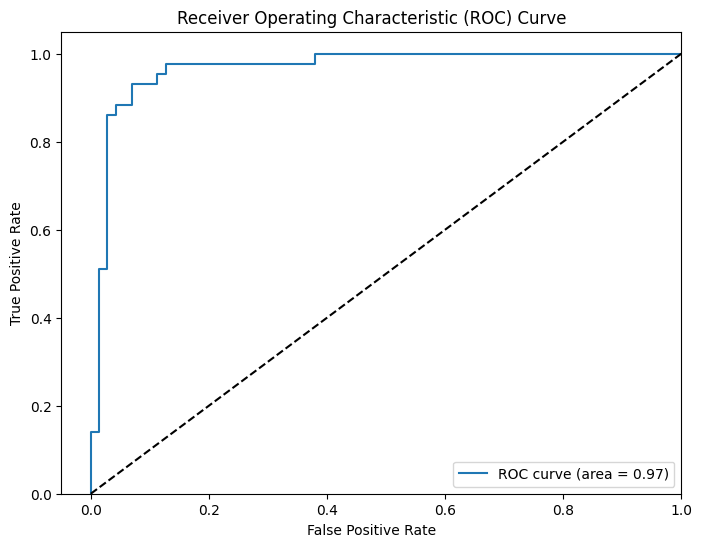

In [52]:
# Initialize placeholders for metrics
best_params_sgb = "-"
best_score_sgb = "-"
test_accuracy_sgb = "-"
conf_matrix_sgb = "-"
class_report_sgb = "-"
f1_sgb = "-"
auc_sgb = "-"
fpr_sgb = "-"
tpr_sgb = "-"
thresholds_sgb = "-"

# Create the Stochastic Gradient Boosting (SGB) Classifier model
sgb_clf = GradientBoostingClassifier(subsample=0.8, random_state=42)

# Define the hyperparameters to tune
param_grid_sgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Weight applied to each classifier
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search_sgb = GridSearchCV(estimator=sgb_clf, param_grid=param_grid_sgb, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_sgb.fit(X_train, y_train)

# Best hyperparameters found
best_params_sgb = grid_search_sgb.best_params_
print("Best Parameters:", best_params_sgb)

# Best score
best_score_sgb = grid_search_sgb.best_score_
print("Best Score:", best_score_sgb)

# Model with the best hyperparameters
best_sgb_model = grid_search_sgb.best_estimator_

# Evaluate the model on the test data
test_accuracy_sgb = best_sgb_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_sgb)

# Predictions
y_pred_sgb = best_sgb_model.predict(X_test)

# Confusion matrix
conf_matrix_sgb = confusion_matrix(y_test, y_pred_sgb)
print("\nConfusion Matrix:")
print(conf_matrix_sgb)

# Classification report
class_report_sgb = classification_report(y_test, y_pred_sgb)
print("\nClassification Report:")
print(class_report_sgb)

# F1-score
f1_sgb = f1_score(y_test, y_pred_sgb)
print("\nF1-score:", f1_sgb)

# Calculate the probabilities of the positive class
y_prob_sgb = best_sgb_model.predict_proba(X_test)[:, 1]

# AUC score
auc_sgb = roc_auc_score(y_test, y_prob_sgb)
print("\nAUC:", auc_sgb)

# ROC curve
fpr_sgb, tpr_sgb, thresholds_sgb = roc_curve(y_test, y_prob_sgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgb, tpr_sgb, label='ROC curve (area = %0.2f)' % auc_sgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Stochastic Gradient Boosting (SGB)'] = {
    'Best Parameters': best_params_sgb,
    'Best Score': best_score_sgb,
    'Test Accuracy': test_accuracy_sgb,
    'Confusion Matrix': conf_matrix_sgb.tolist(),
    'Classification Report': class_report_sgb,
    'F1-score': f1_sgb,
    'AUC': auc_sgb,
    'ROC Curve': {
        'False Positive Rate': fpr_sgb.tolist(),
        'True Positive Rate': tpr_sgb.tolist(),
        'Thresholds': thresholds_sgb.tolist()
    }
}

#### Extreme Gradient Boosting

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.9538461538461538
Test Accuracy: 0.9210526315789473

Confusion Matrix:
[[67  4]
 [ 5 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        71
           1       0.90      0.88      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114


F1-score: 0.8941176470588236

AUC: 0.971830985915493


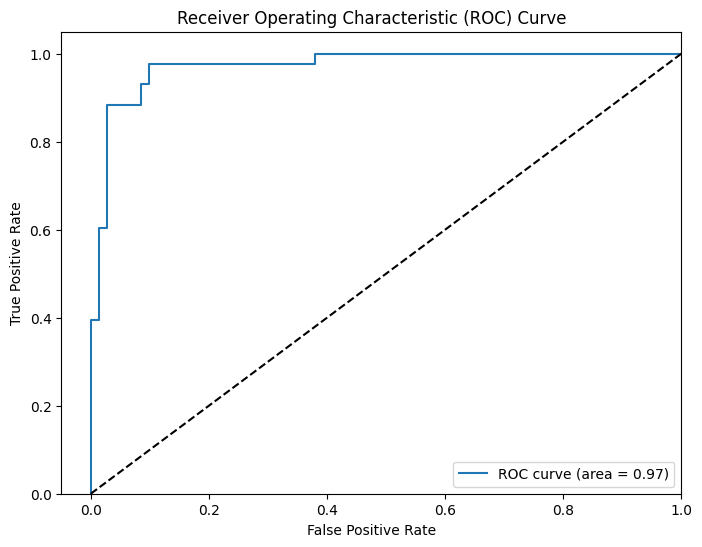

In [53]:
# Initialize placeholders for metrics
best_params_xgb = "-"
best_score_xgb = "-"
test_accuracy_xgb = "-"
conf_matrix_xgb = "-"
class_report_xgb = "-"
f1_xgb = "-"
auc_xgb = "-"
fpr_xgb = "-"
tpr_xgb = "-"
thresholds_xgb = "-"

# Create the Extreme Gradient Boosting (XGBoost) Classifier model
xgb_clf = XGBClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Step size shrinkage
    'max_depth': [3, 4, 5, 6],  # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters found
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters:", best_params_xgb)

# Best score
best_score_xgb = grid_search_xgb.best_score_
print("Best Score:", best_score_xgb)

# Model with the best hyperparameters
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the model on the test data
test_accuracy_xgb = best_xgb_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy_xgb)

# Predictions
y_pred_xgb = best_xgb_model.predict(X_test)

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)

# Classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report:")
print(class_report_xgb)

# F1-score
f1_xgb = f1_score(y_test, y_pred_xgb)
print("\nF1-score:", f1_xgb)

# Calculate the probabilities of the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# AUC score
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("\nAUC:", auc_xgb)

# ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Add available metrics for each model
metrics_dict['Extreme Gradient Boosting (XGBoost)'] = {
    'Best Parameters': best_params_xgb,
    'Best Score': best_score_xgb,
    'Test Accuracy': test_accuracy_xgb,
    'Confusion Matrix': conf_matrix_xgb.tolist(),
    'Classification Report': class_report_xgb,
    'F1-score': f1_xgb,
    'AUC': auc_xgb,
    'ROC Curve': {
        'False Positive Rate': fpr_xgb.tolist(),
        'True Positive Rate': tpr_xgb.tolist(),
        'Thresholds': thresholds_xgb.tolist()
    }
}

## Model Comparison

+-------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|                Model                |                                                                         Best Parameters                                                                         |   Train Accuracy   |   Test Accuracy    |  Confusion Matrix  |     Precision      |       Recall       |      F1-score      |        AUC         |
+-------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------+--------------------+--------------------+--------------------+-----------------

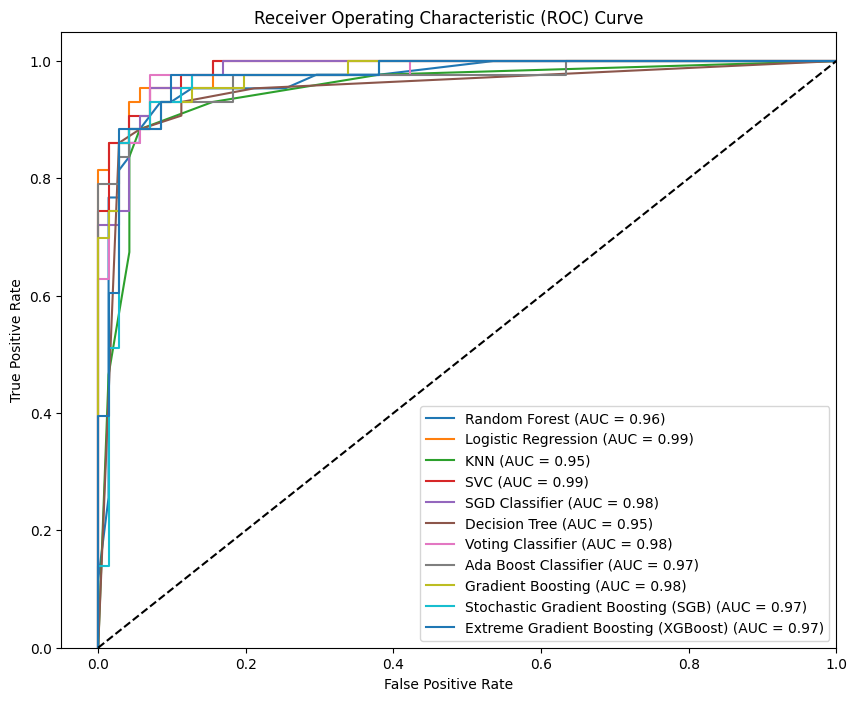

In [55]:
# Lista de modelos e suas métricas
model_names = list(metrics_dict.keys())

# Extrair métricas para cada modelo
metrics_data = {
    'Model': [],
    'Best Parameters': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Confusion Matrix': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'AUC': []
}

for model, metrics in metrics_dict.items():
    metrics_data['Model'].append(model)
    metrics_data['Best Parameters'].append(metrics['Best Parameters'])
    metrics_data['Train Accuracy'].append(metrics['Best Score'])
    metrics_data['Test Accuracy'].append(metrics['Test Accuracy'])
    metrics_data['Confusion Matrix'].append(metrics['Confusion Matrix'])
    
    # Calculate precision, recall, and f1-score from confusion matrix
    conf_matrix = metrics['Confusion Matrix']
    tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    #f1 = 2 * (precision * recall) / (precision + recall)
    
    metrics_data['Precision'].append(precision)
    metrics_data['Recall'].append(recall)
    #metrics_data['F1-score'].append(f1)
    
    metrics_data['F1-score'].append(metrics['F1-score'])
    metrics_data['AUC'].append(metrics['AUC'])

# Gerar tabela com as métricas
table = tabulate(metrics_data, headers='keys', tablefmt='pretty')

# Imprimir a tabela
print(table)

# Gráfico ROC
plt.figure(figsize=(10, 8))
for model, metrics in metrics_dict.items():
    fpr, tpr = metrics['ROC Curve']['False Positive Rate'], metrics['ROC Curve']['True Positive Rate']
    auc = metrics['AUC']
    plt.plot(fpr, tpr, label=f'{model} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()